In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'+'event_rate_model2/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

FF = imp.load_source('FF_functions',lib_function_dir+'FF_functions.py')

Welcome to JupyROOT 6.18/04
N_tot =  4.10331109202e+31   flux=  1.58051463543e+11 for pot:  2.144e+20


In [2]:
outputdir_png, outputdir_root, outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)

In [3]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [4]:
from array import array
#mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
#mom_bins = [ 0.00, 0.225, 0.28, 0.33, 0.39, 0.52, 0.78, 1.21, 2.5]

mom_bins = {}
#mom_bins.Append()
mom_bins[0] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[1] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[2] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[3] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[4] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[5] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[6] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]
mom_bins[7] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]
mom_bins[8] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]

theta_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]

len_theta = len(theta_bins) - 1
len_mom = {}
sum_bins = 0
for i in range(len_theta):
    len_mom[i] = len(mom_bins[i]) - 1
    #print len_mom[i]
    sum_bins+=len_mom[i]


In [5]:
NumberOfFiles = 5000
POT_file = 5e8
activeVol_Area = 128.175*2*116.5*2
pot_data = 2.144e+20

path = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/Flux/zarko/'
f_flux_int = ROOT.TFile.Open(path+"MCC9_FluxHist_volTPCActive.root", 'read')
h_flux_cv = f_flux_int.Get("hEnumu_cv")
flux_cv = h_flux_cv.Integral(-1,201)/(NumberOfFiles*POT_file*activeVol_Area)*pot_data

roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))

N_tot = roh_data*N_A*N_nucleons*V_fid/mol

print 'N_tot = ',N_tot,'  flux= ',flux_cv, 'for pot: ', pot_data

N_tot =  4.10331109202e+31   flux=  1.58051463543e+11 for pot:  2.144e+20


In [6]:
#store all histograms needed in one file: bkg, smearing, covariance
if(1):
    path_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'

    f_cv = ROOT.TFile.Open(path_detsys+'xsec_detsys_CV_2D_t/xsec_detsys_CV_2D.root', 'read')
    f_dedx = ROOT.TFile.Open(path_detsys+'xsec_detsys_dEdx_2D_t/xsec_detsys_dEdx_2D.root', 'read')
    f_LYatt = ROOT.TFile.Open(path_detsys+'xsec_detsys_LYAtt_2D_t/xsec_detsys_LYAtt_2D.root', 'read')
    f_LYdown = ROOT.TFile.Open(path_detsys+'xsec_detsys_LYdown_2D_t/xsec_detsys_LYdown_2D.root', 'read')
    f_LYray = ROOT.TFile.Open(path_detsys+'xsec_detsys_LYRay_2D_t/xsec_detsys_LYRayleigh_2D.root', 'read')
    f_recomb2 = ROOT.TFile.Open(path_detsys+'xsec_detsys_recomb2_2D_t/xsec_detsys_recomb2_2D.root', 'read')
    f_sce = ROOT.TFile.Open(path_detsys+'xsec_detsys_SCE_2D_t/xsec_detsys_SCE_2D.root', 'read')
    f_waxz = ROOT.TFile.Open(path_detsys+'xsec_detsys_WireAngleXZ_2D_t/xsec_detsys_WireAngleXZ_2D.root', 'read')
    f_wayz = ROOT.TFile.Open(path_detsys+'xsec_detsys_WireAngleYZ_2D_t/xsec_detsys_WireAngleYZ_2D.root', 'read')
    f_wmx = ROOT.TFile.Open(path_detsys+'xsec_detsys_WireModX_2D_t/xsec_detsys_WireModX_2D.root', 'read')
    f_wmyz = ROOT.TFile.Open(path_detsys+'xsec_detsys_WireModYZ_2D_t/xsec_detsys_WireModYZ_2D.root', 'read')

    f_all = ROOT.TFile.Open(path_detsys+'xsec_detsys_all_2D_t/Detector_systematic_2D.root', 'read')
    
    h_true_cv = f_cv.Get('h_gen_all')
    h_sel_cv = f_cv.Get('h_sel_all')

    h_ext_cv = f_cv.Get('h_ext_all')
    h_dirt_cv = f_cv.Get('h_dirt_all')


    h_bkg_cv = f_cv.Get('h_bkg_all')
    h_bkg_dedx = f_dedx.Get('h_bkg_all')
    h_bkg_LYatt = f_LYatt.Get('h_bkg_all')
    h_bkg_LYdown = f_LYdown.Get('h_bkg_all')
    h_bkg_LYray = f_LYray.Get('h_bkg_all')
    h_bkg_recomb2 = f_recomb2.Get('h_bkg_all')
    h_bkg_sce = f_sce.Get('h_bkg_all')
    h_bkg_waxz = f_waxz.Get('h_bkg_all')
    h_bkg_wayz = f_wayz.Get('h_bkg_all')
    h_bkg_wmx = f_wmx.Get('h_bkg_all')
    h_bkg_wmyz = f_wmyz.Get('h_bkg_all')

    h_smear_cv = f_cv.Get('h_smearing')
    h_smear_dedx = f_dedx.Get('h_smearing')
    h_smear_LYatt = f_LYatt.Get('h_smearing')
    h_smear_LYdown = f_LYdown.Get('h_smearing')
    h_smear_LYray = f_LYray.Get('h_smearing')
    h_smear_recomb2 = f_recomb2.Get('h_smearing')
    h_smear_sce = f_sce.Get('h_smearing')
    h_smear_waxz = f_waxz.Get('h_smearing')
    h_smear_wayz = f_wayz.Get('h_smearing')
    h_smear_wmx = f_wmx.Get('h_smearing')
    h_smear_wmyz = f_wmyz.Get('h_smearing')

    #save all whats needed
    RootFile = ROOT.TFile('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff/'+"FF_detsys.root","RECREATE");
    #blbla.Write('dfdfs')
    h_true_cv.Write('h_true_cv')
    h_sel_cv.Write('h_sel_cv')
    
    h_ext_cv.Write('h_ext_cv')
    h_dirt_cv.Write('h_dirt_cv')

    h_bkg_cv.Write('h_bkg_cv')
    h_bkg_dedx.Write('h_bkg_dedx')
    h_bkg_LYatt.Write('h_bkg_LYatt')
    h_bkg_LYdown.Write('h_bkg_LYdown')
    h_bkg_LYray.Write('h_bkg_LYray')
    h_bkg_recomb2.Write('h_bkg_recomb2')
    h_bkg_sce.Write('h_bkg_sce')
    h_bkg_waxz.Write('h_bkg_waxz')
    h_bkg_wayz.Write('h_bkg_wayz')
    h_bkg_wmx.Write('h_bkg_wmx')
    h_bkg_wmyz.Write('h_bkg_wmyz')

    h_smear_cv.Write('h_smear_cv')
    h_smear_dedx.Write('h_smear_dedx')
    h_smear_LYatt.Write('h_smear_LYatt')
    h_smear_LYdown.Write('h_smear_LYdown')
    h_smear_LYray.Write('h_smear_LYray')
    h_smear_recomb2.Write('h_smear_recomb2')
    h_smear_sce.Write('h_smear_sce')
    h_smear_waxz.Write('h_smear_waxz')
    h_smear_wayz.Write('h_smear_wayz')
    h_smear_wmx.Write('h_smear_wmx')
    h_smear_wmyz.Write('h_smear_wmyz')

    RootFile.Close()

In [7]:
def smear_plot(h_true):
    if h_true.GetNbinsX() != 43:
        h_true_this = ROOT.TH1F('h_true_this',"h_true_this",43,0,43)
        for i in range(43):
            h_true_this.SetBinContent(i+1,h_true.GetBinContent(i+1))
    else:
        h_true_this = h_true.Clone()
    h_smear = f_cv.Get('h_smearing')
    smear_mat = FF.plot2arr(h_smear,2)
    eff_vec = FF.plot2arr(h_eff,1)
    true_vec = FF.plot2arr(h_true_this,1)
    #smear_mat = smear_mat.T*eff_vec
    #reco_vec = smear_mat.dot(true_vec)
    reco_vec = true_vec.dot(smear_mat)
    h_reco = FF.arr2plot(reco_vec)
    
    return h_reco

In [8]:
def return_detsys_covar(h_true,this_pot):
    #print 'go into function'
    #calculate the covariance for the the prediction
    path_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff/'
    f_det = ROOT.TFile.Open(path_detsys+'FF_detsys.root', 'read')
    para = ['dedx','LYatt','LYdown','LYray','recomb2','sce','waxz','wayz','wmx','wmyz']
    #print 'Opend file'
    h_true_cv = h_true.Clone()
    h_bkg_cv = f_det.Get('h_bkg_cv')
    h_bkg_cv.Scale(this_pot/9.457e+18)
    h_smear_cv = f_det.Get('h_smear_cv')
    num_bins = h_smear_cv.GetNbinsX()
    smear_mat = np.zeros((num_bins,num_bins))
    true_vec = np.zeros((num_bins))
    bkg_vec = np.zeros((num_bins))
    
    path_ext = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
    f_ext = ROOT.TFile.Open(path_ext+'xsec_2D_Run3_wighted.root', 'read')
    h_ext = ROOT.TH1F('h_ext',"Cosmic",43,0,43)
    h_dirt = ROOT.TH1F('h_dirt',"Cosmic",43,0,43)
    bin_counter = 0
    for t_bin in range(len_theta): #len_theta
        h_temp4 = f_cv.Get('h_ext['+str(t_bin)+']')
        h_temp5 = f_cv.Get('h_dirt['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_ext.SetBinContent(bin_counter,h_temp4.GetBinContent(m_bin+1))
            h_dirt.SetBinContent(bin_counter,h_temp5.GetBinContent(m_bin+1))
    h_ext.Scale(this_pot/2.144e+20)
    h_dirt.Scale(this_pot/2.144e+20)
    
    ext_vec = np.zeros((num_bins))
    dirt_vec = np.zeros((num_bins))

    for i in range(num_bins):
        true_vec[i] = h_true_cv.GetBinContent(i+1)
        bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)
        ext_vec[i] = h_ext.GetBinContent(i+1)
        dirt_vec[i] = h_dirt.GetBinContent(i+1)
        for j in range(num_bins):
            smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)
    #print 'filled vecotrs'
    reco_vec = true_vec.dot(smear_mat)

    bkg_vec_det = np.zeros((len(para),num_bins))
    reco_vec_det = np.zeros((len(para),num_bins))
    smear_mat_det = np.zeros((len(para),num_bins,num_bins))

    #sig_vec_det = np.zeros((len(para),num_bins)) # signal + bkg prediction
    res_vec_det = np.zeros((len(para),num_bins)) # residual
    res_vec = np.zeros((num_bins)) # quadratic sum


    h_bkg_det = []
    h_smear_det = []
    #print 'go into loop'
    for i,x in enumerate(para):
        h_bkg_det.append(f_det.Get('h_bkg_'+x))
        h_bkg_det[i].Scale(this_pot/9.457e18)
        h_smear_det.append(f_det.Get('h_smear_'+x))
        for j in range(num_bins):
            bkg_vec_det[i][j] = h_bkg_det[i].GetBinContent(j+1)
            for k in range(num_bins):
                smear_mat_det[i][j][k] = h_smear_det[i].GetBinContent(j+1,k+1)
        reco_vec_det[i]= true_vec.dot(smear_mat_det[i])
        #print reco_vec[1]+bkg_vec[1], reco_vec_det[i][1] + bkg_vec_det[i][1]
        res_vec_det[i] = ((reco_vec+bkg_vec) - (reco_vec_det[i] + bkg_vec_det[i]))/(reco_vec+bkg_vec+ext_vec+dirt_vec)

        for j in range(num_bins):
            res_vec[j] += res_vec_det[i][j]*res_vec_det[i][j]

    frac_covar_det = np.zeros((num_bins,num_bins))
    for i,x in enumerate(para):
        for j in range(num_bins):
            for k in range(num_bins):
                frac_covar_det[j][k] += res_vec_det[i][j] * res_vec_det[i][k]

    return frac_covar_det

In [9]:
def return_other_covar(h_true,this_pot):
    weight_list = [ 'AxFFCCQEshape_UBGenie' , 'DecayAngMEC_UBGenie', 'NormCCCOH_UBGenie', 'NormNCCOH_UBGenie',\
                   'RPA_CCQE_Reduced_UBGenie','RPA_CCQE_UBGenie','ThetaDelta2NRad_UBGenie','Theta_Delta2Npi_UBGenie',\
                    'VecFFCCQEshape_UBGenie','XSecShape_CCMEC_UBGenie']
    w_list = [0,1,2,3,4,5,6,7,8,9]
    
    path_other = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/pc46_data/'
    f_other = ROOT.TFile.Open(path_other+'Other_Genie_2D.root', 'read')

    h_true_cv = h_true.Clone()
    num_bins = 43#h_true_cv.GetNbinsX()
    frac_covar = np.zeros((num_bins,num_bins))
    
    path_ext = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
    f_ext = ROOT.TFile.Open(path_ext+'xsec_2D_Run3_wighted.root', 'read')
    h_ext = ROOT.TH1F('h_ext',"Cosmic",43,0,43)
    h_dirt = ROOT.TH1F('h_dirt',"Cosmic",43,0,43)
    bin_counter = 0
    for t_bin in range(len_theta): #len_theta
        h_temp4 = f_cv.Get('h_ext['+str(t_bin)+']')
        h_temp5 = f_cv.Get('h_dirt['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_ext.SetBinContent(bin_counter,h_temp4.GetBinContent(m_bin+1))
            h_dirt.SetBinContent(bin_counter,h_temp5.GetBinContent(m_bin+1))
    h_ext.Scale(this_pot/2.144e+20)
    h_dirt.Scale(this_pot/2.144e+20)
    
    ext_vec = np.zeros((num_bins))
    dirt_vec = np.zeros((num_bins))
    
    for i in range(num_bins):
        ext_vec[i] = h_ext.GetBinContent(i+1)
        dirt_vec[i] = h_dirt.GetBinContent(i+1)
        
    for w in w_list:
        #take first uiverse as cv
        h_bkg_cv = f_other.Get('h_bkg_all['+str(w)+'][0]')
        h_bkg_cv.Scale(this_pot/7.644e+18)
        h_smear_cv = f_other.Get('h_smearing['+str(w)+'][0]')
        h_eff_cv = f_other.Get('h_eff_all['+str(w)+'][0]')
        h_eff_cv.SetBinContent(5,1)
        h_eff_cv.SetBinContent(10,1)

        h_bkg_1 = f_other.Get('h_bkg_all['+str(w)+'][1]')
        h_bkg_1.Scale(this_pot/7.644e+18)
        h_smear_1 = f_other.Get('h_smearing['+str(w)+'][1]')
        h_eff_1 = f_other.Get('h_eff_all['+str(w)+'][1]')
        h_eff_1.SetBinContent(5,1)
        h_eff_1.SetBinContent(10,1)

        smear_mat = np.zeros((num_bins,num_bins))
        true_vec = np.zeros((num_bins))
        bkg_vec = np.zeros((num_bins))

        smear_mat1 = np.zeros((num_bins,num_bins))
        bkg_vec1 = np.zeros((num_bins))

        for i in range(num_bins):
            true_vec[i] = h_true_cv.GetBinContent(i+1)
            bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)

            bkg_vec1[i] = h_bkg_1.GetBinContent(i+1)
            for j in range(num_bins):
                smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)*h_eff_cv.GetBinContent(j+1)
                smear_mat1[i][j]= h_smear_1.GetBinContent(i+1,j+1)*h_eff_1.GetBinContent(j+1)

        reco_vec = true_vec.dot(smear_mat)
        reco_vec1 = true_vec.dot(smear_mat1)

        res_vec_other = ((reco_vec+bkg_vec) - (reco_vec1 + bkg_vec1))/(reco_vec+bkg_vec+ext_vec+dirt_vec)
        frac_covar_other = np.zeros((num_bins,num_bins))
        for j in range(num_bins):
            for k in range(num_bins):
                frac_covar_other[j][k] += res_vec_other[j] * res_vec_other[k]

        frac_covar += frac_covar_other
    return frac_covar


In [10]:
def return_all_covar(h_true,this_pot):
    path_all = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/pc46_data/'
    f_all = ROOT.TFile.Open(path_all+'All_Genie_2D.root', 'read')
    
    h_true_cv = h_true.Clone()
    h_bkg_cv = f_all.Get('h_bkg_all[0]')
    bin_counter=0
    for t_bin in range(len_theta): #len_theta
        h_temp = f_all.Get('h_overlay_cv['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_bkg_cv.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))

    h_bkg_cv.Scale(this_pot/7.644e+18)
    h_smear_cv = f_all.Get('h_smearing_cv')
    h_eff_cv = f_all.Get('h_eff_all_cv')
    h_eff_cv.SetBinContent(5,1)
    h_eff_cv.SetBinContent(10,1)
    
    path_ext = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
    f_ext = ROOT.TFile.Open(path_ext+'xsec_2D_Run3_wighted.root', 'read')
    h_ext = ROOT.TH1F('h_ext',"Cosmic",43,0,43)
    h_dirt = ROOT.TH1F('h_dirt',"Cosmic",43,0,43)
    bin_counter = 0
    for t_bin in range(len_theta): #len_theta
        h_temp4 = f_cv.Get('h_ext['+str(t_bin)+']')
        h_temp5 = f_cv.Get('h_dirt['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_ext.SetBinContent(bin_counter,h_temp4.GetBinContent(m_bin+1))
            h_dirt.SetBinContent(bin_counter,h_temp5.GetBinContent(m_bin+1))
    h_ext.Scale(this_pot/2.144e+20)
    h_dirt.Scale(this_pot/2.144e+20)

    num_bins = h_smear_cv.GetNbinsX()
    smear_mat = np.zeros((num_bins,num_bins))
    true_vec = np.zeros((num_bins))
    bkg_vec = np.zeros((num_bins))
    ext_vec = np.zeros((num_bins))
    dirt_vec = np.zeros((num_bins))

    for i in range(num_bins):
        true_vec[i] = h_true_cv.GetBinContent(i+1)
        bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)
        ext_vec[i] = h_ext.GetBinContent(i+1)
        dirt_vec[i] = h_dirt.GetBinContent(i+1)
        for j in range(num_bins):
            smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)*h_eff_cv.GetBinContent(j+1)

    reco_vec = true_vec.dot(smear_mat)
    
    num_universe = 100

    bkg_vec_all = np.zeros((num_universe,num_bins))
    reco_vec_all = np.zeros((num_universe,num_bins))
    smear_mat_all = np.zeros((num_universe,num_bins,num_bins))

    res_vec_all = np.zeros((num_universe,num_bins))

    h_bkg_all = []
    h_smear_all = []
    h_eff_all = []
    for uni in range(num_universe):
        #do something
        h_bkg_all.append(f_all.Get('h_bkg_all['+str(0)+']'))
        bin_counter = 0
        for t_bin in range(len_theta): #len_theta
            h_temp = f_all.Get('h_overlay['+str(uni)+']['+str(t_bin)+']')
            for m_bin in range(len_mom[t_bin]):
                bin_counter+=1
                h_bkg_all[uni].SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))
            del h_temp

        h_bkg_all[uni].Scale(this_pot/7.644e+18)
        h_smear_all.append(f_all.Get('h_smearing['+str(uni)+']'))
        h_eff_all.append(f_all.Get('h_eff_all['+str(uni)+']'))
        h_eff_all[uni].SetBinContent(5,1)
        h_eff_all[uni].SetBinContent(10,1)

        for j in range(num_bins):
            bkg_vec_all[uni][j] = h_bkg_all[uni].GetBinContent(j+1)
            for k in range(num_bins):
                smear_mat_all[uni][j][k] = h_smear_all[uni].GetBinContent(j+1,k+1)*h_eff_all[uni].GetBinContent(k+1)
        reco_vec_all[uni]= true_vec.dot(smear_mat_all[uni])
        res_vec_all[uni] = ((reco_vec+bkg_vec) - (reco_vec_all[uni] + bkg_vec_all[uni]))/(reco_vec+bkg_vec+ext_vec+dirt_vec)

    frac_covar_all = np.zeros((num_bins,num_bins))
    for uni in range(num_universe):
        for j in range(num_bins):
            for k in range(num_bins):
                frac_covar_all[j][k] += res_vec_all[uni][j] * res_vec_all[uni][k]
    frac_covar_all = frac_covar_all/num_universe
    
    del h_bkg_all
    del h_smear_all
    del h_eff_all
    
    return frac_covar_all

In [11]:
def return_flux_covar(h_true,this_pot):
    # give h_true_cv and POT since bkg is for specific POT
    # BACKGROUND, EFFICIENCY ARE IN ONE FILE, SMEARING IN OTHER...
    path = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/Flux/zarko/'
    path_flux = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/pc46_data/'

    #weight_list = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim' ]
    weight_list = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
        'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
        'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
        'piplus_PrimaryHadronSWCentralSplineVariation' ]

    f_flux_int = ROOT.TFile.Open(path+"MCC9_FluxHist_volTPCActive.root", 'read')

    f_flux_smear = []
    f_flux_bkg = []
    for i,x in enumerate(weight_list):
        f_flux_smear.append(ROOT.TFile.Open(path_flux+'xsec_2d_flux/root_output/'+x+'_Flux_systematic.root', 'read'))
        f_flux_bkg.append(ROOT.TFile.Open(path_flux+'xsec_2d_flux_rest/root_output/'+x+'_Flux_systematic_rest.root', 'read'))

    h_true_cv = h_true.Clone()
    h_bkg_cv = f_flux_bkg[0].Get('h_bkg_all[0][0]')
    bin_counter=0
    for t_bin in range(len_theta): #len_theta
        h_temp = f_flux_bkg[0].Get('h_overlay_cv['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_bkg_cv.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))

    NumberOfFiles = 5000
    POT_file = 5e8
    activeVol_Area = 128.175*2*116.5*2
    h_flux_cv = f_flux_int.Get("hEnumu_cv")
    flux_cv = h_flux_cv.Integral(-1,201)/(NumberOfFiles*POT_file*activeVol_Area)*this_pot

    h_bkg_cv.Scale(this_pot/7.644e+18)
    h_smear_cv = f_flux_smear[0].Get('h_smearing_cv')
    h_eff_cv = f_flux_bkg[0].Get('h_eff_all_cv')
    h_eff_cv.SetBinContent(5,1)
    h_eff_cv.SetBinContent(10,1)
    
    path_ext = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
    f_ext = ROOT.TFile.Open(path_ext+'xsec_2D_Run3_wighted.root', 'read')
    h_ext = ROOT.TH1F('h_ext',"Cosmic",43,0,43)
    h_dirt = ROOT.TH1F('h_dirt',"Cosmic",43,0,43)
    bin_counter = 0
    for t_bin in range(len_theta): #len_theta
        h_temp4 = f_cv.Get('h_ext['+str(t_bin)+']')
        h_temp5 = f_cv.Get('h_dirt['+str(t_bin)+']')
        h_temp3 = f_cv.Get('h_overlay['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_ext.SetBinContent(bin_counter,h_temp4.GetBinContent(m_bin+1))
            h_dirt.SetBinContent(bin_counter,h_temp5.GetBinContent(m_bin+1))
            h_bkg_cv.SetBinContent(bin_counter,h_temp3.GetBinContent(m_bin+1))

    h_ext.Scale(this_pot/2.144e+20)
    h_dirt.Scale(this_pot/2.144e+20)
    h_bkg_cv.Scale(this_pot/2.144e+20)

    num_bins = h_smear_cv.GetNbinsX()
    smear_mat = np.zeros((num_bins,num_bins))
    true_vec = np.zeros((num_bins))
    bkg_vec = np.zeros((num_bins))
    ext_vec = np.zeros((num_bins))
    dirt_vec = np.zeros((num_bins))

    for i in range(num_bins):
        true_vec[i] = h_true_cv.GetBinContent(i+1)
        bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)
        ext_vec[i] = h_ext.GetBinContent(i+1)
        dirt_vec[i] = h_dirt.GetBinContent(i+1)
        for j in range(num_bins):
            smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)*h_eff_cv.GetBinContent(j+1)

    reco_vec = true_vec.dot(smear_mat)

    num_universe = 100

    bkg_vec_flux = np.zeros((len(weight_list),num_universe,num_bins))
    reco_vec_flux = np.zeros((len(weight_list),num_universe,num_bins))
    smear_mat_flux = np.zeros((len(weight_list),num_universe,num_bins,num_bins))

    res_vec_flux = np.zeros((len(weight_list),num_universe,num_bins))
    h_bkg_flux = []
    h_smear_flux = []
    h_eff_flux = []
    for i,x in enumerate(weight_list):
        h_bkg_flux.append([])
        h_smear_flux.append([])
        h_eff_flux.append([])
        for uni in range(num_universe):
            #do something
            h_bkg_flux[i].append(f_flux_bkg[i].Get('h_bkg_all[0]['+str(uni)+']'))
            bin_counter = 0
            for t_bin in range(len_theta): #len_theta
                h_temp = f_flux_bkg[i].Get('h_overlay[0]['+str(uni)+']['+str(t_bin)+']')
                for m_bin in range(len_mom[t_bin]):
                    bin_counter+=1
                    h_bkg_flux[i][uni].SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))
                del h_temp
            
            h_bkg_flux[i][uni].Scale(this_pot/7.644e+18)
            h_smear_flux[i].append(f_flux_smear[i].Get('h_smearing[0]['+str(uni)+']'))
            h_eff_flux[i].append(f_flux_bkg[i].Get('h_eff_all[0]['+str(uni)+']'))
            h_eff_flux[i][uni].SetBinContent(5,1)
            h_eff_flux[i][uni].SetBinContent(10,1)

            h_flux_var = f_flux_int.Get('numu_ms_'+x+'/hEnumu_'+x+'_ms_'+str(uni))
            flux_var = h_flux_var.Integral(-1,201)/(NumberOfFiles*POT_file*activeVol_Area)*this_pot
            #print flux_cv, flux_var, (flux_var-flux_cv)/flux_var 
            for j in range(num_bins):
                bkg_vec_flux[i][uni][j] = h_bkg_flux[i][uni].GetBinContent(j+1)
                for k in range(num_bins):
                    smear_mat_flux[i][uni][j][k] = h_smear_flux[i][uni].GetBinContent(j+1,k+1)*h_eff_flux[i][uni].GetBinContent(k+1)
            reco_vec_flux[i][uni]= true_vec.dot(smear_mat_flux[i][uni])
            res_vec_flux[i][uni] = ((reco_vec+bkg_vec)/flux_cv - (reco_vec_flux[i][uni] + bkg_vec_flux[i][uni])/flux_var)/((reco_vec+bkg_vec+ext_vec+dirt_vec)/flux_cv)
    #print bkg_vec[1], bkg_vec_flux[i][uni][1]
    #print reco_vec[1], reco_vec_flux[i][uni][1]
    frac_covar_flux_vec = np.zeros((len(weight_list),num_bins,num_bins))
    for i,x in enumerate(weight_list):
        for uni in range(num_universe):
            for j in range(num_bins):
                for k in range(num_bins):
                    frac_covar_flux_vec[i][j][k] += res_vec_flux[i][uni][j] * res_vec_flux[i][uni][k]
        frac_covar_flux_vec[i] = frac_covar_flux_vec[i]/num_universe

    frac_covar_flux = np.zeros((num_bins,num_bins))
    for i,x in enumerate(weight_list):
        frac_covar_flux += frac_covar_flux_vec[i]
    return frac_covar_flux



In [12]:
def return_crt_covar(h_true,this_pot):
    #print 'go into function'
    #calculate the covariance for the the prediction
    path_crt = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
    f_crt = ROOT.TFile.Open(path_detsys+'xsec_2D_Run3_wighted_t.root', 'read')
    #print 'Opend file'
    h_true_cv = h_true.Clone()
    h_bkg_cv = h_true.Clone()
    h_bkg_crt = h_true.Clone()
    
    h_dirt_cv = h_true.Clone()
    h_dirt_crt = h_true.Clone()

    h_ext = h_true.Clone()

    bin_counter=0
    for t_bin in range(len_theta): #len_theta
        h_temp = f_crt.Get('h_overlay['+str(t_bin)+']')
        h_temp1 = f_crt.Get('h_overlay_nocrt['+str(t_bin)+']')
        h_temp2 = f_crt.Get('h_dirt['+str(t_bin)+']')
        h_temp3 = f_crt.Get('h_dirt_nocrt['+str(t_bin)+']')
        h_temp4 = f_crt.Get('h_ext['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_bkg_cv.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))
            h_bkg_crt.SetBinContent(bin_counter,h_temp1.GetBinContent(m_bin+1))
            h_dirt_cv.SetBinContent(bin_counter,h_temp2.GetBinContent(m_bin+1))
            h_dirt_crt.SetBinContent(bin_counter,h_temp3.GetBinContent(m_bin+1))
            h_ext.SetBinContent(bin_counter,h_temp4.GetBinContent(m_bin+1))
    
    h_bkg_cv.Scale(this_pot/2.144e+20)
    h_bkg_crt.Scale(this_pot/2.144e+20)
    h_dirt_cv.Scale(this_pot/2.144e+20)
    h_dirt_crt.Scale(this_pot/2.144e+20)
    h_ext.Scale(this_pot/2.144e+20)
    
    h_smear_cv = f_crt.Get('h_smearing')
    h_smear_crt = f_crt.Get('h_smearing_nocrt')
    
    num_bins = h_smear_cv.GetNbinsX()
    smear_mat = np.zeros((num_bins,num_bins))
    smear_mat_crt = np.zeros((num_bins,num_bins))
    true_vec = np.zeros((num_bins))
    bkg_vec = np.zeros((num_bins))
    dirt_vec = np.zeros((num_bins))
    ext_vec = np.zeros((num_bins))
    
    bkg_vec_crt = np.zeros((num_bins))
    dirt_vec_crt = np.zeros((num_bins))

    for i in range(num_bins):
        true_vec[i] = h_true_cv.GetBinContent(i+1)
        bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)
        dirt_vec[i] = h_dirt_cv.GetBinContent(i+1)
        ext_vec[i] = h_ext.GetBinContent(i+1)

        bkg_vec_crt[i] = h_bkg_crt.GetBinContent(i+1)
        dirt_vec_crt[i] = h_dirt_crt.GetBinContent(i+1)
        for j in range(num_bins):
            smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)
            smear_mat_crt[i][j]= h_smear_crt.GetBinContent(i+1,j+1)
    #print 'filled vecotrs'
    reco_vec = true_vec.dot(smear_mat)
    reco_vec_crt = true_vec.dot(smear_mat_crt)
    
    #bkg_vec_det = bkg_vec - bkg_vec_crt*0.1
    #dirt_vec_det = dirt_vec - dirt_vec_crt*0.1
    #reco_vec_det = reco_vec - reco_vec_crt*0.1
    delta = bkg_vec+dirt_vec+reco_vec - (bkg_vec_crt+dirt_vec_crt+reco_vec_crt)
    
    delta = delta*0.1
    tot = bkg_vec+dirt_vec+reco_vec+ext_vec
    
    frac_covar_det = np.zeros((num_bins,num_bins))
    for i in range(num_bins):
        for j in range(num_bins):
            frac_covar_det[i][j] = (delta[i]*delta[j])/(tot[i]*tot[j])
            
    return frac_covar_det

In [13]:
def return_stat_covar(h_histo):
    n_bins = h_histo.GetNbinsX()
    frac_covar_stat = np.zeros((n_bins,n_bins))
    if n_bins == 43:
        n_bins-=1
    for i in range(n_bins):
        err = h_histo.GetBinError(i+1)
        val = h_histo.GetBinContent(i+1)
        #print err ,val
        frac_covar_stat[i][i] = err*err / (val*val)
    
    
    return frac_covar_stat

In [14]:
def return_dirt_covar(h_true, h_bkg, h_ext, h_dirt):
    n_bins = 43#h_true.GetNbinsX()
    frac_covar_dirt = np.zeros((n_bins,n_bins))
    
    h_all = h_true.Clone()
    h_all = smear_plot(h_all)
    h_all.Add(h_bkg)
    h_all.Add(h_ext)
    h_all.Add(h_dirt)
    
    all_vec = FF.plot2arr(h_all,1)
    dirt_vec = FF.plot2arr(h_dirt,1)
    
    if n_bins == 43:
        n_bins-=1
    for i in range(n_bins):
        for j in range(n_bins):
            #print all_vec[i], dirt_vec[i]
            frac_covar_dirt[i][j] = (dirt_vec[i])*(dirt_vec[j])/(all_vec[i]*all_vec[j])
    
    
    return frac_covar_dirt

In [15]:
def return_pot_covar(h_true, h_bkg, h_ext, h_dirt):
    n_bins = 43#h_true.GetNbinsX()
    frac_covar_dirt = np.zeros((n_bins,n_bins))
    
    h_all = h_true.Clone()
    h_all = smear_plot(h_all)
    h_all.Add(h_bkg)
    h_all.Add(h_dirt)
    
    pot_vec = FF.plot2arr(h_all,1)
    
    h_all.Add(h_ext)
    all_vec = FF.plot2arr(h_all,1)
    
    if n_bins == 43:
        n_bins-=1
    for i in range(n_bins):
        for j in range(n_bins):
            #print all_vec[i], dirt_vec[i]
            frac_covar_dirt[i][j] = (pot_vec[i]*0.02)*(pot_vec[j]*0.02)/(all_vec[i]*all_vec[j])
    
    
    return frac_covar_dirt

In [16]:
def eventrate_comparison(h_data_func,h_ext_func,h_dirt_func,h_bkg_func,h_true_func,this_frac_tot, filename,model_name):
    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.1)
    c1.SetBottomMargin(0.1)

    c1.cd()

    pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
    pad1.SetGrid(1)
    pad1.Draw()
    pad1.cd()
    pad1.SetBottomMargin(0.03);
    pad1.SetTopMargin(0.1)

    FF.main_plot(h_data_func)
    
    h_reco_func = smear_plot(h_true_func)

    hs = ROOT.THStack("hs","");
    h_ext_func.SetFillColor(ROOT.kBlue+2)
    h_ext_func.SetLineColor(ROOT.kBlue+2)
    h_ext_func.SetFillStyle(3004)
    h_dirt_func.SetFillColor(ROOT.kOrange+2);
    h_dirt_func.SetLineColor(ROOT.kOrange+2);
    h_bkg_func.SetFillColor(ROOT.kGray)
    h_bkg_func.SetLineColor(ROOT.kGray)
    h_reco_func.SetFillColor(ROOT.kRed)
    h_reco_func.SetLineColor(ROOT.kRed)
    hs.Add(h_ext_func)
    hs.Add(h_dirt_func)
    hs.Add(h_bkg_func)
    hs.Add(h_reco_func)

    h_data_func.SetXTitle("Reco bin number")
    h_data_func.SetYTitle("Number of events")

    h_tot = h_reco_func.Clone()
    h_tot.Add(h_bkg_func)
    
    num_bins = 43 # get eventually better than hardcode
    #pred_vec = FF.plot2arr(h_tot,1)
    
    h_tot.Add(h_ext_func)
    h_tot.Add(h_dirt_func)
    h_tot.SetFillColor(ROOT.kBlack)
    h_tot.SetLineColor(ROOT.kBlack)
    h_tot.SetFillStyle(3004)
    
    # calculate CHi2
    dat_vec = FF.plot2arr(h_data_func,1)
    dat_vec = dat_vec[0:-1]
    tot_vec = FF.plot2arr(h_tot,1)
    tot_vec = tot_vec[0:-1]
    covar = np.zeros((num_bins-1,num_bins-1))
    
    #get covar on all
    #for i in range(num_bins-1):
    #    for j in range(num_bins-1):
    #        covar[i][j] = this_frac_tot[i][j]*pred_vec[i]*pred_vec[j]
    
    #get total covar:
    covar_data = np.zeros((num_bins-1,num_bins-1))
    for i in range(num_bins-1):
        for j in range(num_bins-1):
            covar[i][j] = this_frac_tot[i][j]*tot_vec[i]*tot_vec[j]
            
    for i in range(num_bins):
        h_tot.SetBinError(i+1,math.sqrt(this_frac_tot[i][i])*h_tot.GetBinContent(i+1))
        
    # get dirt uncertainty (100%)
    #covar_dirt = np.zeros((num_bins-1,num_bins-1))
    #pred_vec_all = FF.plot2arr(h_tot,1)
    #for i in range(num_bins-1):
    #    for j in range(num_bins-1):
    #        covar_dirt[i][j] = frac_dirt[i][j]*pred_vec_all[i]*pred_vec_all[j]
    
    # get crt uncertainty
    #covar_crt = np.zeros((num_bins-1,num_bins-1))
    #for i in range(num_bins-1):
    #    for j in range(num_bins-1):
    #        covar_crt[i][j] = frac_crt[i][j]*pred_vec_all[i]*pred_vec_all[j]
    
    
    #covar+=covar_data+covar_dirt+covar_crt
    #inv_covar = sla.inv(covar,check_finite=False)
    inv_covar = np.linalg.inv(covar)
    diff_vec = (dat_vec - tot_vec)
    #chi2_tmp = diff_vec.dot(inv_covar)
    #chi2 = chi2_tmp.dot(diff_vec)
    chi2 = 0.0
    for i in range(42):
        for j in range(42):
            chi2 += diff_vec[i]*inv_covar[i][j]*diff_vec[j]
        
    #print 'Data: ',dat_vec
    #print 'pred: ',tot_vec
    #print 'diff: ',diff_vec
    #print 'covar: ',covar
    #print 'inv covar: ',inv_covar
    #print chi2_tmp, chi2_tmp.shape
    print 'Chi2 = ',chi2
    h_data_func.SetMaximum(-1111)
    h_data_func.SetMaximum(h_data_func.GetMaximum()*1.2)
    h_data_func.Draw('E1')
    h_histo = FF.histBkg(h_true_func)
    h_histo.Draw('hist same')
    hs.Draw('same hist')
    h_tot.Draw('same E2')
    
    legend = ROOT.TLegend(0.15,0.65,0.5,0.9)
    legend.AddEntry(h_data_func,'Data + stat.',"lep");
    legend.AddEntry(h_tot,model_name+' + bkg: #chi^{2}:'+'{:04.1f})'.format(chi2),"f");
    #legend.AddEntry(h_tot,'Syst. error, #chi^{2}:'+'{:04.1f})'.format(chi2),"f");
    legend.Draw()
    
    h_data_func.Draw('E1 same')

    prelim, pot_tex = FF.draw_adding()
    prelim.Draw()
    pot_tex.Draw()

    h_data_func.GetYaxis().SetTitleOffset(1);
    h_data_func.GetXaxis().SetLabelOffset(999);
    h_data_func.GetXaxis().SetTitleOffset(999);
    h_data_func.GetXaxis().SetLabelSize(0);
    h_data_func.GetXaxis().SetTitleSize(0);
    
    c1.cd()
    h_data_func.GetXaxis().SetLabelOffset(0);
    h_data_func.GetXaxis().SetTitleOffset(0);

    pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
    pad2.SetGrid(1)
    pad2.SetTopMargin(0.04)
    pad2.SetBottomMargin(0.4)
    pad2.Draw()
    pad2.cd()
    h_tot_noerr = h_tot.Clone()
    for i in range(43):
        h_tot_noerr.SetBinError(i,0)
    h_xsec_data_ratio = h_data_func.Clone()
    h_xsec_data_ratio.Divide(h_tot_noerr)
    h_mc_ratio = h_tot.Clone()
    h_mc_ratio.Divide(h_tot_noerr)

    h_xsec_data_ratio.SetYTitle('Data/(Ext+MC)')
    h_xsec_data_ratio.GetYaxis().SetTitleSize(0.1)
    h_xsec_data_ratio.GetYaxis().SetTitleOffset(0.3)
    h_xsec_data_ratio.GetYaxis().SetLabelSize(0.07)
    h_xsec_data_ratio.GetXaxis().SetTitleSize(0.15)
    h_xsec_data_ratio.GetXaxis().SetLabelSize(0.15)
    h_xsec_data_ratio.GetXaxis().SetTitleOffset(1)
    h_xsec_data_ratio.SetMaximum(2)
    h_xsec_data_ratio.Draw('E1')
    h_histo.Draw('hist same')
    h_mc_ratio.Draw('E2 same')

    c1.Draw()
    c1.SaveAs(outputdir_png + filename+".png")
    c1.SaveAs(outputdir_root + filename+".root")
    c1.SaveAs(outputdir_pdf + filename+".pdf")

    return


In [17]:
def xsec2rate(h_true):
    #xsec to event rate:
    # need pot/flux, xsec
    #h_rate = h_true.Clone()
    h_rate = ROOT.TH1F('h_rate',"h_rate",43,0,43)
    bin_counter = 0
    for t_bin in range(len_theta): #len_theta
        h_temp = f_cv.Get('h_data['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            bin_width =  h_temp.GetBinWidth(m_bin+1)
            bin_width_theta = theta_bins[t_bin+1] - theta_bins[t_bin]
            h_rate.SetBinContent(bin_counter,h_true.GetBinContent(bin_counter)*(bin_width*bin_width_theta))
            h_rate.SetBinError(bin_counter,h_true.GetBinError(bin_counter)*(bin_width*bin_width_theta))
    h_rate.SetBinContent(43,1e-80)
    h_rate.SetBinError(43,1e-80)
    h_rate.Scale(N_tot*flux_cv)
    return h_rate

In [18]:
def xsec2rate_reco(h_true):
    #xsec to event rate:
    # need pot/flux, xsec
    #h_rate = h_true.Clone()
    h_rate = ROOT.TH1F('h_rate',"h_rate",43,0,43)
    bin_counter = 0
    for t_bin in range(len_theta): #len_theta
        h_temp = f_cv.Get('h_data['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            bin_width =  h_temp.GetBinWidth(m_bin+1)
            bin_width_theta = theta_bins[t_bin+1] - theta_bins[t_bin]
            h_rate.SetBinContent(bin_counter,h_true.GetBinContent(bin_counter)*(bin_width*bin_width_theta))
            h_rate.SetBinError(bin_counter,h_true.GetBinError(bin_counter)*1e-1*(bin_width*bin_width_theta))
    h_rate.Scale(N_tot*flux_cv*1e-38)
    h_rate.SetBinContent(43,1e-80)
    h_rate.SetBinError(43,1e-80)
    return h_rate

In [19]:
print N_tot, flux_cv


4.10331109202e+31 1.58051463543e+11


# up to here only functions....

In [20]:
# load all distributions and the Genie 3 tuned true
path_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
f_cv = ROOT.TFile.Open(path_detsys+'xsec_2D_Run3_wighted_t.root', 'read')
pot = 2.144e+20
h_true_g3_tune = ROOT.TH1F('h_true',"true tune3",43,0,43)
h_data = ROOT.TH1F('h_data',"data",43,0,43)
h_bkg = ROOT.TH1F('h_bkg',"Background",43,0,43)
h_sig = ROOT.TH1F('h_sig',"Background",43,0,43)
h_ext = ROOT.TH1F('h_ext',"Cosmic",43,0,43)
h_dirt = ROOT.TH1F('h_dirt',"Cosmic",43,0,43)
h_eff = ROOT.TH1F('h_eff',"Cosmic",43,0,43)

h_no_moun = ROOT.TH1F('h_no_moun',"h_no_moun",43,0,43)
h_nue = ROOT.TH1F('h_nue',"h_nue",43,0,43)
h_antinu = ROOT.TH1F('h_antinu',"h_antinu",43,0,43)
h_nc = ROOT.TH1F('h_nc',"h_nc",43,0,43)
h_ov = ROOT.TH1F('h_ov',"h_ov",43,0,43)
h_cosmic = ROOT.TH1F('h_cosmic',"h_cosmic",43,0,43)

h_rate_qe = ROOT.TH1F('h_rate_qe',"h_rate_qe",43,0,43)
h_rate_mec = ROOT.TH1F('h_rate_mec',"h_rate_mec",43,0,43)
h_rate_res = ROOT.TH1F('h_rate_res',"h_rate_res",43,0,43)
h_rate_dis = ROOT.TH1F('h_rate_dis',"h_rate_dis",43,0,43)

bin_counter = 0
for t_bin in range(len_theta): #len_theta
    h_temp = f_cv.Get('h_true['+str(t_bin)+']')
    h_temp2 = f_cv.Get('h_data['+str(t_bin)+']')
    h_temp3 = f_cv.Get('h_overlay['+str(t_bin)+']')
    h_temp31 = f_cv.Get('h_signal['+str(t_bin)+']')
    h_temp4 = f_cv.Get('h_ext['+str(t_bin)+']')
    h_temp5 = f_cv.Get('h_dirt['+str(t_bin)+']')
    h_temp6 = f_cv.Get('h_1d_eff['+str(t_bin)+']')
    
    h_temp10 = f_cv.Get('h_no_moun['+str(t_bin)+']')
    h_temp11 = f_cv.Get('h_nue['+str(t_bin)+']')
    h_temp12 = f_cv.Get('h_antinu['+str(t_bin)+']')
    h_temp13 = f_cv.Get('h_nc['+str(t_bin)+']')
    h_temp14 = f_cv.Get('h_ov['+str(t_bin)+']')
    h_temp15 = f_cv.Get('h_cosmic['+str(t_bin)+']')

    h_temp20 = f_cv.Get('h_QE_rate['+str(t_bin)+']')
    h_temp21 = f_cv.Get('h_MEC_rate['+str(t_bin)+']')
    h_temp22 = f_cv.Get('h_RES_rate['+str(t_bin)+']')
    h_temp23 = f_cv.Get('h_DIS_rate['+str(t_bin)+']')

    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        h_true_g3_tune.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))
        h_data.SetBinContent(bin_counter,h_temp2.GetBinContent(m_bin+1))
        h_bkg.SetBinContent(bin_counter,h_temp3.GetBinContent(m_bin+1))
        h_sig.SetBinContent(bin_counter,h_temp31.GetBinContent(m_bin+1))
        h_ext.SetBinContent(bin_counter,h_temp4.GetBinContent(m_bin+1))
        h_dirt.SetBinContent(bin_counter,h_temp5.GetBinContent(m_bin+1))
        h_eff.SetBinContent(bin_counter,h_temp6.GetBinContent(m_bin+1))
        
        h_no_moun.SetBinContent(bin_counter,h_temp10.GetBinContent(m_bin+1))
        h_nue.SetBinContent(bin_counter,h_temp11.GetBinContent(m_bin+1))
        h_antinu.SetBinContent(bin_counter,h_temp12.GetBinContent(m_bin+1))
        h_nc.SetBinContent(bin_counter,h_temp13.GetBinContent(m_bin+1))
        h_ov.SetBinContent(bin_counter,h_temp14.GetBinContent(m_bin+1))
        h_cosmic.SetBinContent(bin_counter,h_temp15.GetBinContent(m_bin+1))
        
        h_rate_qe.SetBinContent(bin_counter,h_temp20.GetBinContent(m_bin+1))
        h_rate_mec.SetBinContent(bin_counter,h_temp21.GetBinContent(m_bin+1))
        h_rate_res.SetBinContent(bin_counter,h_temp22.GetBinContent(m_bin+1))
        h_rate_dis.SetBinContent(bin_counter,h_temp23.GetBinContent(m_bin+1))
h_eff.SetBinContent(5,1)
h_eff.SetBinContent(10,1)

In [21]:
#load distributions for different generators
path_gen = '/home/tmettler/Desktop/uBoone/Nuisance/root_trees/'
f_g3 = ROOT.TFile.Open(path_gen+"ccinc_2d_genie3.root", 'read')
f_g2 = ROOT.TFile.Open(path_gen+"ccinc_2d_genie2.root", 'read')
f_gibuu = ROOT.TFile.Open(path_gen+"ccinc_2d_gibuu.root", 'read')
f_neut = ROOT.TFile.Open(path_gen+"ccinc_2d_neut.root", 'read')
f_nuwro = ROOT.TFile.Open(path_gen+"ccinc_2d_nuwro.root", 'read')

h_xsec_g3 = f_g3.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC;1')
h_xsec_g2 = f_g2.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_xsec_gibuu = f_gibuu.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_xsec_neut = f_neut.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_xsec_nuwro = f_nuwro.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')

h_rate_g3 = xsec2rate(h_xsec_g3)
h_rate_g2 = xsec2rate(h_xsec_g2)
h_rate_gibuu = xsec2rate(h_xsec_gibuu)
h_rate_neut = xsec2rate(h_xsec_neut)
h_rate_nuwro = xsec2rate(h_xsec_nuwro)

path_chan = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
f_chan = ROOT.TFile.Open(path_chan+'xsec_2D_Run3_wighted_t.root', 'read')
pot = 2.144e+20
#h_data = ROOT.TH1F('h_data',"data",43,0,43)
h_qe = ROOT.TH1F('h_qe',"qe",43,0,43)
h_mec = ROOT.TH1F('h_mec',"mec",43,0,43)
h_res = ROOT.TH1F('h_res',"res",43,0,43)
h_dis = ROOT.TH1F('h_dis',"dis",43,0,43)
bin_counter = 0
for t_bin in range(len_theta): #len_theta
    h_temp = f_chan.Get('h_QE['+str(t_bin)+']')
    h_temp2 = f_chan.Get('h_MEC['+str(t_bin)+']')
    h_temp3 = f_chan.Get('h_RES['+str(t_bin)+']')
    h_temp31 = f_chan.Get('h_DIS['+str(t_bin)+']')
    #h_temp6 = f_cv.Get('h_data['+str(t_bin)+']')

    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        h_qe.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))
        h_mec.SetBinContent(bin_counter,h_temp2.GetBinContent(m_bin+1))
        h_res.SetBinContent(bin_counter,h_temp3.GetBinContent(m_bin+1))
        h_dis.SetBinContent(bin_counter,h_temp31.GetBinContent(m_bin+1))
        #h_data.SetBinContent(bin_counter,h_temp6.GetBinContent(m_bin+1))


'''h_rate_qe = xsec2rate_reco(h_qe)
h_rate_mec = xsec2rate_reco(h_mec)
h_rate_res = xsec2rate_reco(h_res)
h_rate_dis = xsec2rate_reco(h_dis)
'''
'''h_rate_qe = smear_plot(h_rate_qe)
h_rate_mec = smear_plot(h_rate_mec)
h_rate_res = smear_plot(h_rate_res)
h_rate_dis = smear_plot(h_rate_dis)
'''

'h_rate_qe = smear_plot(h_rate_qe)\nh_rate_mec = smear_plot(h_rate_mec)\nh_rate_res = smear_plot(h_rate_res)\nh_rate_dis = smear_plot(h_rate_dis)\n'

Warning in <TFile::Append>: Replacing existing TH1: h_rate (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_rate (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_rate (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_rate (Potential memory leak).


In [22]:
#h_rate_gibuu.Draw()
#h_rate_nuwro.Draw('same')
#c1.Draw()

In [23]:
pot = 2.144e+20

h_this_true = h_true_g3_tune.Clone()

for i in range(43):
    h_this_true.SetBinError(i+1,0)

h_this_pred = h_this_true.Clone()
h_this_pred = smear_plot(h_this_pred)
h_this_pred.Add(h_bkg)
h_this_pred.Add(h_dirt)
h_this_pred.Add(h_ext)

'''frac_det = return_detsys_covar(h_this_true,pot)
np.save(outputdir+'frac_det',frac_det)
frac_other = return_other_covar(h_this_true,pot)
np.save(outputdir+'frac_other',frac_other)
frac_all = return_all_covar(h_this_true,pot)
np.save(outputdir+'frac_all',frac_all)
frac_crt =  return_crt_covar(h_this_true,2.144e+20)
np.save(outputdir+'frac_crt',frac_crt)
frac_stat = return_stat_covar(h_this_pred)
np.save(outputdir+'frac_stat',frac_stat)
frac_dirt = return_dirt_covar(h_this_true,h_bkg,h_ext,h_dirt)
np.save(outputdir+'frac_dirt',frac_dirt)
frac_pot = return_pot_covar(h_this_true,h_bkg,h_ext,h_dirt)
np.save(outputdir+'frac_pot',frac_pot)
frac_flux = return_flux_covar(h_this_true,pot)
np.save(outputdir+'frac_flux',frac_flux)
'''


[43. 43.]


"frac_det = return_detsys_covar(h_this_true,pot)\nnp.save(outputdir+'frac_det',frac_det)\nfrac_other = return_other_covar(h_this_true,pot)\nnp.save(outputdir+'frac_other',frac_other)\nfrac_all = return_all_covar(h_this_true,pot)\nnp.save(outputdir+'frac_all',frac_all)\nfrac_crt =  return_crt_covar(h_this_true,2.144e+20)\nnp.save(outputdir+'frac_crt',frac_crt)\nfrac_stat = return_stat_covar(h_this_pred)\nnp.save(outputdir+'frac_stat',frac_stat)\nfrac_dirt = return_dirt_covar(h_this_true,h_bkg,h_ext,h_dirt)\nnp.save(outputdir+'frac_dirt',frac_dirt)\nfrac_pot = return_pot_covar(h_this_true,h_bkg,h_ext,h_dirt)\nnp.save(outputdir+'frac_pot',frac_pot)\nfrac_flux = return_flux_covar(h_this_true,pot)\nnp.save(outputdir+'frac_flux',frac_flux)\n"

In [24]:
frac_det = np.load(outputdir+'frac_det.npy')
frac_other = np.load(outputdir+'frac_other.npy')
frac_all = np.load(outputdir+'frac_all.npy')
frac_crt = np.load(outputdir+'frac_crt.npy')
frac_stat = np.load(outputdir+'frac_stat.npy')
frac_dirt = np.load(outputdir+'frac_dirt.npy')
frac_pot = np.load(outputdir+'frac_pot.npy')
frac_flux = np.load(outputdir+'frac_flux.npy')


frac_tot = frac_det+frac_other+frac_all+frac_flux+frac_crt+frac_dirt+frac_stat+frac_pot
np.save(outputdir+'frac_tot',frac_tot)

frac_tot = np.load(outputdir+'frac_tot.npy')


Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/frac_err_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/frac_err_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/frac_err_detsys.pdf has been created
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/frac_err_other.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improv

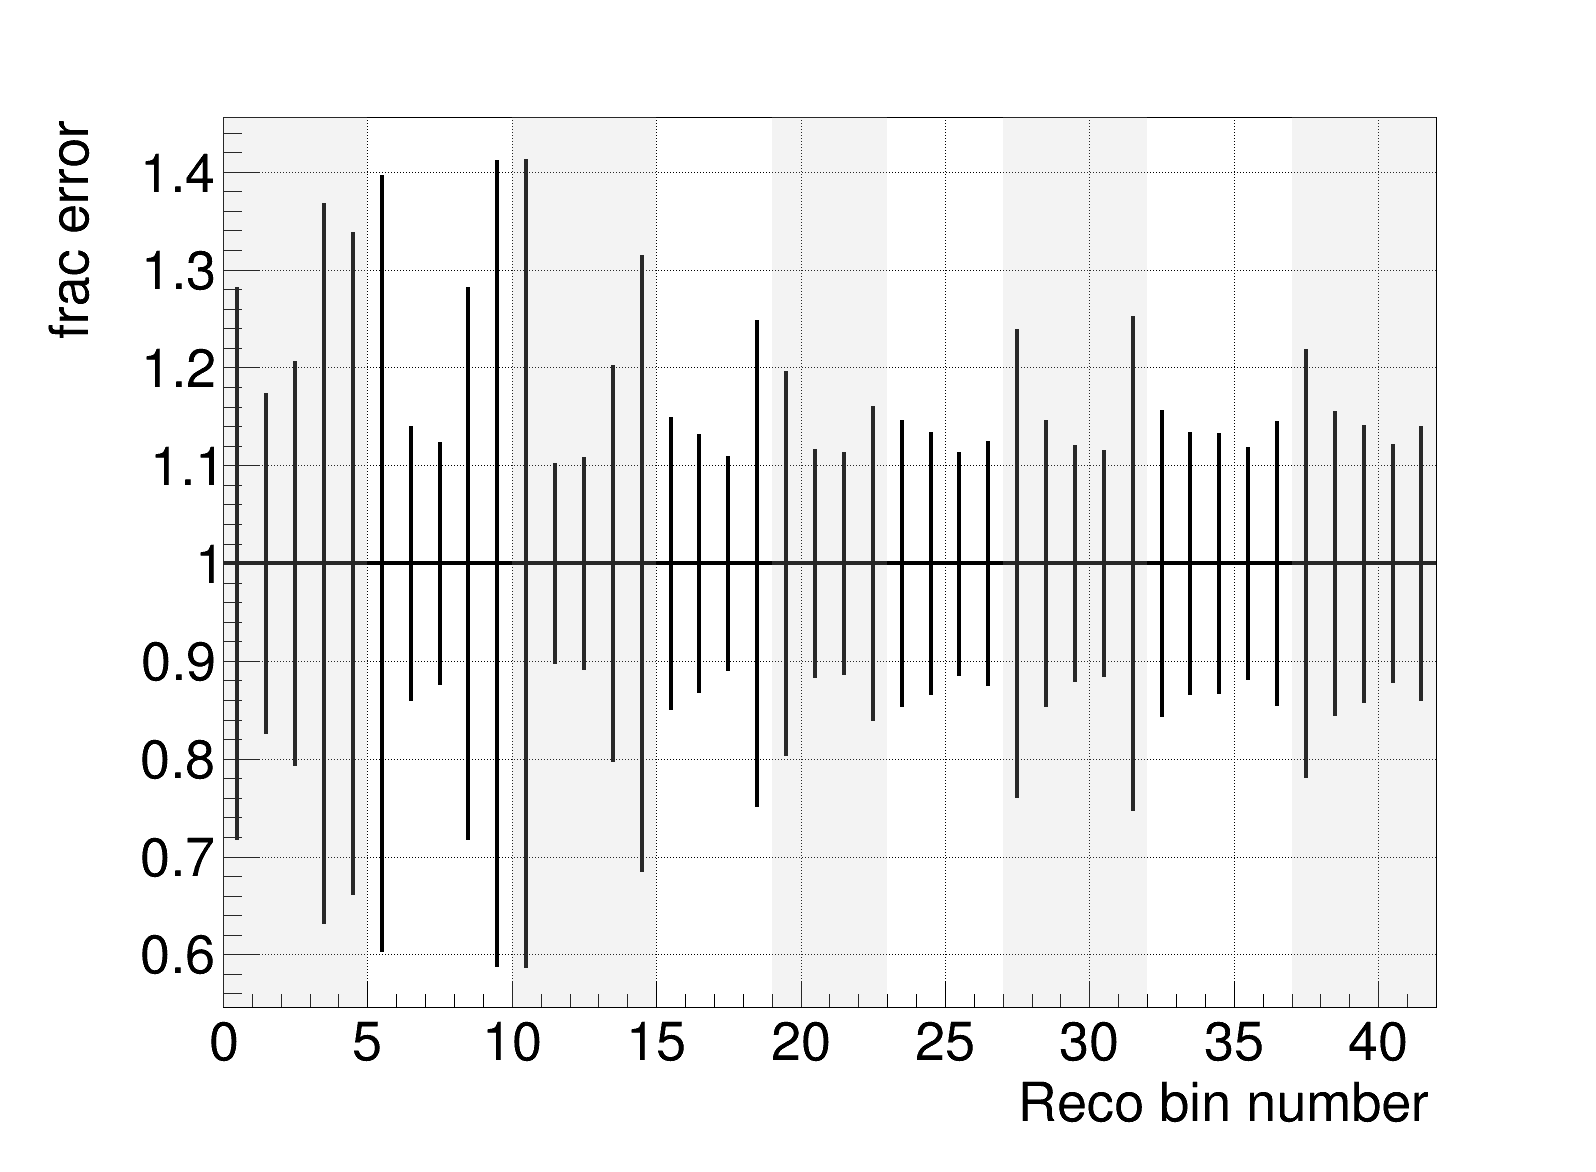

In [25]:
h_frac = FF.plot_err_array(frac_det)
h_frac.Draw()
h_histo = FF.histBkg(h_frac)
h_histo.Draw('hist same')
c1.Draw()
c1.SaveAs(outputdir_png + 'frac_err_detsys'+".png")
c1.SaveAs(outputdir_root + 'frac_err_detsys'+".root")
c1.SaveAs(outputdir_pdf + 'frac_err_detsys'+".pdf")
h_frac = FF.plot_err_array(frac_other)
h_frac.Draw()
h_histo.Draw('hist same')

c1.Draw()
c1.SaveAs(outputdir_png + 'frac_err_other'+".png")
c1.SaveAs(outputdir_root + 'frac_err_other'+".root")
c1.SaveAs(outputdir_pdf + 'frac_err_other'+".pdf")
h_frac = FF.plot_err_array(frac_all)
h_frac.Draw()
h_histo.Draw('hist same')

c1.Draw()
c1.SaveAs(outputdir_png + 'frac_err_all'+".png")
c1.SaveAs(outputdir_root + 'frac_err_all'+".root")
c1.SaveAs(outputdir_pdf + 'frac_err_all'+".pdf")
h_frac = FF.plot_err_array(frac_flux)
h_frac.Draw()
h_histo.Draw('hist same')

c1.Draw()
c1.SaveAs(outputdir_png + 'frac_err_flux'+".png")
c1.SaveAs(outputdir_root + 'frac_err_flux'+".root")
c1.SaveAs(outputdir_pdf + 'frac_err_flux'+".pdf")
h_frac = FF.plot_err_array(frac_crt)
h_frac.Draw()
h_histo.Draw('hist same')

c1.Draw()
c1.SaveAs(outputdir_png + 'frac_err_crt'+".png")
c1.SaveAs(outputdir_root + 'frac_err_crt'+".root")
c1.SaveAs(outputdir_pdf + 'frac_err_crt'+".pdf")
h_frac = FF.plot_err_array(frac_stat)
h_frac.Draw()
h_histo.Draw('hist same')

c1.Draw()
c1.SaveAs(outputdir_png + 'frac_err_stat'+".png")
c1.SaveAs(outputdir_root + 'frac_err_stat'+".root")
c1.SaveAs(outputdir_pdf + 'frac_err_stat'+".pdf")
h_frac = FF.plot_err_array(frac_dirt)
h_frac.Draw()
h_histo.Draw('hist same')

c1.Draw()
c1.SaveAs(outputdir_png + 'frac_err_dirt'+".png")
c1.SaveAs(outputdir_root + 'frac_err_dirt'+".root")
c1.SaveAs(outputdir_pdf + 'frac_err_dirt'+".pdf")

h_frac = FF.plot_err_array(frac_pot)
h_frac.Draw()
h_histo.Draw('hist same')
c1.Draw()
c1.SaveAs(outputdir_png + 'frac_err_pot'+".png")
c1.SaveAs(outputdir_root + 'frac_err_pot'+".root")
c1.SaveAs(outputdir_pdf + 'frac_err_pot'+".pdf")

h_frac = FF.plot_err_array(frac_tot)
h_frac.Draw()
h_histo.Draw('hist same')

c1.Draw()
c1.SaveAs(outputdir_png + 'frac_err_tot'+".png")
c1.SaveAs(outputdir_root + 'frac_err_tot'+".root")
c1.SaveAs(outputdir_pdf + 'frac_err_tot'+".pdf")

In [26]:
def getVar(this_pred,this_frac):
    n_bins = [42,0]#this_frac.shape
    covar = np.zeros((n_bins[0],n_bins[0]))
    corr = np.zeros((n_bins[0],n_bins[0]))
    for i in range(n_bins[0]):
        for j in range(n_bins[0]):
            covar[i][j] = this_frac[i][j]*this_pred[i]*this_pred[j]
    for i in range(n_bins[0]):
        for j in range(n_bins[0]):    
            corr[i][j] = covar[i][j]/(math.sqrt(covar[i][i])*math.sqrt(covar[j][j]))
    return covar, corr
    
    

In [27]:
def plot_arr(arr,modelname):
    ROOT.gStyle.SetOptTitle(1)
    h_tmp = FF.arr2plot(arr)
    if arr.ndim ==2:
        h_tmp.SetYTitle('Bin number')
        h_tmp.SetXTitle('Bin number')
    else:
        h_tmp.SetXTitle('Bin number')
    h_tmp.SetTitle(modelname)
    FF.main_plot(h_tmp)
    h_tmp.Draw('colz')
    c1.Draw()
    c1.SaveAs(outputdir_png +modelname+".png")
    c1.SaveAs(outputdir_root +modelname+".root")
    c1.SaveAs(outputdir_pdf +modelname+".pdf") 
    ROOT.gStyle.SetOptTitle(0)
    return

Warning in <TROOT::Append>: Replacing existing TH1: h_this (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Covar_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Covar_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Covar_detsys.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Correlation_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Correlation_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/even

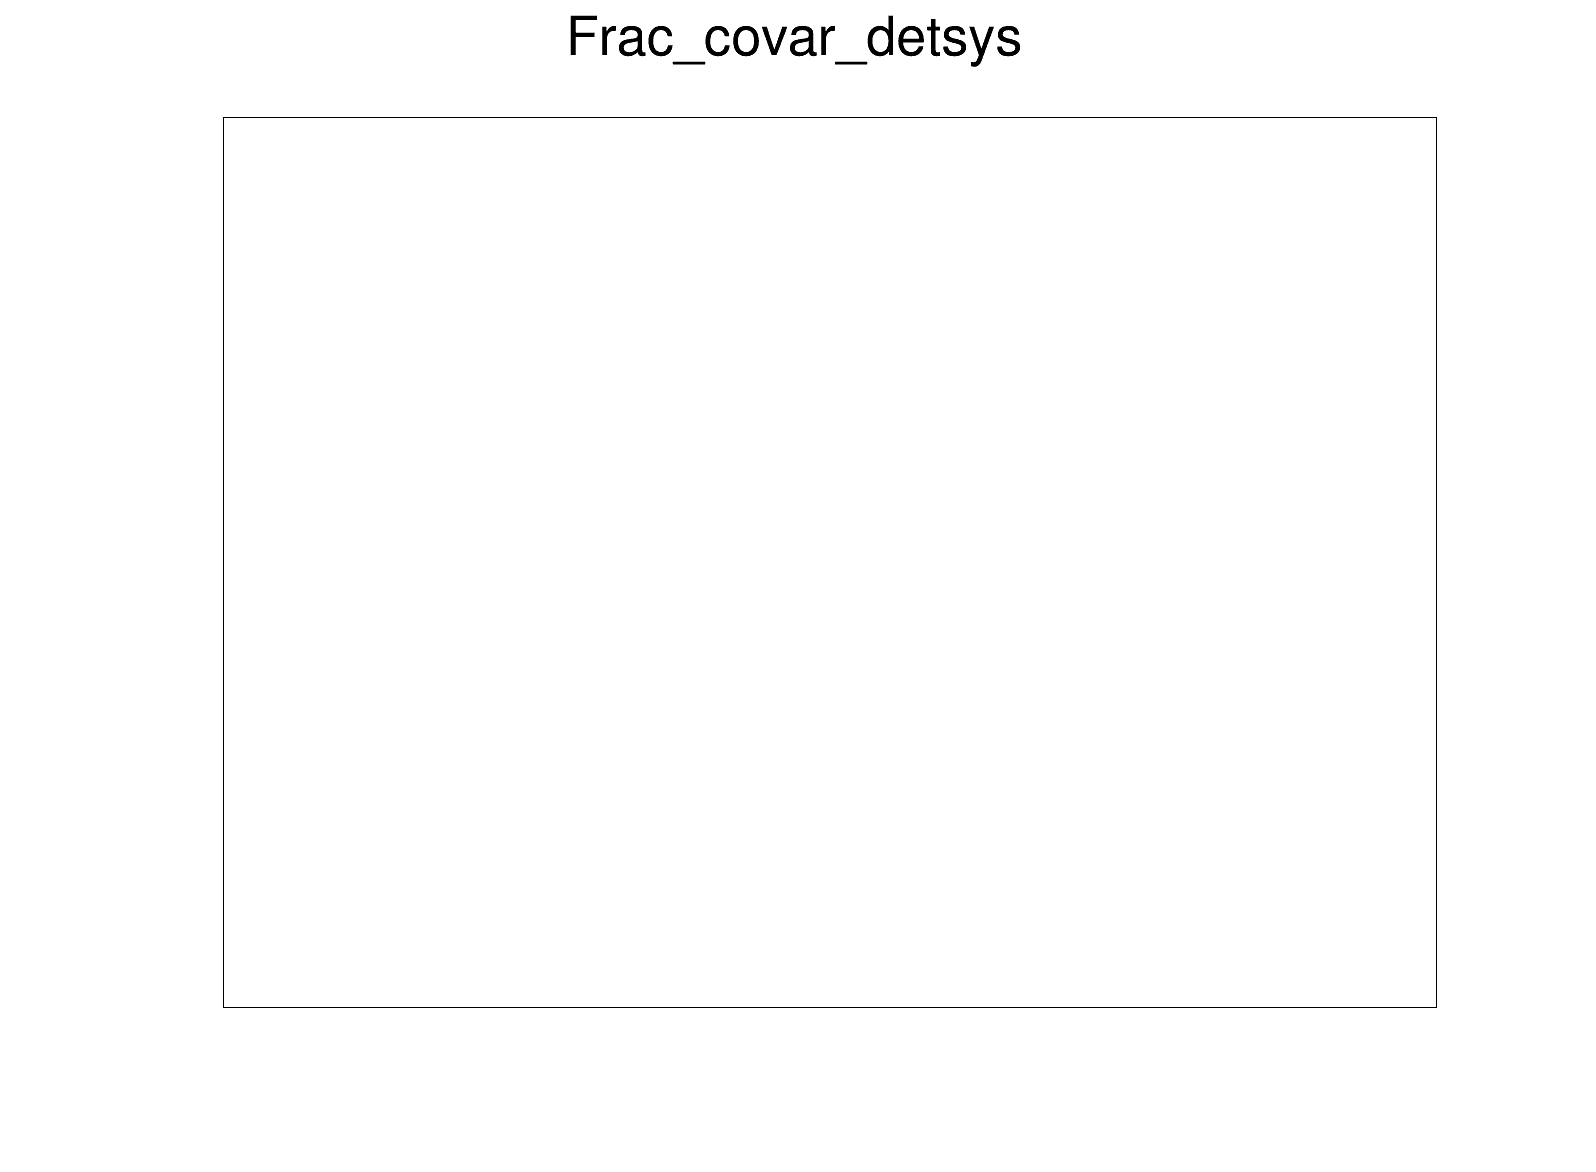

In [70]:
covar, corr = getVar(FF.plot2arr(h_this_pred,1),frac_det)
plot_arr(covar,'Covar_detsys')
plot_arr(corr,'Correlation_detsys')
plot_arr(frac_tot,'Frac_covar_detsys')

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Covar_otherGenie.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Covar_otherGenie.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Covar_otherGenie.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Correlation_otherGenie.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Correlation_otherGenie.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Correlation_otherGenie.pdf has been created
In

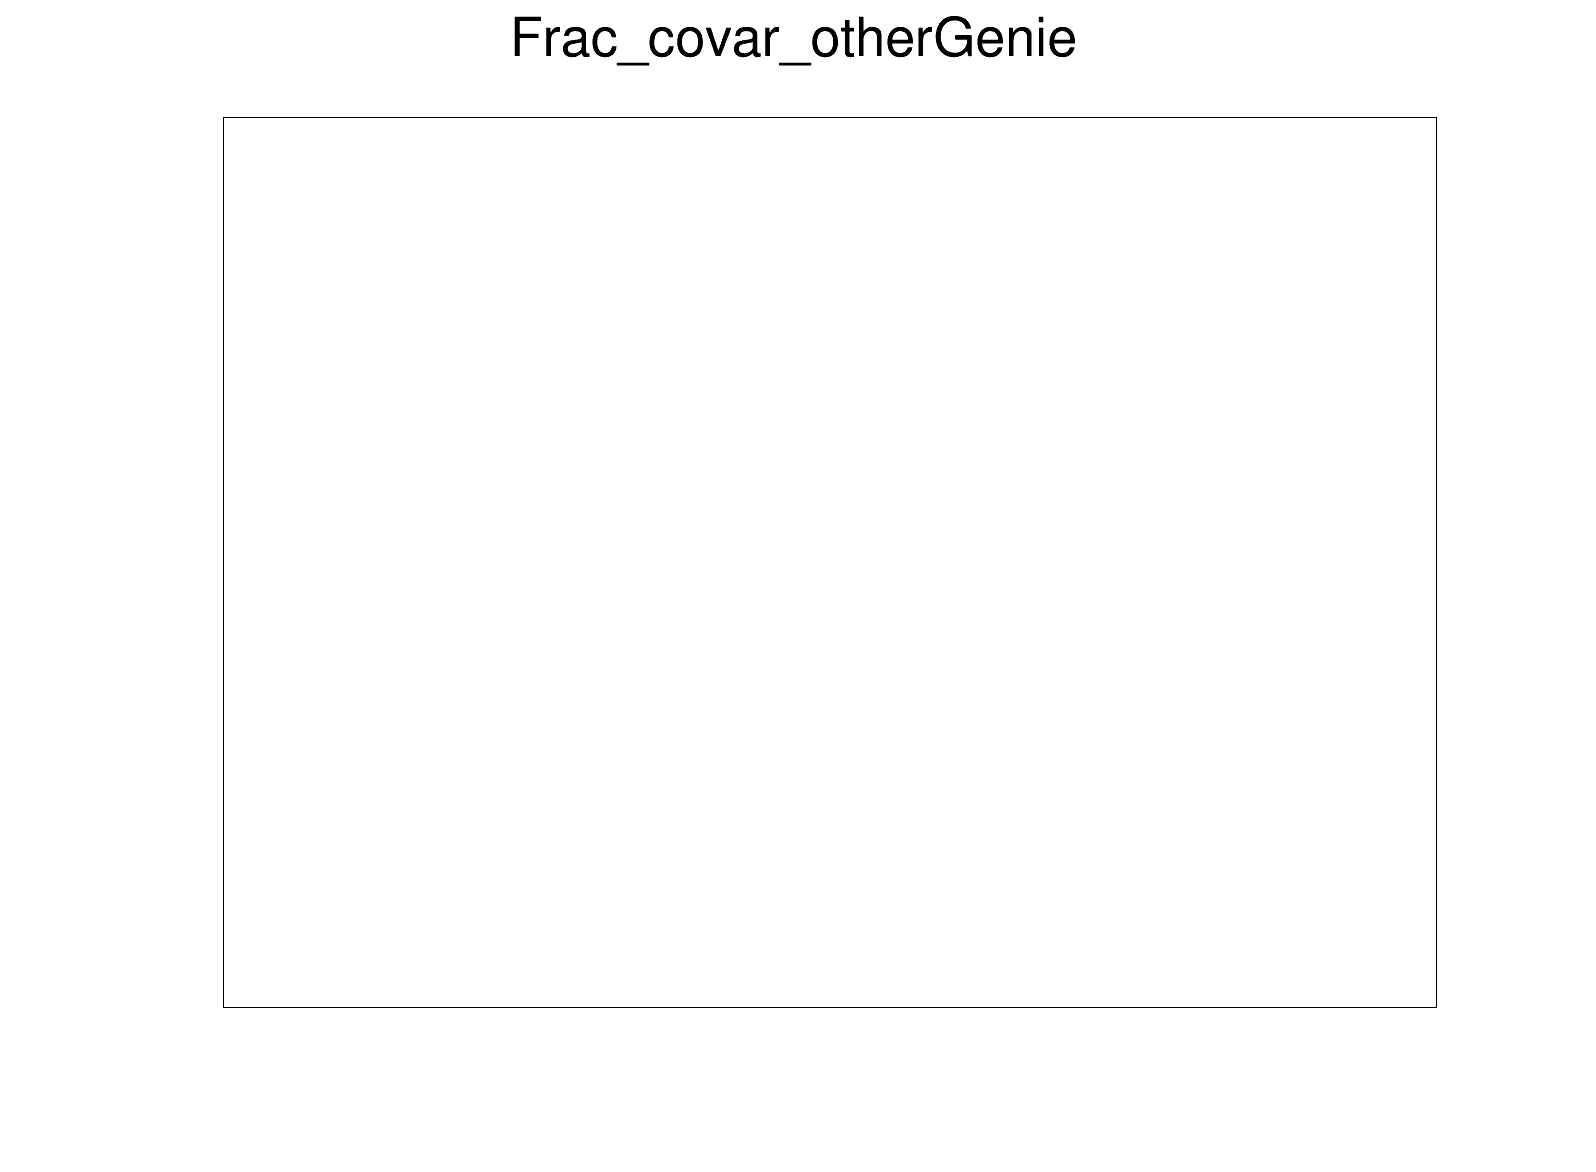

In [71]:
covar, corr = getVar(FF.plot2arr(h_this_pred,1),frac_other)
plot_arr(covar,'Covar_otherGenie')
plot_arr(corr,'Correlation_otherGenie')
plot_arr(frac_tot,'Frac_covar_otherGenie')

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Covar_allGenie.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Covar_allGenie.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Covar_allGenie.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Correlation_allGenie.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Correlation_allGenie.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Correlation_allGenie.pdf has been created
Info in <TCanv

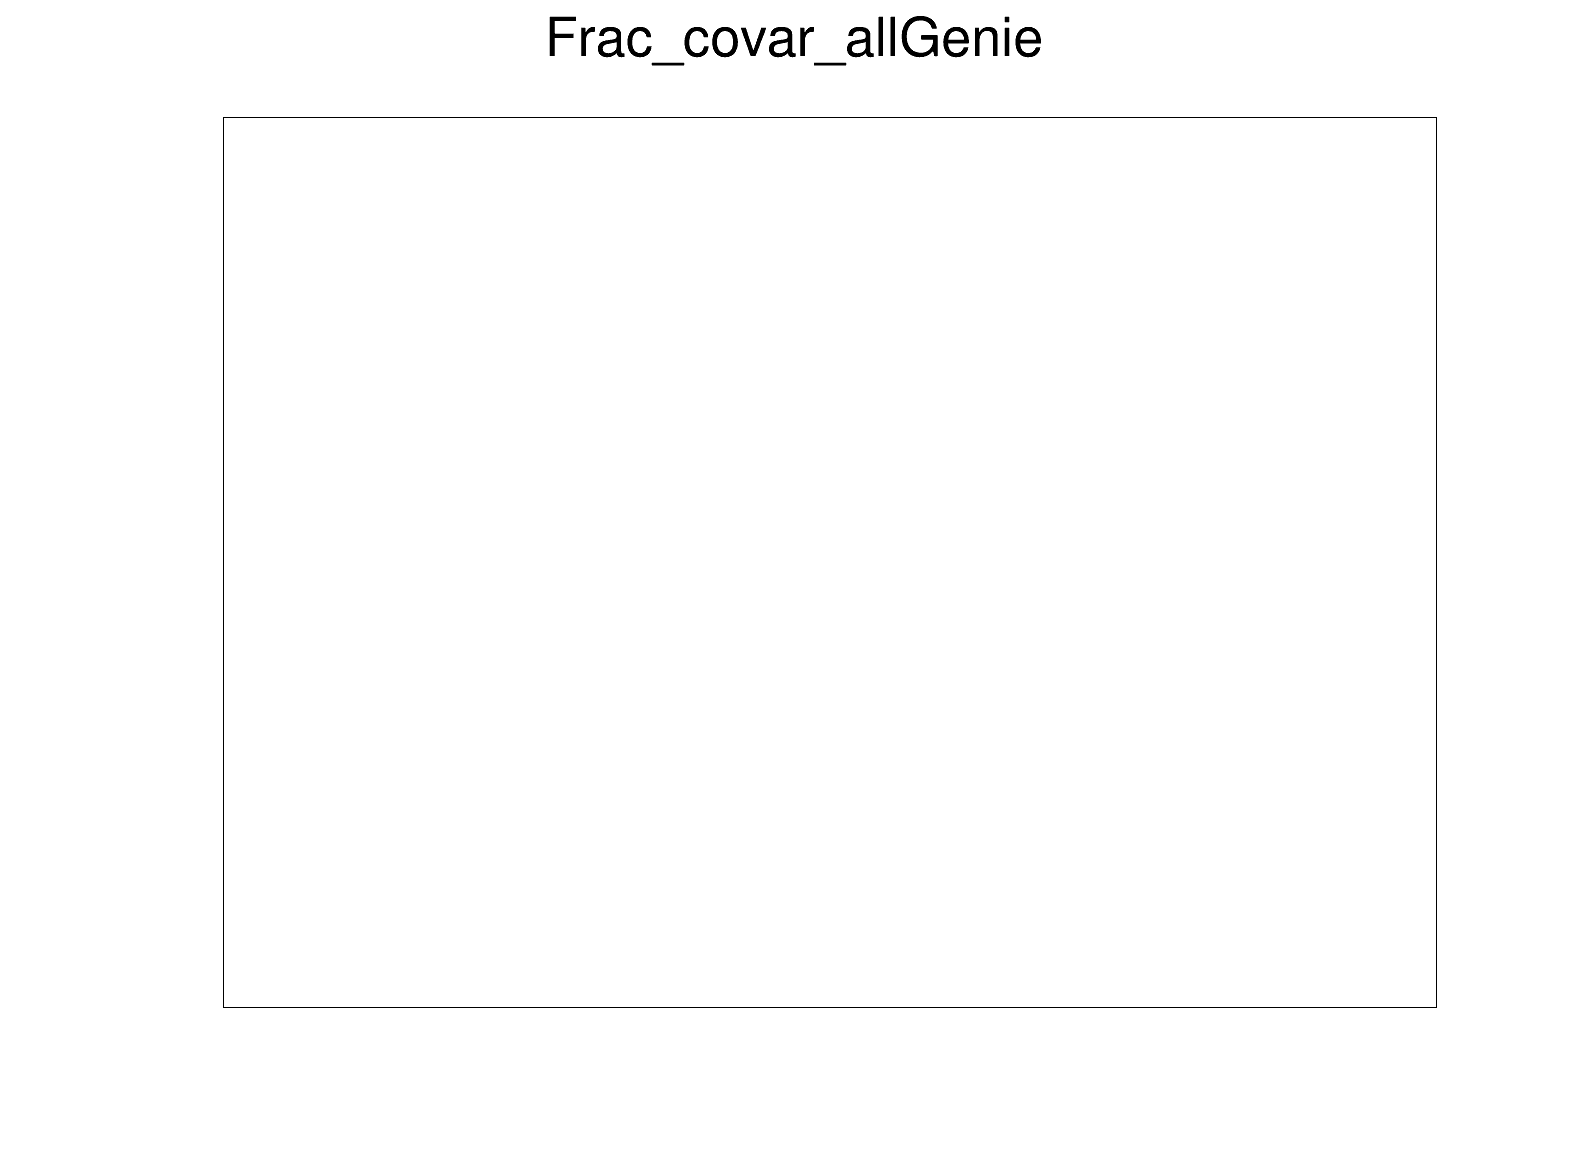

In [72]:
covar, corr = getVar(FF.plot2arr(h_this_pred,1),frac_all)
plot_arr(covar,'Covar_allGenie')
plot_arr(corr,'Correlation_allGenie')
plot_arr(frac_tot,'Frac_covar_allGenie')

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Covar_fluxsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Covar_fluxsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Covar_fluxsys.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Correlation_fluxsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Correlation_fluxsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Correlation_fluxsys.pdf has been created
Info in <TCanvas::Pr

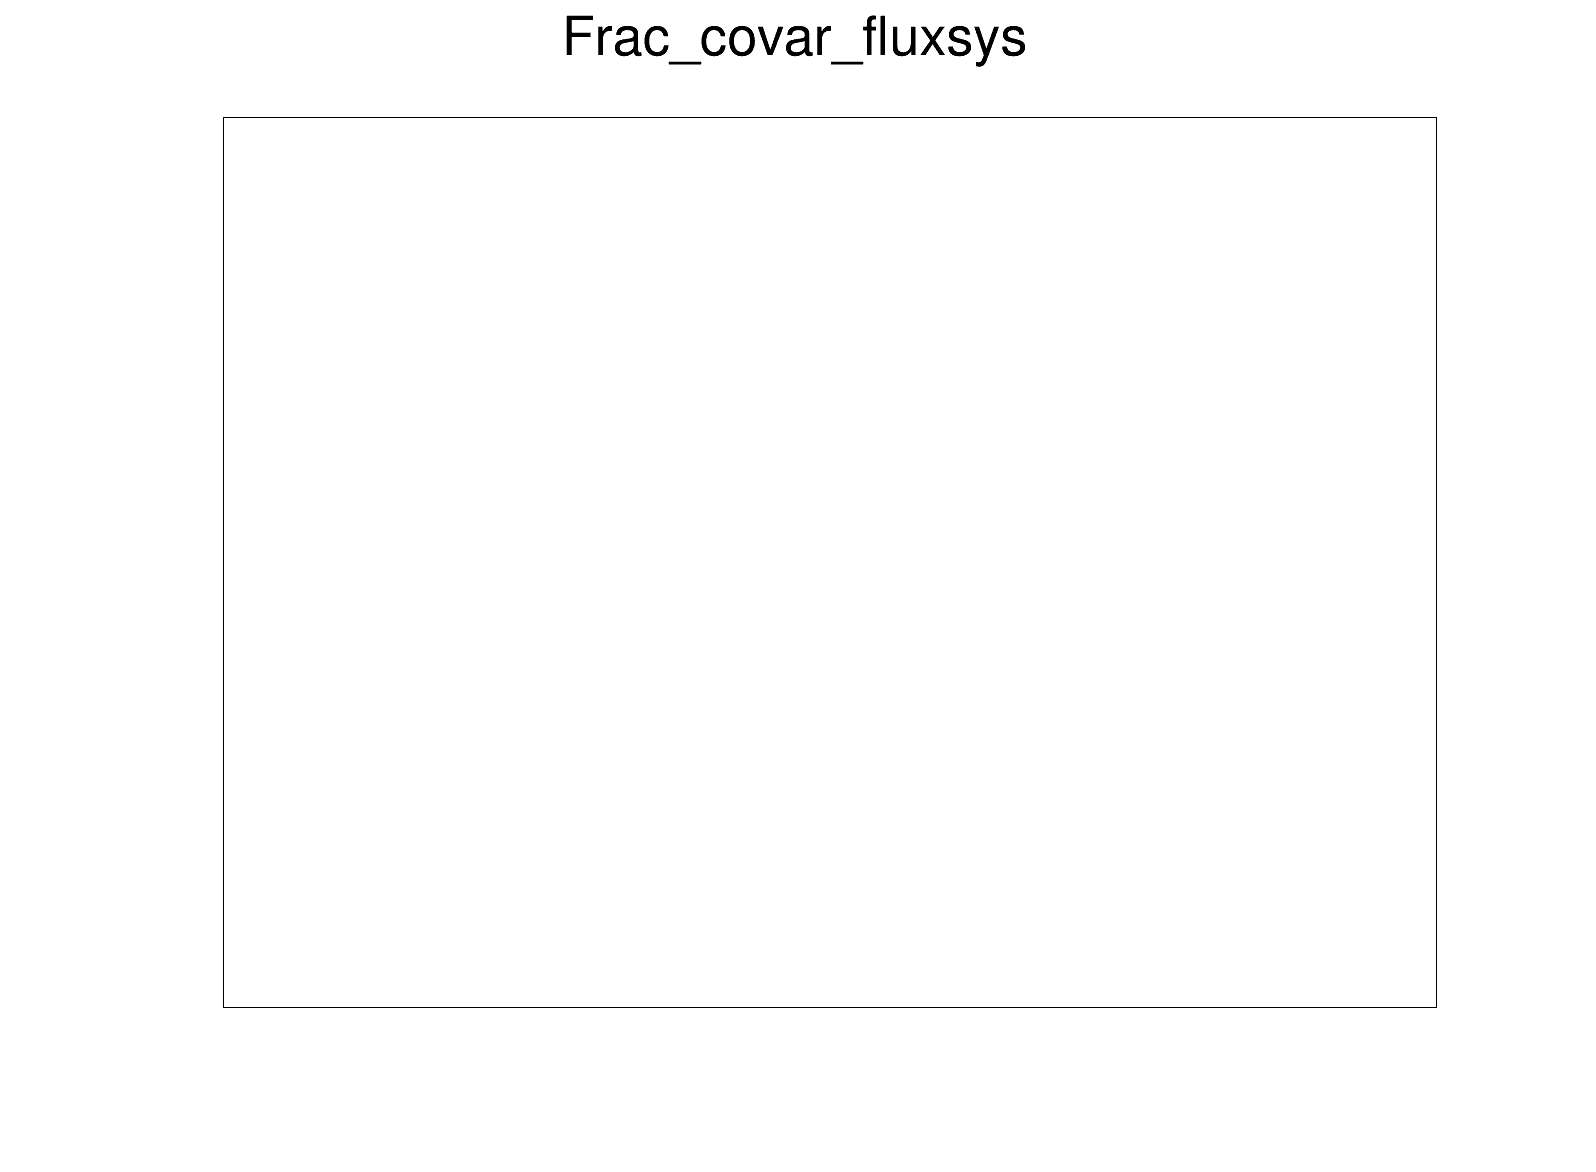

In [73]:
covar, corr = getVar(FF.plot2arr(h_this_pred,1),frac_flux)
plot_arr(covar,'Covar_fluxsys')
plot_arr(corr,'Correlation_fluxsys')
plot_arr(frac_tot,'Frac_covar_fluxsys')

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Covar_crt.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Covar_crt.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Covar_crt.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Correlation_crt.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Correlation_crt.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Correlation_crt.pdf has been created
Info in <TCanvas::Print>: png file /home/tme

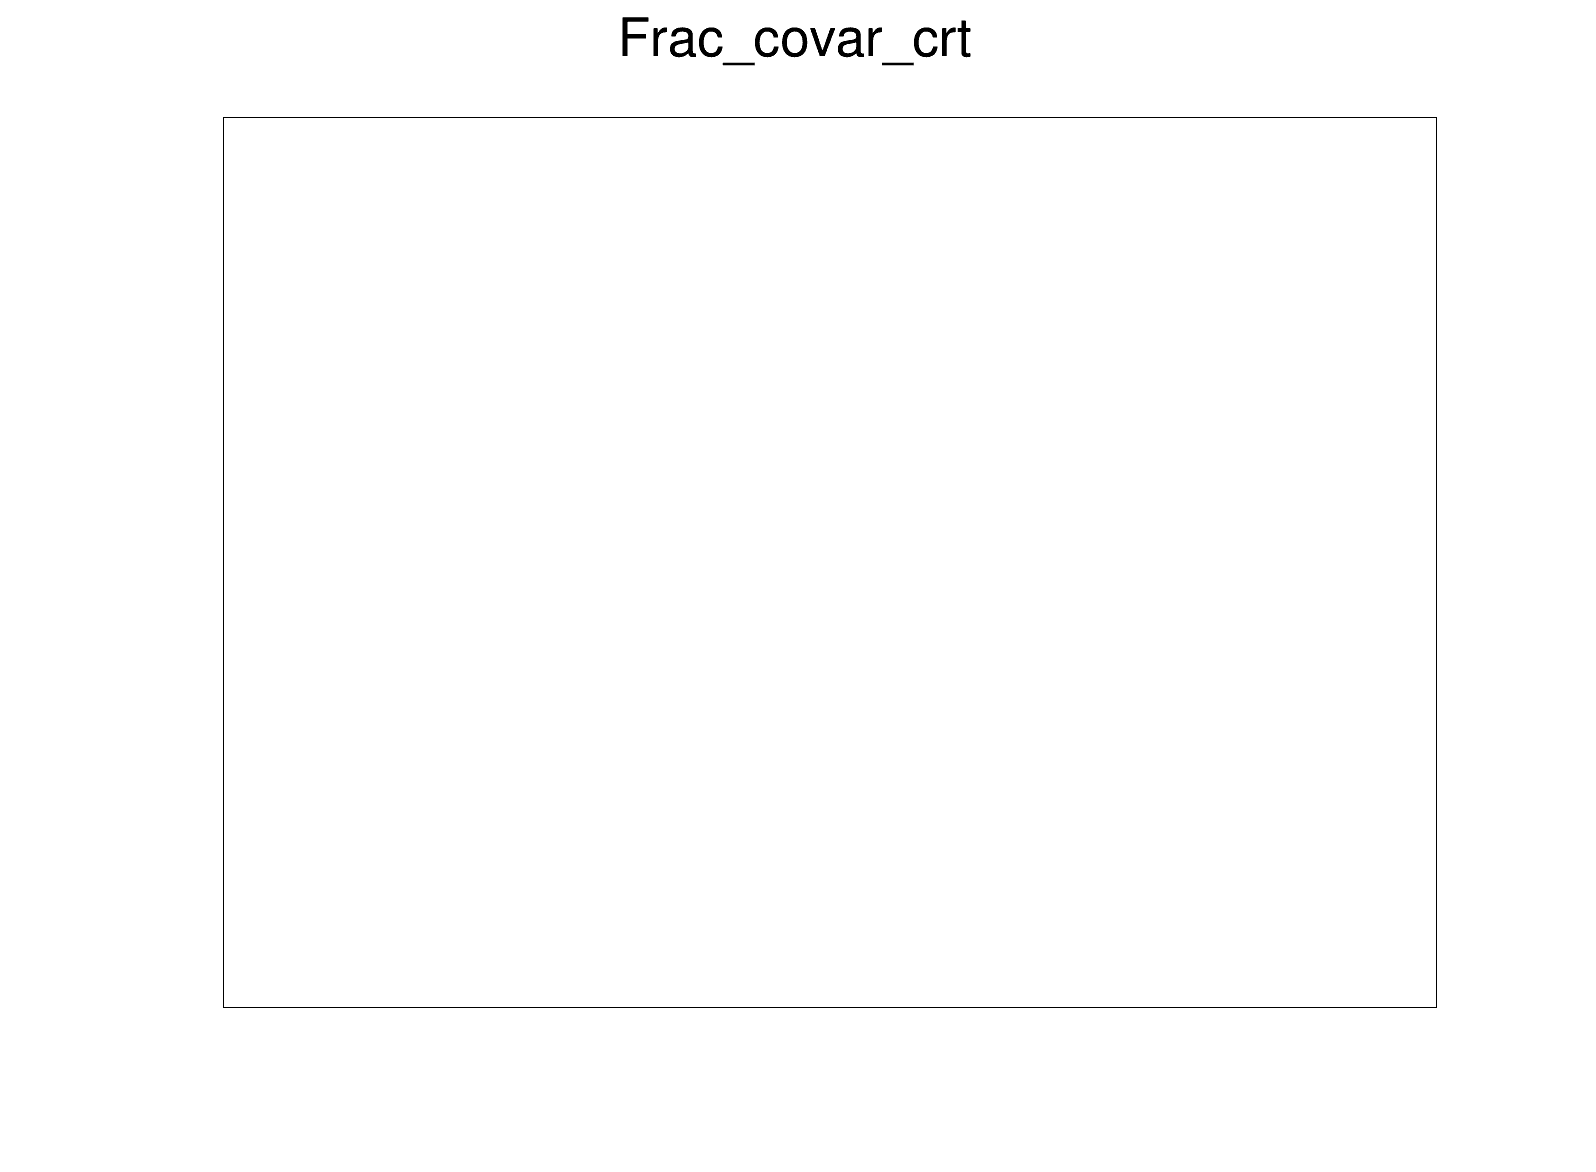

In [74]:
covar, corr = getVar(FF.plot2arr(h_this_pred,1),frac_crt)
plot_arr(covar,'Covar_crt')
plot_arr(corr,'Correlation_crt')
plot_arr(frac_tot,'Frac_covar_crt')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Covar_dirt.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Covar_dirt.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Covar_dirt.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Correlation_dirt.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Correlation_dirt.root has been created
Info in <TCanvas::Pri

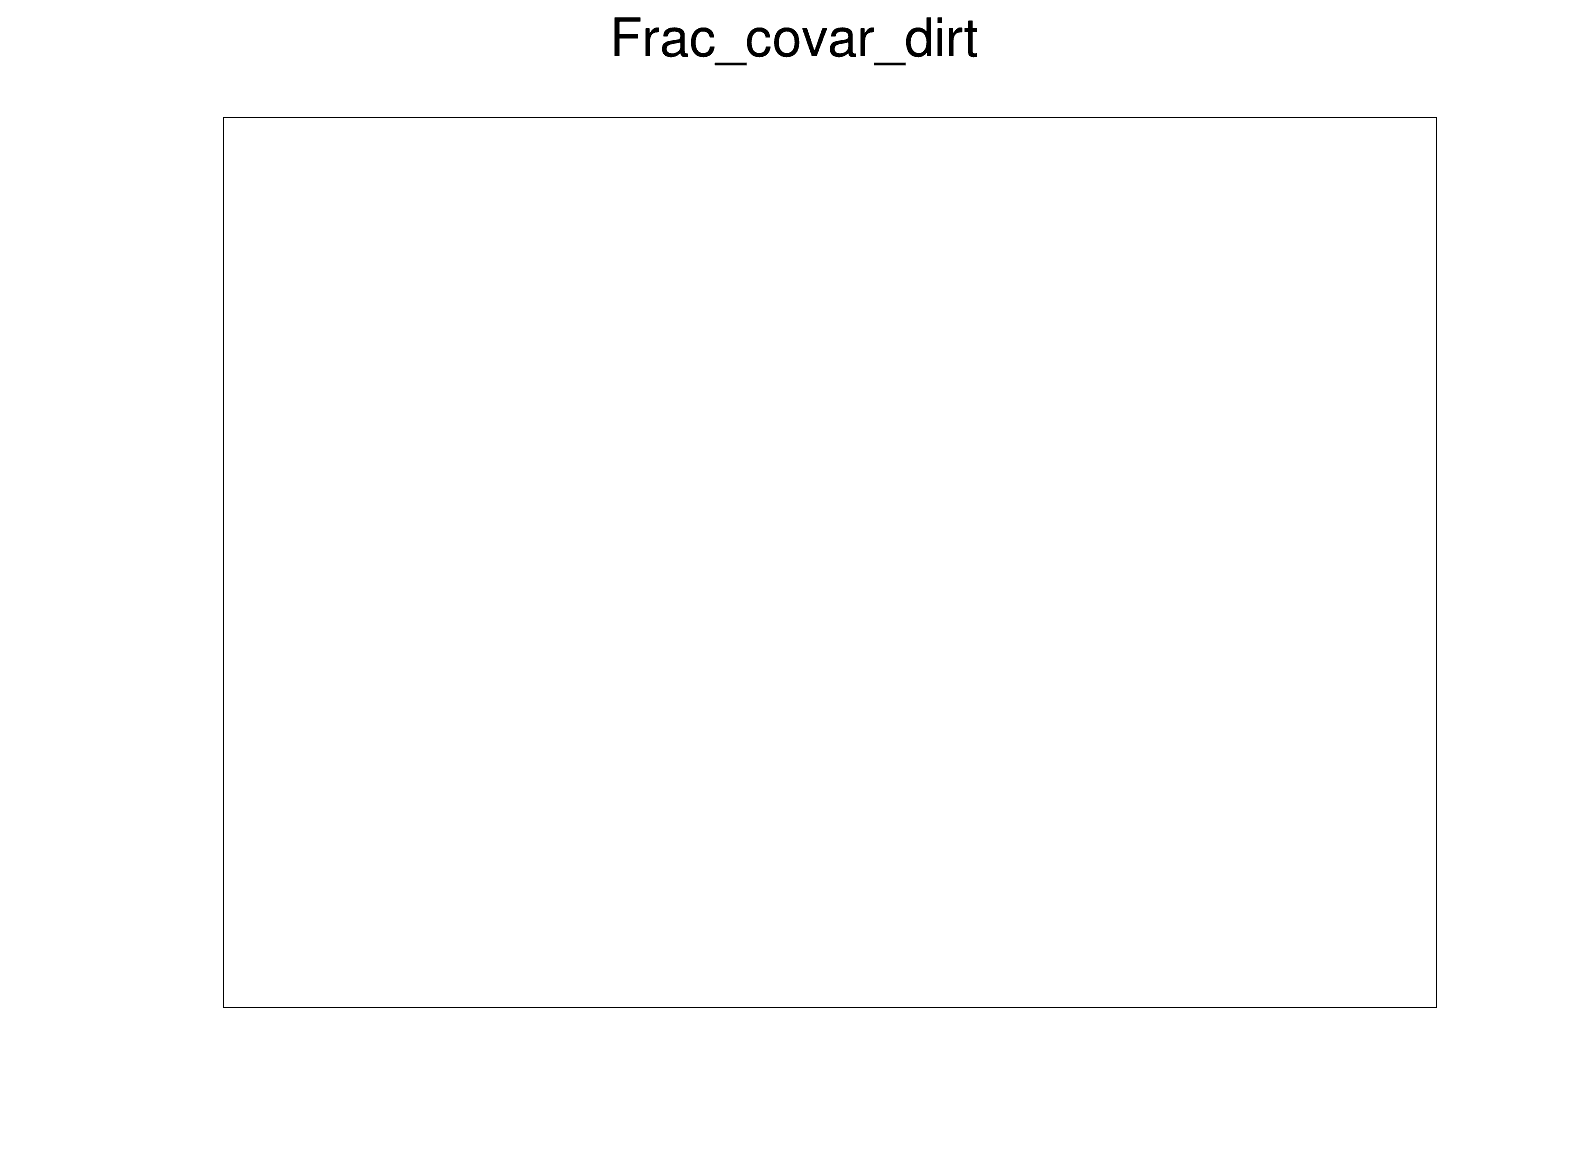

In [75]:
covar, corr = getVar(FF.plot2arr(h_this_pred,1),frac_dirt)
plot_arr(covar,'Covar_dirt')
plot_arr(corr,'Correlation_dirt')
plot_arr(frac_tot,'Frac_covar_dirt')

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Covar_stat.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Covar_stat.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Covar_stat.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Correlation_stat.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Correlation_stat.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Correlation_stat.pdf has been created
Info in <TCanvas::Print>: png file /ho

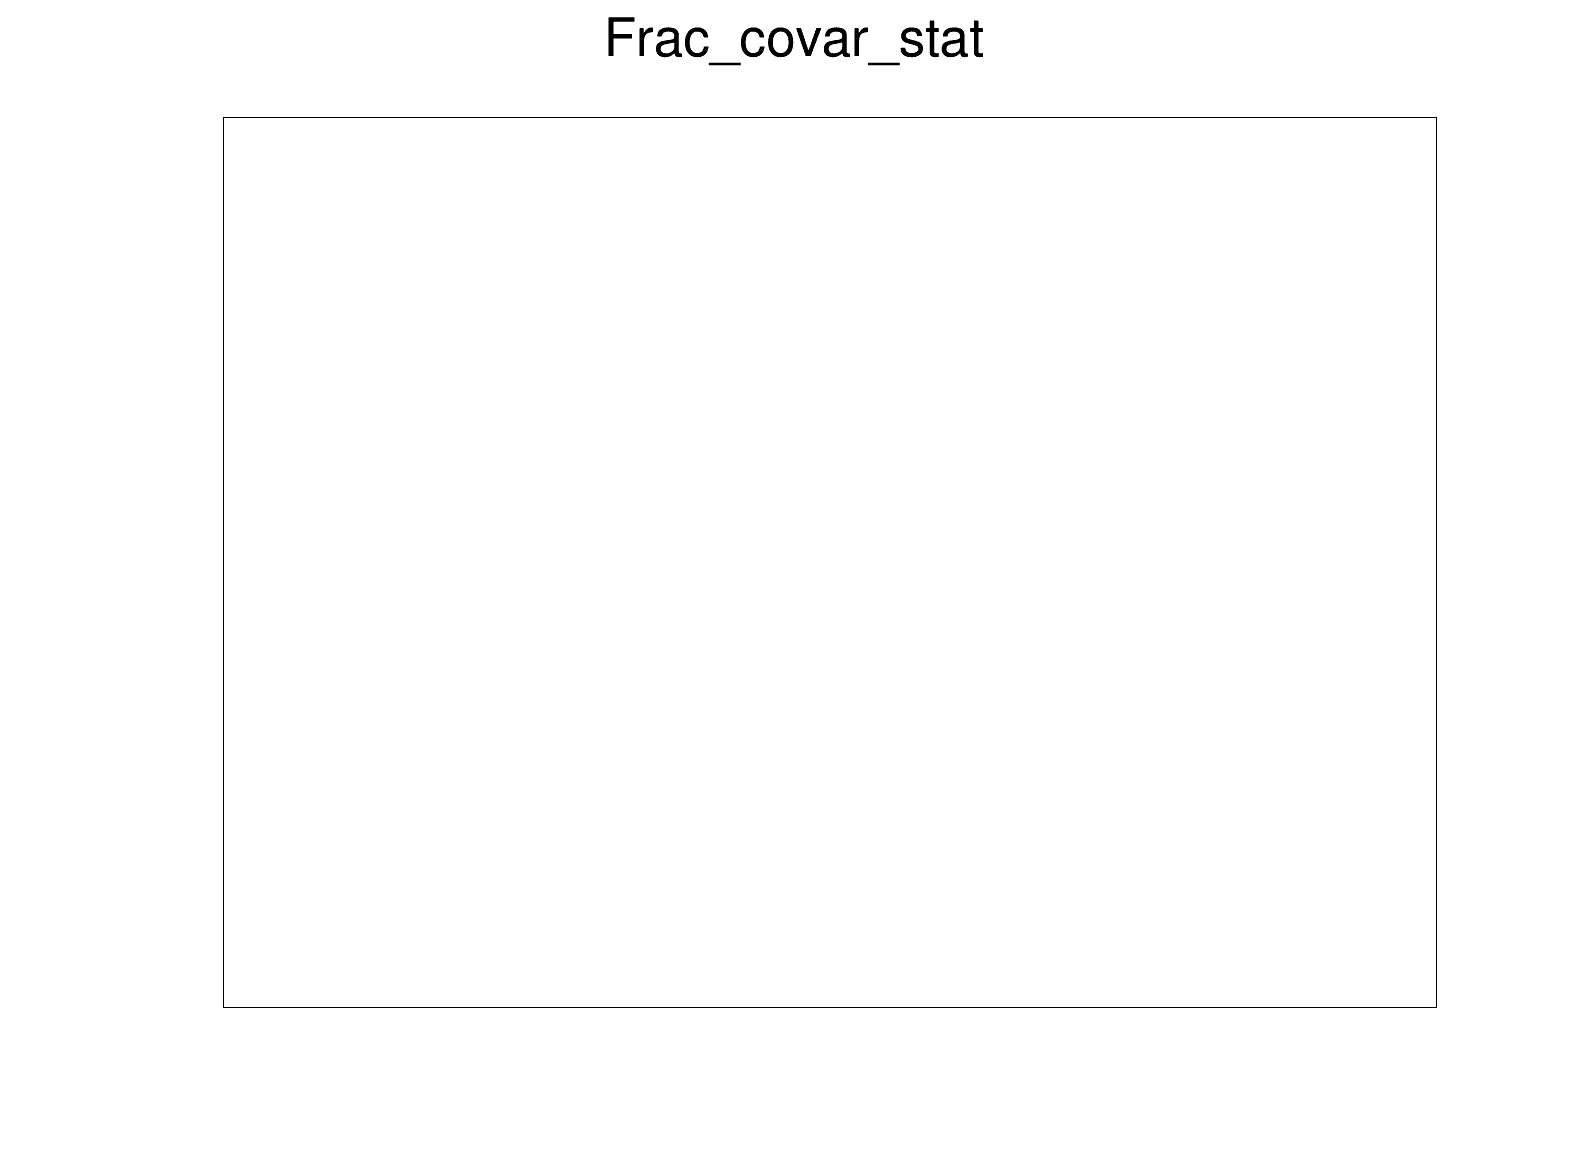

In [76]:
covar, corr = getVar(FF.plot2arr(h_this_pred,1),frac_stat)
plot_arr(covar,'Covar_stat')
plot_arr(corr,'Correlation_stat')
plot_arr(frac_tot,'Frac_covar_stat')

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Covar_pot.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Covar_pot.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Covar_pot.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Correlation_pot.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Correlation_pot.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Correlation_pot.pdf has been created
Info in <TCanvas::Print>: png file /home/tme

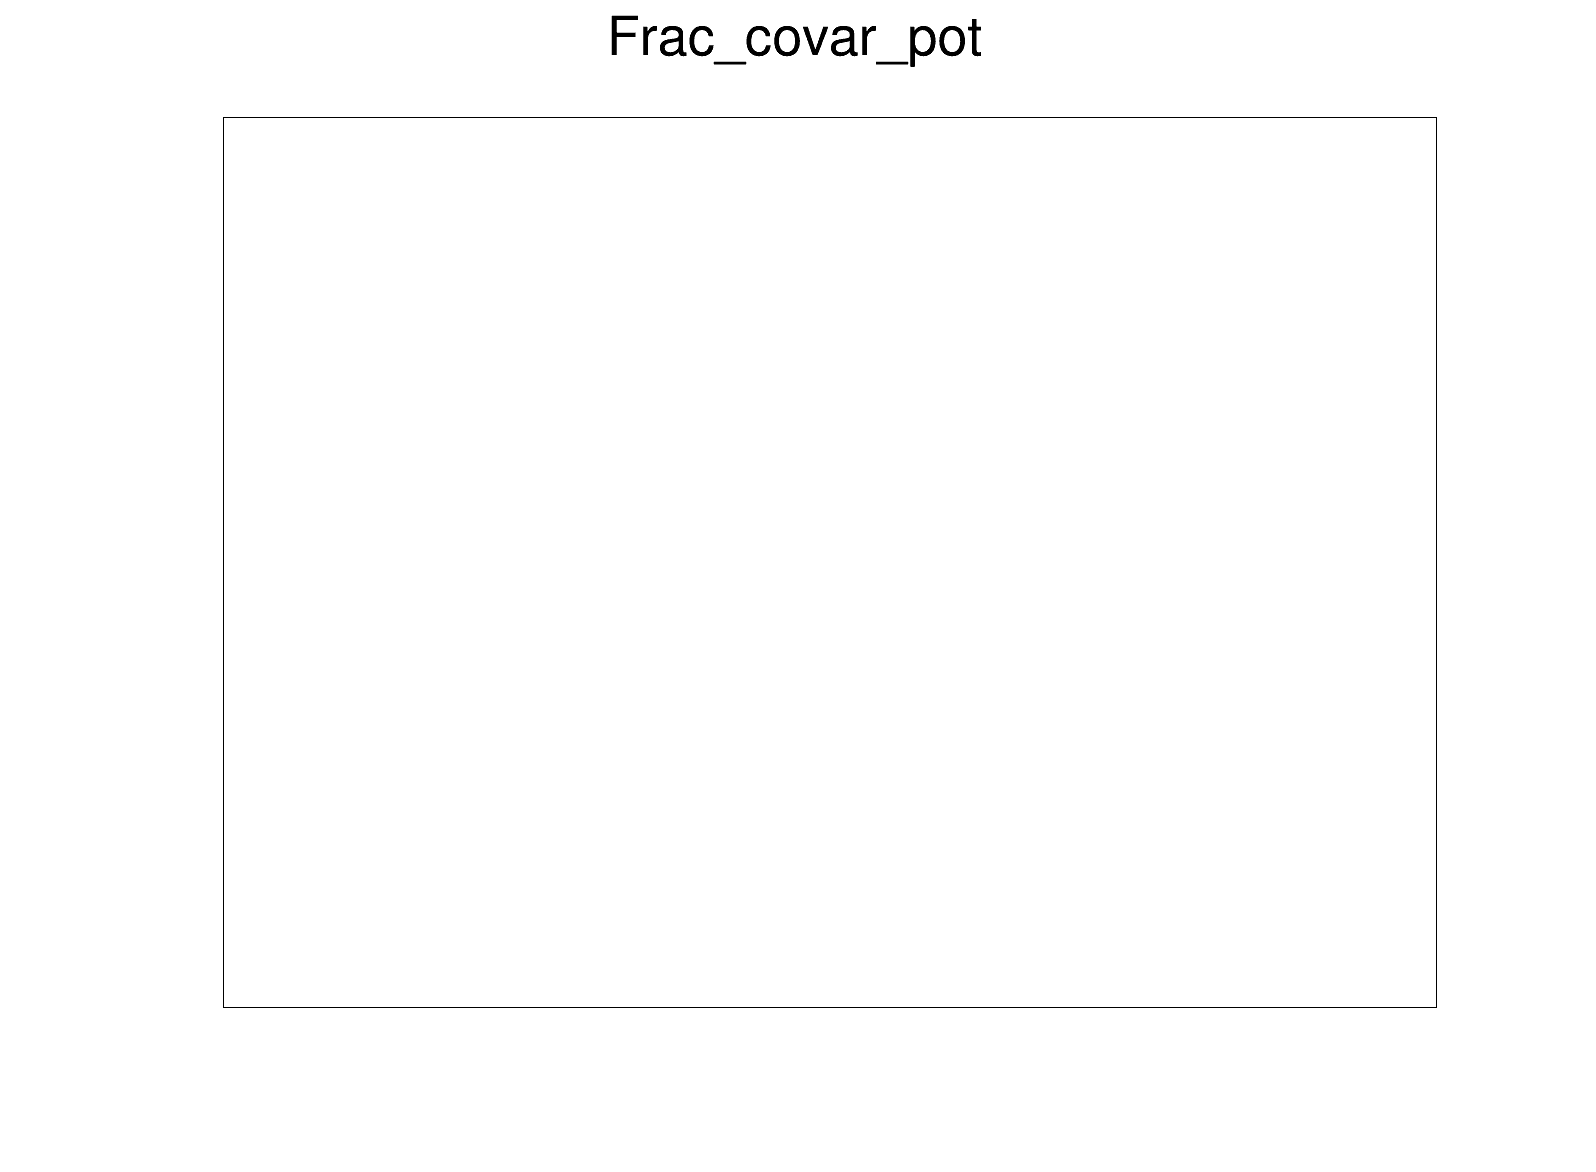

In [77]:
covar, corr = getVar(FF.plot2arr(h_this_pred,1),frac_pot)
plot_arr(covar,'Covar_pot')
plot_arr(corr,'Correlation_pot')
plot_arr(frac_tot,'Frac_covar_pot')

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Covar.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Covar.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Covar.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Correlation.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Correlation.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Correlation.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_

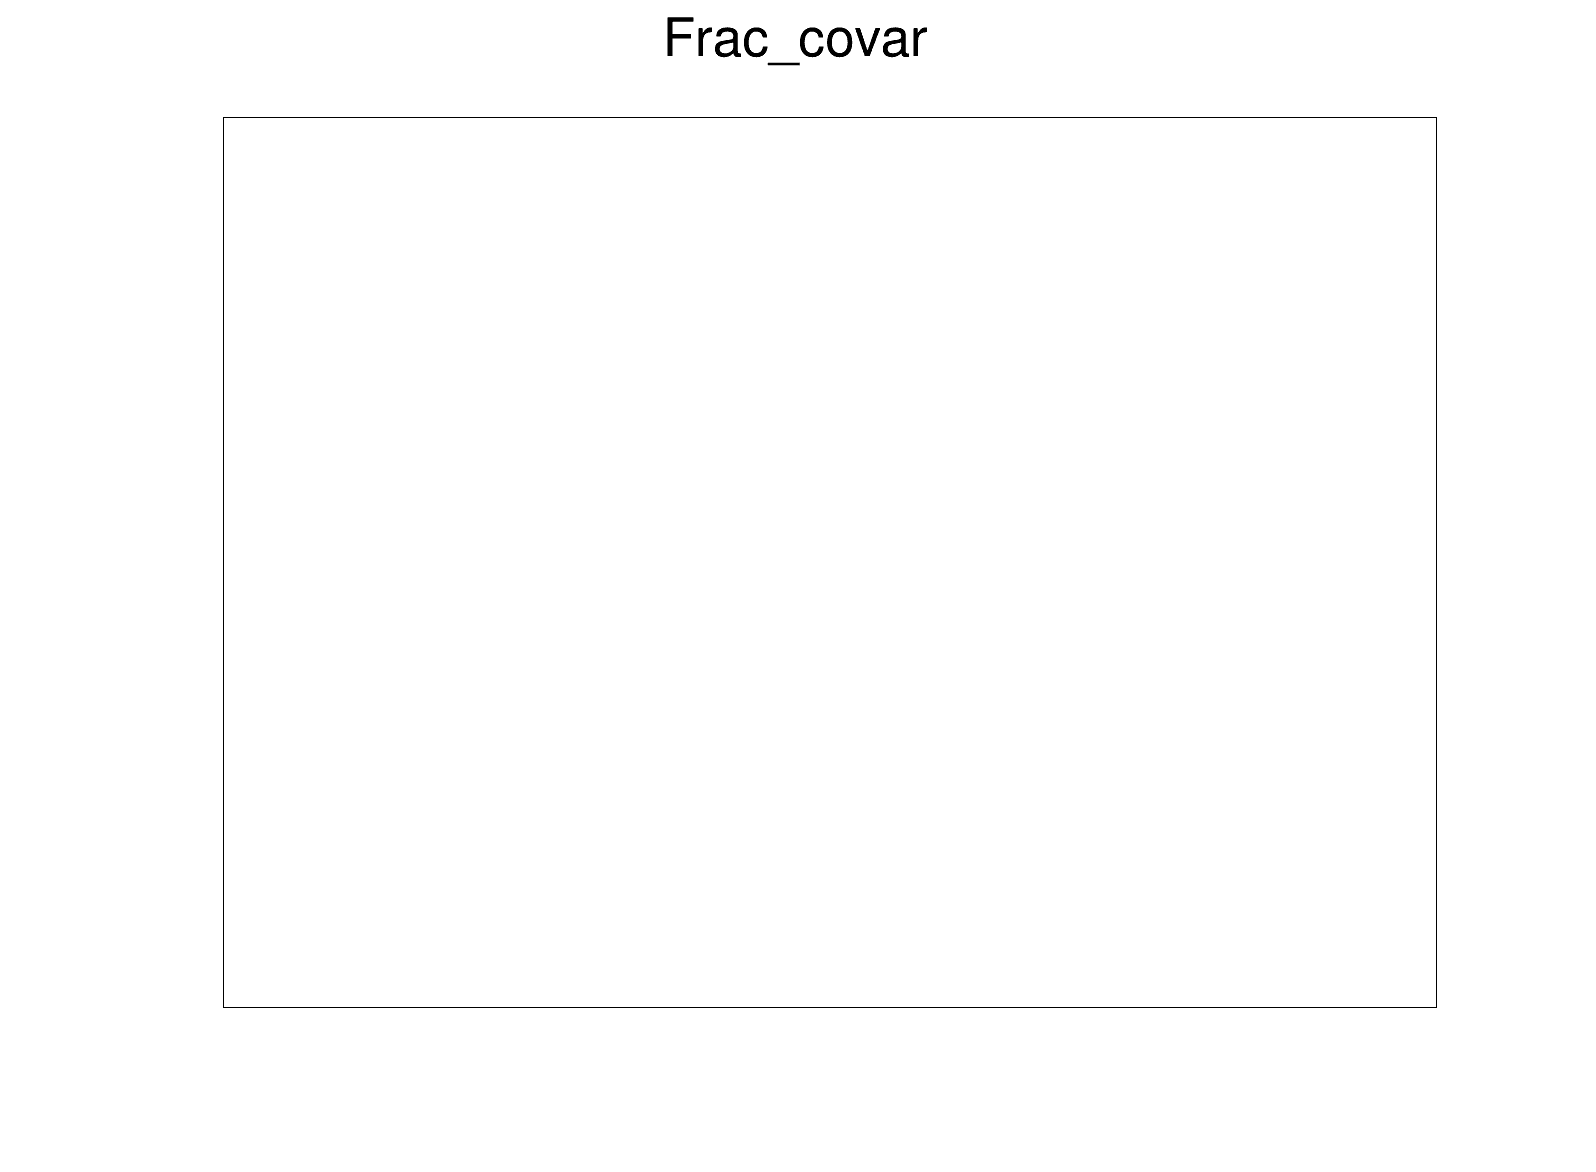

In [78]:
covar, corr = getVar(FF.plot2arr(h_this_pred,1),frac_tot)
plot_arr(covar,'Covar')
plot_arr(corr,'Correlation')
plot_arr(frac_tot,'Frac_covar')

In [29]:
#eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_this_true,frac_tot, 'event_rate_this_tune','this model')
#dasfasdfasdf

In [30]:
'''eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_this_true,frac_tot, 'event_rate_this_tune','this model')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_true_g3_tune,frac_tot, 'event_rate_G3_tune','G3 uB tune')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_g3,frac_tot, 'event_rate_G3','G3')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_g2,frac_tot, 'event_rate_G2','G2')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_gibuu,frac_tot, 'event_rate_gibuu','GiBuu')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_neut,frac_tot, 'event_rate_neut','Neut')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_nuwro,frac_tot, 'event_rate_nuwro','NuWro')'''


"eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_this_true,frac_tot, 'event_rate_this_tune','this model')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_true_g3_tune,frac_tot, 'event_rate_G3_tune','G3 uB tune')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_g3,frac_tot, 'event_rate_G3','G3')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_g2,frac_tot, 'event_rate_G2','G2')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_gibuu,frac_tot, 'event_rate_gibuu','GiBuu')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_neut,frac_tot, 'event_rate_neut','Neut')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_nuwro,frac_tot, 'event_rate_nuwro','NuWro')"

In [31]:
def plotBackgroundSamples(h_ext_func,h_dirt_func,h_bkg_func):
    
    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.1)
    c1.SetBottomMargin(0.1)
    
    hs = ROOT.THStack("hs","");
    h_ext_func.SetFillColor(ROOT.kBlue+2)
    h_ext_func.SetLineColor(ROOT.kBlue+2)
    h_ext_func.SetXTitle("Reco bin number")
    h_ext_func.SetYTitle("Number of background events")
    h_ext_func.SetFillStyle(3004)
    h_dirt_func.SetFillColor(ROOT.kOrange+2);
    h_dirt_func.SetLineColor(ROOT.kOrange+2);
    h_bkg_func.SetFillColor(ROOT.kGray)
    h_bkg_func.SetLineColor(ROOT.kGray)
    hs.Add(h_ext_func)
    hs.Add(h_dirt_func)
    hs.Add(h_bkg_func)
    

    legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
    legend.AddEntry(h_ext_func,'Pure cosmic (off-beam data)',"f")
    legend.AddEntry(h_dirt_func,'Dirt #nu interactions',"f")
    legend.AddEntry(h_bkg_func,'background #nu interactions',"f")
    h_ext.SetMaximum(hs.GetMaximum()*1.2)
    h_ext_func.Draw('hist')
    hs.Draw('hist same')
    legend.Draw()
    
    prelim, pot_tex = FF.draw_adding()
    prelim.Draw()
    pot_tex.Draw()
    
    c1.Draw()
    c1.SaveAs(outputdir_png + 'background_sample'+".png")
    c1.SaveAs(outputdir_root + 'background_sample'+".root")
    c1.SaveAs(outputdir_pdf + 'background_sample'+".pdf")
    
    return c1

    

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/background_sample.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/background_sample.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/background_sample.pdf has been created


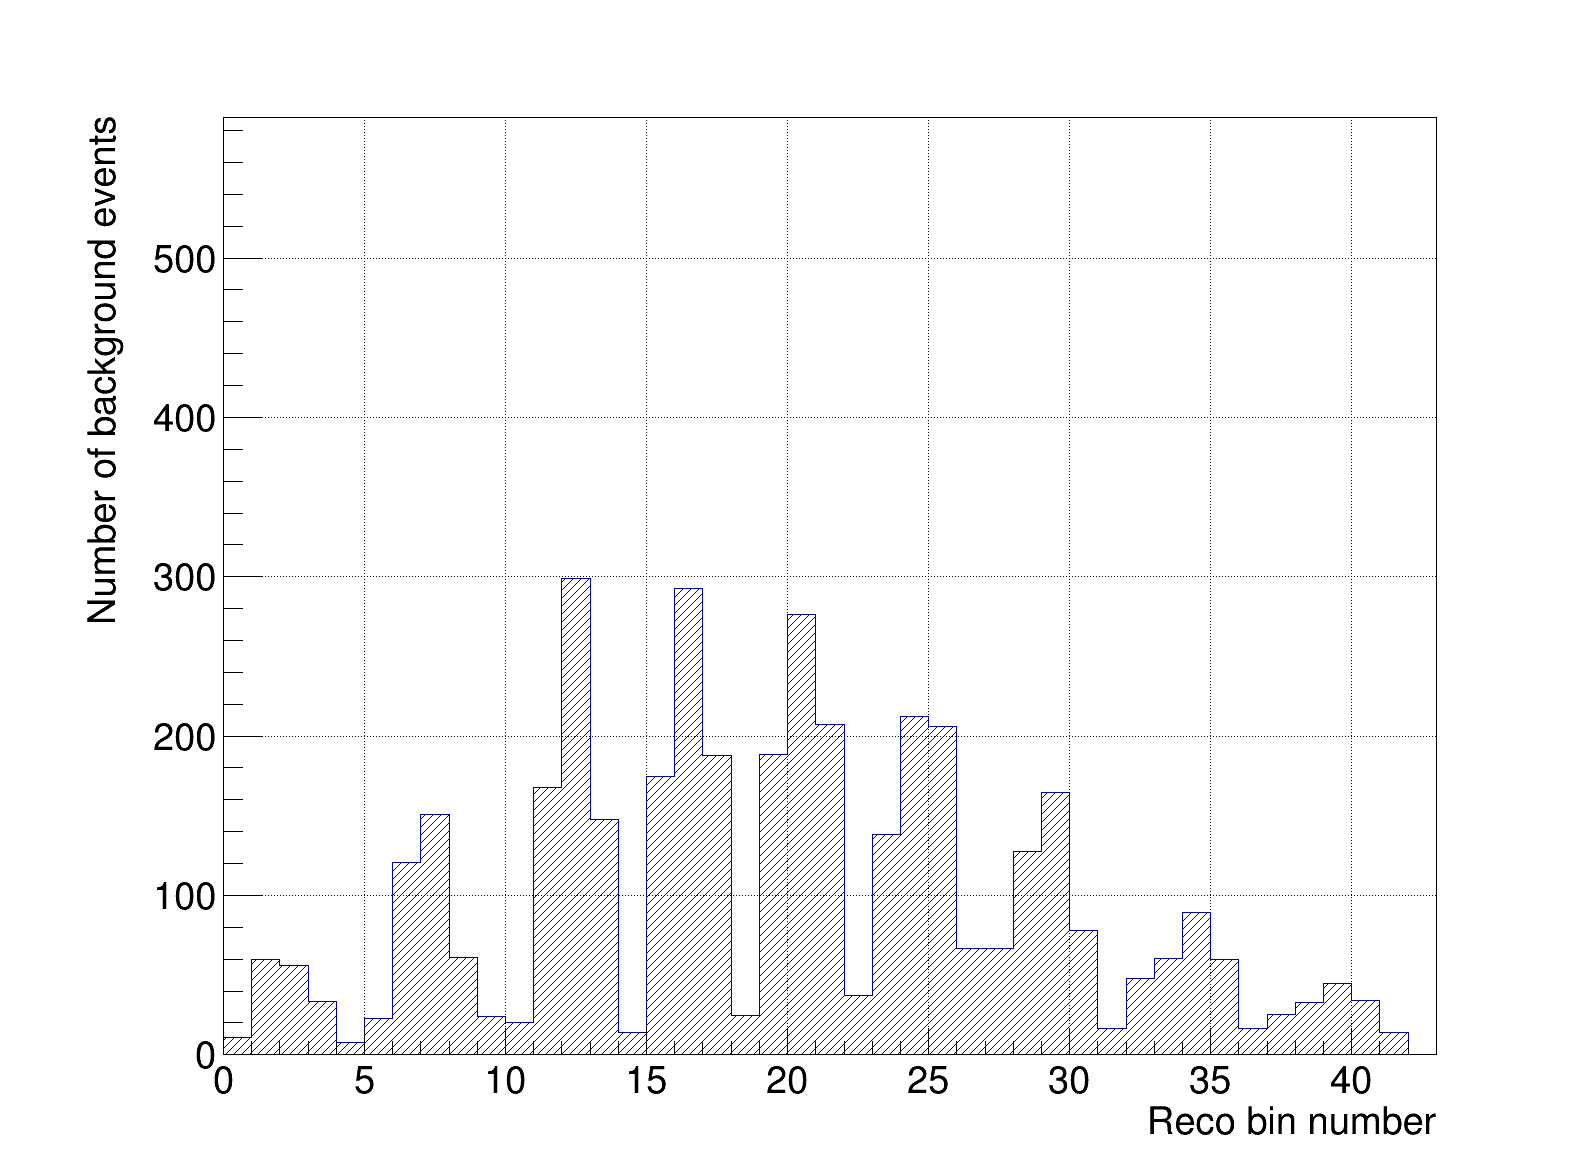

In [32]:
ROOT.gStyle.SetOptTitle(0)

c1 = plotBackgroundSamples(h_ext,h_dirt,h_bkg)

In [33]:
def eventrate_channel(h_data_func, h_ext_func,h_dirt_func,h_bkg_func,h_rate_qe,h_rate_res,h_rate_mec,h_rate_dis):
    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.1)
    c1.SetBottomMargin(0.1)

    hs = ROOT.THStack("hs","");
    h_ext_func.SetFillColor(ROOT.kBlue+2)
    h_ext_func.SetLineColor(ROOT.kBlue+2)
    h_ext_func.SetFillStyle(3004)
    h_dirt_func.SetFillColor(ROOT.kOrange+2);
    h_dirt_func.SetLineColor(ROOT.kOrange+2);
    h_bkg_func.SetFillColor(ROOT.kGray)
    h_bkg_func.SetLineColor(ROOT.kGray)
    
    h_rate_qe.SetFillColor(ROOT.kBlue+1)
    h_rate_res.SetFillColor(ROOT.kRed+1)
    h_rate_mec.SetFillColor(ROOT.kOrange-3)
    h_rate_dis.SetFillColor(ROOT.kGreen+2)
    
    h_rate_qe.SetLineWidth(0)
    h_rate_res.SetLineWidth(0)
    h_rate_mec.SetLineWidth(0)
    h_rate_dis.SetLineWidth(0)
    
    h_data_func.SetLineColor(ROOT.kBlack)
    h_data_func.SetLineWidth(2)
    
    hs.Add(h_ext_func)
    hs.Add(h_dirt_func)
    hs.Add(h_bkg_func)
    hs.Add(h_rate_dis)
    hs.Add(h_rate_res)
    hs.Add(h_rate_mec)
    hs.Add(h_rate_qe)

    legend = ROOT.TLegend(0.15,0.65,0.55,0.9)
    legend.SetNColumns(2)

    legend.AddEntry(h_data_func,'Data + stat.',"lep");
    legend.AddEntry(h_rate_qe,'QE',"f");
    legend.AddEntry(h_rate_res,'RES',"f");
    legend.AddEntry(h_rate_mec,'MEC',"f");
    legend.AddEntry(h_rate_dis,'DIS',"f");
    legend.AddEntry(h_bkg_func,'Beam Bkgd',"f")
    legend.AddEntry(h_dirt_func,'Dirt',"f")
    legend.AddEntry(h_ext_func,'Data (Beam-off)',"f")
    h_ext_func.SetXTitle("Reco bin number")
    h_ext_func.SetYTitle("# events")
    h_ext_func.SetMaximum(hs.GetMaximum()*1.2)
    h_ext_func.Draw('hist')
    hs.Draw('hist same')
    h_data_func.Draw('E1 same')
    legend.Draw()
    
    prelim, pot_tex = FF.draw_adding()
    prelim.Draw()
    pot_tex.Draw()
    
    
    c1.Draw()
    c1.SaveAs(outputdir_png + 'signal_channel_sample'+".png")
    c1.SaveAs(outputdir_root + 'signal_channel_sample'+".root")
    c1.SaveAs(outputdir_pdf + 'signal_channel_sample'+".pdf")
    
    return c1



Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/signal_channel_sample.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/signal_channel_sample.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/signal_channel_sample.pdf has been created


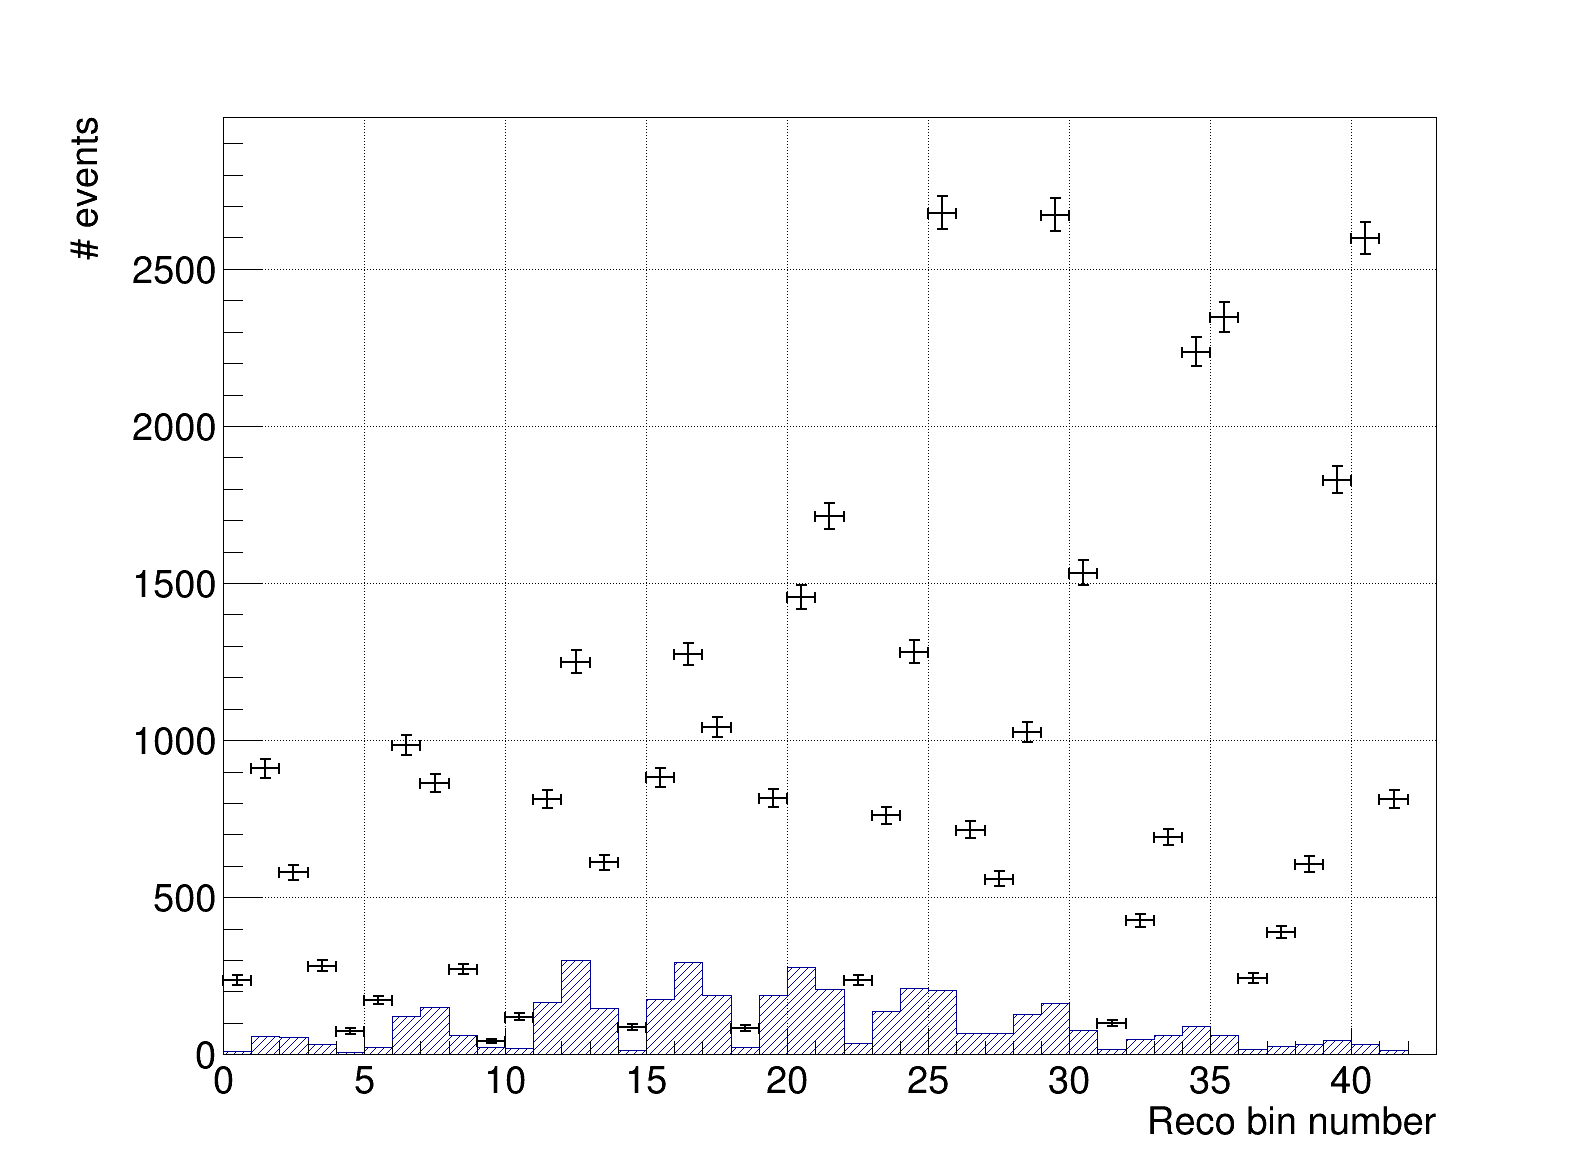

In [34]:
c1 = eventrate_channel(h_data, h_ext,h_dirt,h_bkg,h_rate_qe,h_rate_res,h_rate_mec,h_rate_dis)

In [35]:
def eventrate_channel8(h_data_func, h_ext_func,h_dirt_func,h_bkg_func,h_rate_qe,h_rate_res,h_rate_mec,h_rate_dis):
    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.1)
    c1.SetBottomMargin(0.14)

    bin_counter = 0
    for x_theta in range(len_theta):
        h_temp = f_cv.Get('h_true['+str(x_theta)+']')
        h_data_ = h_temp.Clone()
        h_ext_ = h_temp.Clone()
        h_dirt_ = h_temp.Clone()
        h_bkg_ = h_temp.Clone()
        h_qe_ = h_temp.Clone()
        h_res_ = h_temp.Clone()
        h_mec_ = h_temp.Clone()
        h_dis_ = h_temp.Clone()
        
        for i in range(1,len_mom[x_theta]+1):
            h_data_.SetBinContent(i,h_data_func.GetBinContent(bin_counter+i))
            h_data_.SetBinError(i,h_data_func.GetBinError(bin_counter+i))
            
            h_ext_.SetBinContent(i,h_ext_func.GetBinContent(bin_counter+i))
            h_ext_.SetBinError(i,h_ext_func.GetBinError(bin_counter+i))
            
            h_dirt_.SetBinContent(i,h_dirt_func.GetBinContent(bin_counter+i))
            h_dirt_.SetBinError(i,h_dirt_func.GetBinError(bin_counter+i))
            
            h_bkg_.SetBinContent(i,h_bkg_func.GetBinContent(bin_counter+i))
            h_bkg_.SetBinError(i,h_bkg_func.GetBinError(bin_counter+i))
            
            h_qe_.SetBinContent(i,h_rate_qe.GetBinContent(bin_counter+i))
            h_qe_.SetBinError(i,h_rate_qe.GetBinError(bin_counter+i))
            
            h_res_.SetBinContent(i,h_rate_res.GetBinContent(bin_counter+i))
            h_res_.SetBinError(i,h_rate_res.GetBinError(bin_counter+i))
            
            h_mec_.SetBinContent(i,h_rate_mec.GetBinContent(bin_counter+i))
            h_mec_.SetBinError(i,h_rate_mec.GetBinError(bin_counter+i))
            
            h_dis_.SetBinContent(i,h_rate_dis.GetBinContent(bin_counter+i))
            h_dis_.SetBinError(i,h_rate_dis.GetBinError(bin_counter+i))
            
        h_ext_.SetFillColor(ROOT.kBlue+2)
        h_ext_.SetLineColor(ROOT.kBlue+2)
        h_ext_.SetFillStyle(3004)
        h_dirt_.SetFillColor(ROOT.kOrange+2);
        h_dirt_.SetLineColor(ROOT.kOrange+2);
        h_bkg_.SetFillColor(ROOT.kGray)
        h_bkg_.SetLineColor(ROOT.kGray)

        h_qe_.SetFillColor(ROOT.kBlue+1)
        h_res_.SetFillColor(ROOT.kRed+1)
        h_mec_.SetFillColor(ROOT.kOrange-3)
        h_dis_.SetFillColor(ROOT.kGreen+2)

        h_qe_.SetLineWidth(0)
        h_res_.SetLineWidth(0)
        h_mec_.SetLineWidth(0)
        h_dis_.SetLineWidth(0)

        h_data_.SetLineColor(ROOT.kBlack)
        h_data_.SetLineWidth(2)
                    
        bin_counter+=len_mom[x_theta]
        
        hs = ROOT.THStack("hs","");
        hs.Add(h_ext_)
        hs.Add(h_dirt_)
        hs.Add(h_bkg_)
        hs.Add(h_dis_)
        hs.Add(h_res_)
        hs.Add(h_mec_)
        hs.Add(h_qe_)

        legend = ROOT.TLegend(0.55,0.65,0.9,0.9)
        legend.SetNColumns(2)

        legend.AddEntry(h_data_func,'Data + stat.',"lep");
        legend.AddEntry(h_rate_qe,'QE',"f");
        legend.AddEntry(h_rate_res,'RES',"f");
        legend.AddEntry(h_rate_mec,'MEC',"f");
        legend.AddEntry(h_rate_dis,'DIS',"f");
        legend.AddEntry(h_bkg_func,'Beam Bkgd',"f")
        legend.AddEntry(h_dirt_func,'Dirt',"f")
        legend.AddEntry(h_ext_func,'Data (Beam-off)',"f")

        h_ext_.SetTitle(str(theta_bins[x_theta])+'< cos(#theta^{reco}_{#mu}) <'+str(theta_bins[x_theta+1]))
        h_ext_.SetXTitle("p^{reco}_{#mu} [GeV]")
        h_ext_.SetYTitle("# events")
        h_ext_.SetMaximum(h_data_.GetMaximum()*1.2)
        h_ext_.Draw('hist')
        hs.Draw('hist same')
        h_data_.Draw('E1 same')
        legend.Draw()

        #prelim, pot_tex = FF.draw_adding()
        #prelim.Draw()
        #pot_tex.Draw()


        c1.Draw()
        c1.SaveAs(outputdir_png + 'signal_channel_sample _bin'+str(x_theta)+".png")
        #c1.SaveAs(outputdir_root + 'signal_channel_sample _bin'+str(x_theta)+".root")
        c1.SaveAs(outputdir_pdf + 'signal_channel_sample _bin'+str(x_theta)+".pdf")

        #ROOT.gStyle.SetOptTitle(0)

    return c1



Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/signal_channel_sample _bin0.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/signal_channel_sample _bin0.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/signal_channel_sample _bin1.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/signal_channel_sample _bin1.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/signal_channel_sample _bin2.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_

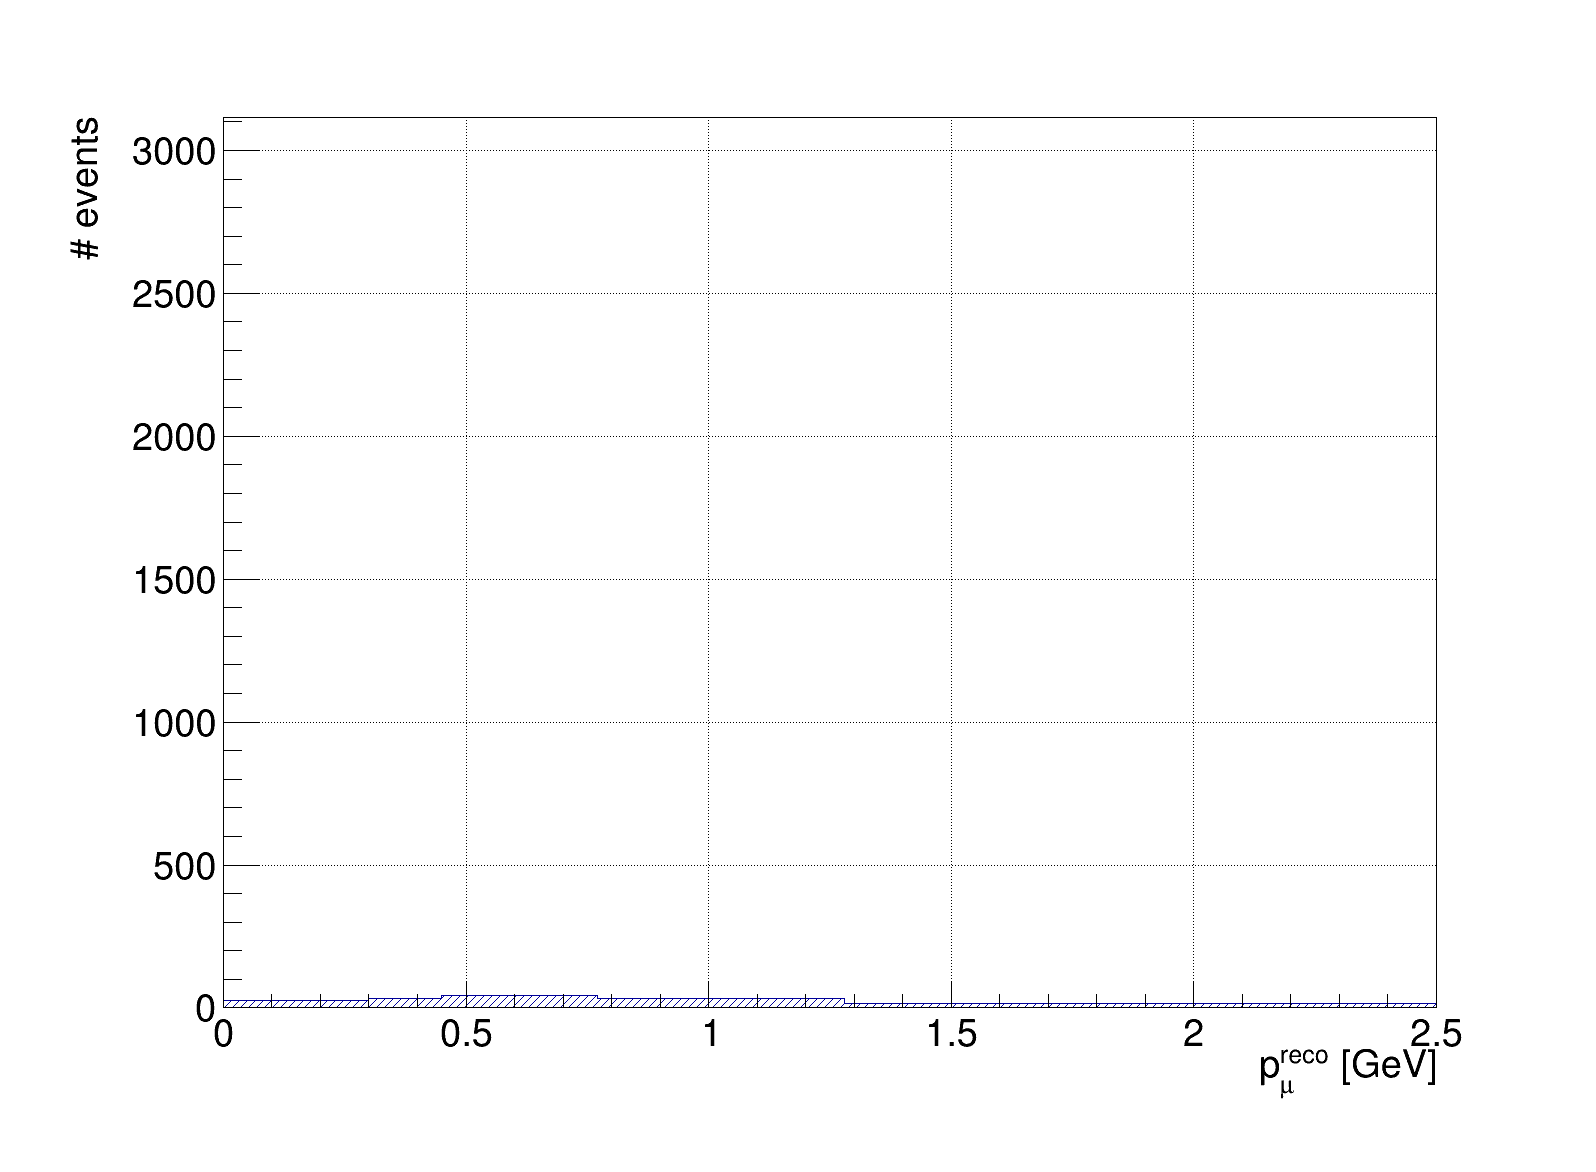

In [36]:
ROOT.gStyle.SetOptTitle(1)
c1 = eventrate_channel8(h_data, h_ext,h_dirt,h_bkg,h_rate_qe,h_rate_res,h_rate_mec,h_rate_dis)
ROOT.gStyle.SetOptTitle(0)


In [37]:
def eventrate_sample8(h_data_func, h_ext_func,h_dirt_func,h_bkg_func,h_true_func):
    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.1)
    c1.SetBottomMargin(0.14)
    
    h_reco_func = smear_plot(h_true_func)
    
    bin_counter = 0
    for x_theta in range(len_theta):
        h_temp = f_cv.Get('h_true['+str(x_theta)+']')
        h_data_ = h_temp.Clone()
        h_ext_ = h_temp.Clone()
        h_dirt_ = h_temp.Clone()
        h_bkg_ = h_temp.Clone()
        h_sig_ = h_temp.Clone()
        
        for i in range(1,len_mom[x_theta]+1):
            h_data_.SetBinContent(i,h_data_func.GetBinContent(bin_counter+i))
            h_data_.SetBinError(i,h_data_func.GetBinError(bin_counter+i))
            
            h_ext_.SetBinContent(i,h_ext_func.GetBinContent(bin_counter+i))
            h_ext_.SetBinError(i,h_ext_func.GetBinError(bin_counter+i))
            
            h_dirt_.SetBinContent(i,h_dirt_func.GetBinContent(bin_counter+i))
            h_dirt_.SetBinError(i,h_dirt_func.GetBinError(bin_counter+i))
            
            h_bkg_.SetBinContent(i,h_bkg_func.GetBinContent(bin_counter+i))
            h_bkg_.SetBinError(i,h_bkg_func.GetBinError(bin_counter+i))
            
            h_sig_.SetBinContent(i,h_reco_func.GetBinContent(bin_counter+i))
            h_sig_.SetBinError(i,h_reco_func.GetBinError(bin_counter+i))
            
        h_ext_.SetFillColor(ROOT.kBlue+2)
        h_ext_.SetLineColor(ROOT.kBlue+2)
        h_ext_.SetFillStyle(3004)
        h_dirt_.SetFillColor(ROOT.kOrange+2);
        h_dirt_.SetLineColor(ROOT.kOrange+2);
        h_bkg_.SetFillColor(ROOT.kGray)
        h_bkg_.SetLineColor(ROOT.kGray)

        h_sig_.SetFillColor(ROOT.kRed)
        h_sig_.SetLineWidth(0)

        h_data_.SetLineColor(ROOT.kBlack)
        h_data_.SetLineWidth(2)
                    
        bin_counter+=len_mom[x_theta]
        
        hs = ROOT.THStack("hs","");
        hs.Add(h_ext_)
        hs.Add(h_dirt_)
        hs.Add(h_bkg_)
        hs.Add(h_sig_)


        legend = ROOT.TLegend(0.55,0.65,0.9,0.9)
        legend.SetNColumns(2)

        legend.AddEntry(h_data_func,'Data + stat.',"lep");
        legend.AddEntry(h_sig_,'Signal',"f");
        legend.AddEntry(h_bkg_func,'Beam Bkgd',"f")
        legend.AddEntry(h_dirt_func,'Dirt',"f")
        legend.AddEntry(h_ext_func,'Data (Beam-off)',"f")
        
        h_ext_.GetYaxis().SetTitleSize(0.05)
        h_ext_.GetYaxis().SetTitleOffset(0.0)
        h_ext_.GetYaxis().SetLabelSize(0.05)
        h_ext_.GetXaxis().SetTitleSize(0.05)
        h_ext_.GetXaxis().SetLabelSize(0.05)
        h_ext_.GetXaxis().SetTitleOffset(1)

        h_ext_.SetTitle(str(theta_bins[x_theta])+'< cos(#theta^{reco}_{#mu}) <'+str(theta_bins[x_theta+1]))
        h_ext_.SetXTitle("p^{reco}_{#mu} [GeV]")
        h_ext_.SetYTitle("# events")
        h_ext_.SetMaximum(h_data_.GetMaximum()*1.2)
        h_ext_.Draw('hist')
        hs.Draw('hist same')
        h_data_.Draw('E1 same')
        legend.Draw()

        #prelim, pot_tex = FF.draw_adding()
        #prelim.Draw()
        #pot_tex.Draw()


        c1.Draw()
        c1.SaveAs(outputdir_png + 'signal_sample _bin'+str(x_theta)+".png")
        #c1.SaveAs(outputdir_root + 'signal_sample _bin'+str(x_theta)+".root")
        c1.SaveAs(outputdir_pdf + 'signal_sample _bin'+str(x_theta)+".pdf")

    return c1



In [38]:
ROOT.gStyle.SetOptTitle(1)
c1 = eventrate_sample8(h_data, h_ext,h_dirt,h_bkg,h_this_true)
ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

[43. 43.]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/signal_sample _bin0.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/signal_sample _bin0.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/signal_sample _bin1.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/signal_sample _bin1.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/signal_sample _bin2.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/eve

In [39]:
def make8(h_this_func):
    h_this = h_this_func.Clone()
    hnew = []
    bin_counter = 0
    for t_bin in range(len_theta):
        h_temp = f_cv.Get('h_true['+str(t_bin)+']')
        hnew.append(h_temp.Clone())
        #hnew[t_bin].SetBins(len_mom[t_bin],array('f',mom_bins[t_bin]))
        hnew[t_bin].SetLineWidth(h_this.GetLineWidth())
        hnew[t_bin].SetLineColor(h_this.GetLineColor())
        hnew[t_bin].SetFillColor(h_this.GetFillColor())
        hnew[t_bin].SetFillStyle(h_this.GetFillStyle())
        for i in range(1,len_mom[t_bin]+1):
            hnew[t_bin].SetBinContent(i,h_this.GetBinContent(bin_counter+i))
            hnew[t_bin].SetBinError(i,h_this.GetBinError(bin_counter+i))                      
        bin_counter+=len_mom[t_bin]
        
    return hnew

In [40]:
def eventrate_comparison8(h_data_func,h_ext_func,h_dirt_func,h_bkg_func,h_true_func,this_frac_tot, filename,model_name):

    FF.main_plot(h_data_func)
    
    h_reco_func = smear_plot(h_true_func)

    #hs = ROOT.THStack("hs","");
    h_ext_func.SetFillColor(ROOT.kBlue+2)
    h_ext_func.SetLineColor(ROOT.kBlue+2)
    h_ext_func.SetFillStyle(3004)
    h_dirt_func.SetFillColor(ROOT.kOrange+2);
    h_dirt_func.SetLineColor(ROOT.kOrange+2);
    h_bkg_func.SetFillColor(ROOT.kGray)
    h_bkg_func.SetLineColor(ROOT.kGray)
    h_reco_func.SetFillColor(ROOT.kRed)
    h_reco_func.SetLineColor(ROOT.kRed)
    #hs.Add(h_ext_func)
    #hs.Add(h_dirt_func)
    #hs.Add(h_bkg_func)
    #hs.Add(h_reco_func)

    h_data_func.SetXTitle("Reco bin number")
    h_data_func.SetYTitle("Number of events")

    h_tot = h_reco_func.Clone()
    h_tot.Add(h_bkg_func)
    
    num_bins = 43 # get eventually better than hardcode
    
    h_tot.Add(h_ext_func)
    h_tot.Add(h_dirt_func)
    h_tot.SetFillColor(ROOT.kBlack)
    h_tot.SetLineColor(ROOT.kBlack)
    h_tot.SetFillStyle(3004)
    
    # calculate CHi2
    dat_vec = FF.plot2arr(h_data_func.Clone(),1)
    dat_vec = dat_vec[0:-1]
    tot_vec = FF.plot2arr(h_tot.Clone(),1)
    tot_vec = tot_vec[0:-1]
    covar = np.zeros((num_bins-1,num_bins-1))
    
    #get total covar:
    covar_data = np.zeros((num_bins-1,num_bins-1))
    for i in range(num_bins-1):
        for j in range(num_bins-1):
            covar[i][j] = this_frac_tot[i][j]*tot_vec[i]*tot_vec[j]
            
    for i in range(num_bins):
        h_tot.SetBinError(i+1,math.sqrt(this_frac_tot[i][i])*h_tot.GetBinContent(i+1))
 
    inv_covar = np.linalg.inv(covar)
    diff_vec = (dat_vec - tot_vec)
    chi2 = 0.0
    for i in range(42):
        for j in range(42):
            chi2 += diff_vec[i]*inv_covar[i][j]*diff_vec[j]
        
    print 'Chi2 = ',chi2
    
    h_data_ = make8(h_data_func)
    h_ext_ = make8(h_ext_func)
    h_dirt_ = make8(h_dirt_func)
    h_bkg_ = make8(h_bkg_func)
    h_reco_ = make8(h_reco_func)
    h_tot_ = make8(h_tot)
    hs = []
       
    bin_counter = 0
    for t_bin in range(len_theta):
        c1 = ROOT.TCanvas("c1","c1",1600,1200)
        c1.SetGrid(1)
        c1.SetLeftMargin(0.14)
        c1.SetRightMargin(0.1)
        c1.SetBottomMargin(0.1)

        c1.cd()

        pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
        pad1.SetGrid(1)
        pad1.Draw()
        pad1.cd()
        pad1.SetBottomMargin(0.03);
        pad1.SetTopMargin(0.1)

        hs.append(ROOT.THStack('hs['+str(t_bin)+']',""))
        hs[t_bin].Add(h_ext_[t_bin])
        hs[t_bin].Add(h_dirt_[t_bin])
        hs[t_bin].Add(h_bkg_[t_bin])
        hs[t_bin].Add(h_reco_[t_bin])
        
        h_data_[t_bin].SetMaximum(-1111)
        h_data_[t_bin].SetMinimum(0)
        h_data_[t_bin].SetMaximum(h_data_[t_bin].GetMaximum()*1.2)
        h_data_[t_bin].SetTitle(str(theta_bins[t_bin])+'< cos(#theta^{reco}_{#mu}) <'+str(theta_bins[t_bin+1]))
        h_data_[t_bin].SetXTitle("p^{reco}_{#mu} [GeV]")
        h_data_[t_bin].SetYTitle("# events")
        h_data_[t_bin].Draw('E1')
        #print h_data_[t_bin].GetBinContent(1)

        hs[t_bin].Draw('same hist')
        h_tot_[t_bin].Draw('same E2')

        legend = ROOT.TLegend(0.55,0.45,0.9,0.9)
        legend.AddEntry(h_data_[t_bin],'Data + stat.',"lep");
        legend.AddEntry(h_tot_[t_bin],model_name+' + bkg: #chi^{2}:'+'{:04.1f}'.format(chi2),"f");
        legend.AddEntry(h_reco_[t_bin],'#nu_{#mu} signal',"f");
        legend.AddEntry(h_bkg_[t_bin],'#nu background',"f");
        legend.AddEntry(h_dirt_[t_bin],'Dirt',"f");
        legend.AddEntry(h_ext_[t_bin],'Cosmic (off-beam)',"f");
        if(t_bin == 0):
            legend.Draw()

        h_data_[t_bin].Draw('E1 same')

        #prelim, pot_tex = FF.draw_adding()
        #prelim.Draw()
        #pot_tex.Draw()

        h_data_[t_bin].GetYaxis().SetTitleOffset(0.7);
        h_data_[t_bin].GetYaxis().SetTitleSize(0.07);
        h_data_[t_bin].GetXaxis().SetLabelOffset(999);
        h_data_[t_bin].GetXaxis().SetTitleOffset(999);
        h_data_[t_bin].GetXaxis().SetLabelSize(0);
        h_data_[t_bin].GetYaxis().SetLabelSize(0.05);
        h_data_[t_bin].GetXaxis().SetTitleSize(0);

        c1.cd()
        h_data_[t_bin].GetXaxis().SetLabelOffset(0);
        h_data_[t_bin].GetXaxis().SetTitleOffset(0);

        pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
        pad2.SetGrid(1)
        pad2.SetTopMargin(0.04)
        pad2.SetBottomMargin(0.4)
        pad2.Draw()
        pad2.cd()
        h_tot_noerr = h_tot_[t_bin].Clone()
        for i in range(len_mom[t_bin]):
            h_tot_noerr.SetBinError(i+1,0)
        h_xsec_data_ratio = h_data_[t_bin].Clone()
        h_xsec_data_ratio.Divide(h_tot_noerr)
        h_mc_ratio = h_tot_[t_bin].Clone()
        h_mc_ratio.Divide(h_tot_noerr)

        h_xsec_data_ratio.SetYTitle('Data/(Ext+MC)')
        h_xsec_data_ratio.GetYaxis().SetTitleSize(0.1)
        h_xsec_data_ratio.GetYaxis().SetTitleOffset(0.3)
        h_xsec_data_ratio.GetYaxis().SetLabelSize(0.07)
        h_xsec_data_ratio.GetXaxis().SetTitleSize(0.15)
        h_xsec_data_ratio.GetXaxis().SetLabelSize(0.15)
        h_xsec_data_ratio.GetXaxis().SetTitleOffset(1)
        h_xsec_data_ratio.SetMaximum(1.7)
        h_xsec_data_ratio.SetMinimum(0.3)
        h_xsec_data_ratio.SetTitle('')
        h_xsec_data_ratio.Draw('E1')
        h_mc_ratio.Draw('E2 same')

        c1.Draw()
        c1.SaveAs(outputdir_png + filename+'_'+str(t_bin)+".png")
        #c1.SaveAs(outputdir_root + filename+'_'+str(t_bin)+".root")
        c1.SaveAs(outputdir_pdf + filename+'_'+str(t_bin)+".pdf")

    return c1


In [41]:
ROOT.gStyle.SetOptTitle(1)
c1 = eventrate_comparison8(h_data,h_ext,h_dirt,h_bkg,h_true_g3_tune,frac_tot, 'event_rate_G3_tune','G3 uB tune')
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

[43. 43.]
Chi2 =  384.87610855155066


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/event_rate_G3_tune_0.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/event_rate_G3_tune_0.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/event_rate_G3_tune_1.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/event_rate_G3_tune_1.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/ev

In [42]:
def eventrate_comparison_pub8(h_data_func,h_ext_func,h_dirt_func,h_numu_nomuon_func, h_numu_nue_func,\
                              h_numu_antinu_func,h_numu_nc_func, h_numu_ov_func,h_numu_cosmic_func,\
                              h_true_func,this_frac_tot, filename,model_name):

    FF.main_plot(h_data_func)
    
    h_reco_func = smear_plot(h_true_func)

    #hs = ROOT.THStack("hs","");
    h_ext_func.SetFillColor(ROOT.kBlue+2)
    h_ext_func.SetLineColor(ROOT.kBlue+2)
    h_ext_func.SetFillStyle(3004)
    h_dirt_func.SetFillColor(ROOT.kOrange+2);
    h_dirt_func.SetLineColor(ROOT.kOrange+2);
    
    h_overlay_func = {} # make an array of histograms for the different interactions
    overlay_signals = ['numu_nomuon','numu_nue','numu_antinu','numu_nc','numu_ov','numu_cosmic']
    overlay_signals_name = ['#nu_{#mu} CC (not #mu)','#nu_{e}, #bar{#nu_{e}} CC','#bar{#nu_{#mu}} CC','NC', 'OUTFV', 'Cosmic']
    
    #overlay_signals = ['numu_ov','numu_nomuon','numu_nue','numu_antinu','numu_nc','numu_cosmic',]
    #overlay_signals_name = ['#nu_{#mu} CC (not #mu)','#nu_{e}, #bar{#nu_{e}} CC','#bar{#nu_{#mu}} CC','NC', 'OUTFV', 'Cosmic']
    
    h_overlay_func['numu_nomuon'] = h_numu_nomuon_func
    h_overlay_func['numu_nue'] = h_numu_nue_func
    h_overlay_func['numu_antinu'] = h_numu_antinu_func
    h_overlay_func['numu_nc'] = h_numu_nc_func
    h_overlay_func['numu_cosmic'] = h_numu_cosmic_func
    h_overlay_func['numu_ov'] = h_numu_ov_func
    
    h_overlay_func['numu_nomuon'].SetFillColor(ROOT.kRed+2)
    h_overlay_func['numu_nomuon'].SetLineColor(ROOT.kRed+2)
    h_overlay_func['numu_nue'].SetFillColor(ROOT.kMagenta+1)
    h_overlay_func['numu_nue'].SetLineColor(ROOT.kMagenta+1)
    h_overlay_func['numu_antinu'].SetFillColor(ROOT.kOrange-3)
    h_overlay_func['numu_antinu'].SetLineColor(ROOT.kOrange-3)
    h_overlay_func['numu_nc'].SetFillColor(ROOT.kGray)
    h_overlay_func['numu_nc'].SetLineColor(ROOT.kGray)
    h_overlay_func['numu_cosmic'].SetFillColor(ROOT.kBlue)
    h_overlay_func['numu_cosmic'].SetLineColor(ROOT.kBlue)
    h_overlay_func['numu_ov'].SetFillColor(ROOT.kGreen+2)
    h_overlay_func['numu_ov'].SetLineColor(ROOT.kGreen+2)

    h_reco_func.SetFillColor(ROOT.kRed)
    h_reco_func.SetLineColor(ROOT.kRed)
    #hs.Add(h_ext_func)
    #hs.Add(h_dirt_func)
    #hs.Add(h_bkg_func)
    #hs.Add(h_reco_func)

    h_data_func.SetXTitle("Reco bin number")
    h_data_func.SetYTitle("Number of events")

    h_tot = h_reco_func.Clone()
    for i, x in enumerate(h_overlay_func):
        h_tot.Add(h_overlay_func[overlay_signals[i]])
    
    num_bins = 43 # get eventually better than hardcode
    
    h_tot.Add(h_ext_func)
    h_tot.Add(h_dirt_func)
    h_tot.SetFillColor(ROOT.kBlack)
    h_tot.SetLineColor(ROOT.kBlack)
    h_tot.SetFillStyle(3004)
    
    # calculate CHi2
    dat_vec = FF.plot2arr(h_data_func.Clone(),1)
    dat_vec = dat_vec[0:-1]
    tot_vec = FF.plot2arr(h_tot.Clone(),1)
    tot_vec = tot_vec[0:-1]
    covar = np.zeros((num_bins-1,num_bins-1))
    
    #get total covar:
    covar_data = np.zeros((num_bins-1,num_bins-1))
    for i in range(num_bins-1):
        for j in range(num_bins-1):
            covar[i][j] = this_frac_tot[i][j]*tot_vec[i]*tot_vec[j]
            
    for i in range(num_bins):
        h_tot.SetBinError(i+1,math.sqrt(this_frac_tot[i][i])*h_tot.GetBinContent(i+1))
 
    inv_covar = np.linalg.inv(covar)
    diff_vec = (dat_vec - tot_vec)
    chi2 = 0.0
    for i in range(42):
        for j in range(42):
            chi2 += diff_vec[i]*inv_covar[i][j]*diff_vec[j]
        
    print 'Chi2 = ',chi2
    
    h_data_ = make8(h_data_func)
    h_ext_ = make8(h_ext_func)
    h_dirt_ = make8(h_dirt_func)
    h_bkg_ = {}
    
    for i, x in enumerate(h_overlay_func):
        h_bkg_[overlay_signals[-i]]=make8(h_overlay_func[overlay_signals[-i]])
    #h_bkg_ = make8(h_bkg_func)
    h_reco_ = make8(h_reco_func)
    h_tot_ = make8(h_tot)
    hs = []
       
    bin_counter = 0
    for t_bin in range(len_theta):
        c1 = ROOT.TCanvas("c1","c1",1600,1200)
        c1.SetGrid(1)
        c1.SetLeftMargin(0.14)
        c1.SetRightMargin(0.1)
        c1.SetBottomMargin(0.1)

        c1.cd()

        pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
        pad1.SetGrid(1)
        pad1.Draw()
        pad1.cd()
        pad1.SetBottomMargin(0.03);
        pad1.SetTopMargin(0.1)

        hs.append(ROOT.THStack('hs['+str(t_bin)+']',""))
        hs[t_bin].Add(h_ext_[t_bin])
        hs[t_bin].Add(h_dirt_[t_bin])
        
        for i,x in enumerate(overlay_signals):
            hs[t_bin].Add(h_bkg_[overlay_signals[-i-1]][t_bin])
            if t_bin == 0:
                print x, t_bin, h_bkg_[x][t_bin].GetBinContent(1)
        #hs[t_bin].Add(h_bkg_[t_bin])
        hs[t_bin].Add(h_reco_[t_bin])
        
        h_data_[t_bin].SetMaximum(-1111)
        h_data_[t_bin].SetMinimum(0)
        h_data_[t_bin].SetMaximum(h_data_[t_bin].GetMaximum()*1.2)
        h_data_[t_bin].SetTitle(str(theta_bins[t_bin])+'< cos(#theta^{reco}_{#mu}) <'+str(theta_bins[t_bin+1]))
        h_data_[t_bin].SetXTitle("p^{reco}_{#mu} [GeV]")
        h_data_[t_bin].SetYTitle("# events")
        h_data_[t_bin].Draw('E1')
        #print h_data_[t_bin].GetBinContent(1)

        hs[t_bin].Draw('same hist')
        h_tot_[t_bin].Draw('same E2')

        legend = ROOT.TLegend(0.55,0.15,0.9,0.9)
        legend.AddEntry(h_data_[t_bin],'Data + stat.',"lep");
        legend.AddEntry(h_tot_[t_bin],model_name+' + bkg: #chi^{2}:'+'{:04.1f}'.format(chi2),"f");
        legend.AddEntry(h_reco_[t_bin],'#nu_{#mu} CC (signal)',"f");
        for i,x in enumerate(overlay_signals):
            legend.AddEntry(h_bkg_[x][t_bin],overlay_signals_name[i],"f");
        #legend.AddEntry(h_bkg_[t_bin],'#nu background',"f");
        legend.AddEntry(h_dirt_[t_bin],'Dirt',"f");
        legend.AddEntry(h_ext_[t_bin],'Cosmic (off-beam)',"f");
        if(t_bin == 0):
            legend.Draw()

        h_data_[t_bin].Draw('E1 same')

        #prelim, pot_tex = FF.draw_adding()
        #prelim.Draw()
        #pot_tex.Draw()

        h_data_[t_bin].GetYaxis().SetTitleOffset(0.7);
        h_data_[t_bin].GetYaxis().SetTitleSize(0.07);
        h_data_[t_bin].GetXaxis().SetLabelOffset(999);
        h_data_[t_bin].GetXaxis().SetTitleOffset(999);
        h_data_[t_bin].GetXaxis().SetLabelSize(0);
        h_data_[t_bin].GetYaxis().SetLabelSize(0.05);
        h_data_[t_bin].GetXaxis().SetTitleSize(0);

        c1.cd()
        h_data_[t_bin].GetXaxis().SetLabelOffset(0);
        h_data_[t_bin].GetXaxis().SetTitleOffset(0);

        pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
        pad2.SetGrid(1)
        pad2.SetTopMargin(0.04)
        pad2.SetBottomMargin(0.4)
        pad2.Draw()
        pad2.cd()
        h_tot_noerr = h_tot_[t_bin].Clone()
        for i in range(len_mom[t_bin]):
            h_tot_noerr.SetBinError(i+1,0)
        h_xsec_data_ratio = h_data_[t_bin].Clone()
        h_xsec_data_ratio.Divide(h_tot_noerr)
        h_mc_ratio = h_tot_[t_bin].Clone()
        h_mc_ratio.Divide(h_tot_noerr)

        h_xsec_data_ratio.SetYTitle('Data/(Ext+MC)')
        h_xsec_data_ratio.GetYaxis().SetTitleSize(0.1)
        h_xsec_data_ratio.GetYaxis().SetTitleOffset(0.3)
        h_xsec_data_ratio.GetYaxis().SetLabelSize(0.07)
        h_xsec_data_ratio.GetXaxis().SetTitleSize(0.15)
        h_xsec_data_ratio.GetXaxis().SetLabelSize(0.15)
        h_xsec_data_ratio.GetXaxis().SetTitleOffset(1)
        h_xsec_data_ratio.SetMaximum(1.7)
        h_xsec_data_ratio.SetMinimum(0.3)
        h_xsec_data_ratio.SetTitle('')
        h_xsec_data_ratio.Draw('E1')
        h_mc_ratio.Draw('E2 same')

        c1.Draw()
        c1.SaveAs(outputdir_png + filename+'_'+str(t_bin)+".png")
        #c1.SaveAs(outputdir_root + filename+'_'+str(t_bin)+".root")
        c1.SaveAs(outputdir_pdf + filename+'_'+str(t_bin)+".pdf")

    return c1


In [43]:
ROOT.gStyle.SetOptTitle(1)
c1 = eventrate_comparison_pub8(h_data,h_ext,h_dirt,h_no_moun, h_nue,\
                              h_antinu,h_nc, h_ov,h_cosmic,\
                                h_true_g3_tune,frac_tot, 'event_rate_G3_tune_pub','G3 uB tune')
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

[43. 43.]
Chi2 =  384.8761641554556
numu_nomuon 0 20.8143215179
numu_nue 0 1.07176828384
numu_antinu 0 0.166161492467
numu_nc 0 36.8571510315
numu_ov 0 18.2705917358
numu_cosmic 0 36.1338233948


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/event_rate_G3_tune_pub_0.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/event_rate_G3_tune_pub_0.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/event_rate_G3_tune_pub_1.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/event_rate_G3_tune_pub_1.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_ra

In [44]:
pot = 2.144e+20

# genie tune:
frac_det_GuB = np.load(outputdir+'Genie_tune/frac_det.npy')
frac_other_GuB = np.load(outputdir+'Genie_tune/frac_other.npy')
frac_all_GuB = np.load(outputdir+'Genie_tune/frac_all.npy')
frac_flux_GuB = np.load(outputdir+'Genie_tune/frac_flux.npy')
frac_crt_GuB = np.load(outputdir+'Genie_tune/frac_crt.npy')
frac_dirt_GuB = np.load(outputdir+'Genie_tune/frac_dirt.npy')
frac_stat_GuB = np.load(outputdir+'Genie_tune/frac_stat.npy')
#frac_tot_GuB = frac_det_GuB+frac_other_GuB+frac_all_GuB+frac_flux_GuB+frac_crt_GuB+frac_dirt_GuB+frac_stat_GuB
#np.save(outputdir+'Genie_tune/frac_tot',frac_tot_GuB)
frac_tot_GuB = np.load(outputdir+'Genie_tune/frac_tot.npy')


h_pred_GuB = h_true_g3_tune.Clone()
h_pred_GuB = smear_plot(h_pred_GuB)
h_pred_GuB.Add(h_bkg)
h_pred_GuB.Add(h_dirt)
h_pred_GuB.Add(h_ext)


# genie v3:
frac_det_G3 = np.load(outputdir+'Genie_V3/frac_det.npy')
frac_other_G3 = np.load(outputdir+'Genie_V3/frac_other.npy')
frac_all_G3 = np.load(outputdir+'Genie_V3/frac_all.npy')
frac_flux_G3 = np.load(outputdir+'Genie_V3/frac_flux.npy')
frac_crt_G3 = np.load(outputdir+'Genie_V3/frac_crt.npy')
frac_dirt_G3 = np.load(outputdir+'Genie_V3/frac_dirt.npy')
frac_stat_G3 = np.load(outputdir+'Genie_V3/frac_stat.npy')
#frac_tot_G3 = frac_det_G3+frac_other_G3+frac_all_G3+frac_flux_G3+frac_crt_G3+frac_dirt_G3+frac_stat_G3
#np.save(outputdir+'Genie_V3/frac_tot',frac_tot_G3)
frac_tot_G3 = np.load(outputdir+'Genie_V3/frac_tot.npy')


h_pred_G3 = h_rate_g3.Clone()
h_pred_G3 = smear_plot(h_pred_G3)
h_pred_G3.Add(h_bkg)
h_pred_G3.Add(h_dirt)
h_pred_G3.Add(h_ext)


# genie v2:
frac_det_G2 = np.load(outputdir+'Genie_V2/frac_det.npy')
frac_other_G2 = np.load(outputdir+'Genie_V2/frac_other.npy')
frac_all_G2 = np.load(outputdir+'Genie_V2/frac_all.npy')
frac_flux_G2 = np.load(outputdir+'Genie_V2/frac_flux.npy')
frac_crt_G2 = np.load(outputdir+'Genie_V2/frac_crt.npy')
frac_dirt_G2 = np.load(outputdir+'Genie_V2/frac_dirt.npy')
frac_stat_G2 = np.load(outputdir+'Genie_V2/frac_stat.npy')
#frac_tot_G2 = frac_det_G2+frac_other_G2+frac_all_G2+frac_flux_G2+frac_crt_G2+frac_dirt_G2+frac_stat_G2
#np.save(outputdir+'Genie_V2/frac_tot',frac_tot_G2)
frac_tot_G2 = np.load(outputdir+'Genie_V2/frac_tot.npy')


h_pred_G2 = h_rate_g2.Clone()
h_pred_G2 = smear_plot(h_pred_G2)
h_pred_G2.Add(h_bkg)
h_pred_G2.Add(h_dirt)
h_pred_G2.Add(h_ext)

# genie GiBuu:
frac_det_GiBuu = np.load(outputdir+'Gibuu/frac_det.npy')
frac_other_GiBuu = np.load(outputdir+'Gibuu/frac_other.npy')
frac_all_GiBuu = np.load(outputdir+'Gibuu/frac_all.npy')
frac_flux_GiBuu = np.load(outputdir+'Gibuu/frac_flux.npy')
frac_crt_GiBuu = np.load(outputdir+'Gibuu/frac_crt.npy')
frac_dirt_GiBuu = np.load(outputdir+'Gibuu/frac_dirt.npy')
frac_stat_GiBuu = np.load(outputdir+'Gibuu/frac_stat.npy')
#frac_tot_GiBuu = frac_det_GiBuu+frac_other_GiBuu+frac_all_GiBuu+frac_flux_GiBuu+frac_crt_GiBuu+frac_dirt_GiBuu+frac_stat_GiBuu
#np.save(outputdir+'Genie_GiBUU/frac_tot',frac_tot_GiBuu)
frac_tot_GiBuu = np.load(outputdir+'Gibuu/frac_tot.npy')

h_pred_GiBuu = h_rate_gibuu.Clone()
h_pred_GiBuu = smear_plot(h_pred_GiBuu)
h_pred_GiBuu.Add(h_bkg)
h_pred_GiBuu.Add(h_dirt)
h_pred_GiBuu.Add(h_ext)

# genie Neut:
frac_det_Neut = np.load(outputdir+'Neut/frac_det.npy')
frac_other_Neut = np.load(outputdir+'Neut/frac_other.npy')
frac_all_Neut = np.load(outputdir+'Neut/frac_all.npy')
frac_flux_Neut = np.load(outputdir+'Neut/frac_flux.npy')
frac_crt_Neut = np.load(outputdir+'Neut/frac_crt.npy')
frac_dirt_Neut = np.load(outputdir+'Neut/frac_dirt.npy')
frac_stat_Neut = np.load(outputdir+'Neut/frac_stat.npy')
#frac_tot_Neut = frac_det_Neut+frac_other_Neut+frac_all_Neut+frac_flux_Neut+frac_crt_Neut+frac_dirt_Neut+frac_stat_Neut
#np.save(outputdir+'Genie_Neut/frac_tot',frac_tot_Neut)
frac_tot_Neut = np.load(outputdir+'Neut/frac_tot.npy')


h_pred_neut = h_rate_neut.Clone()
h_pred_neut = smear_plot(h_pred_neut)
h_pred_neut.Add(h_bkg)
h_pred_neut.Add(h_dirt)
h_pred_neut.Add(h_ext)

# genie NuWro:
frac_det_NuWro = np.load(outputdir+'Nuwro/frac_det.npy')
frac_other_NuWro = np.load(outputdir+'Nuwro/frac_other.npy')
frac_all_NuWro = np.load(outputdir+'Nuwro/frac_all.npy')
frac_flux_NuWro = np.load(outputdir+'Nuwro/frac_flux.npy')
frac_crt_NuWro = np.load(outputdir+'Nuwro/frac_crt.npy')
frac_dirt_NuWro = np.load(outputdir+'Nuwro/frac_dirt.npy')
frac_stat_NuWro = np.load(outputdir+'Nuwro/frac_stat.npy')
#frac_tot_NuWro = frac_det_NuWro+frac_other_NuWro+frac_all_NuWro+frac_flux_NuWro+frac_crt_NuWro+frac_dirt_NuWro+frac_stat_NuWro
#np.save(outputdir+'Genie_NuWro/frac_tot',frac_tot_NuWro)
frac_tot_NuWro = np.load(outputdir+'Nuwro/frac_tot.npy')


h_pred_nuwro = h_rate_nuwro.Clone()
h_pred_nuwro = smear_plot(h_pred_nuwro)
h_pred_nuwro.Add(h_bkg)
h_pred_nuwro.Add(h_dirt)
h_pred_nuwro.Add(h_ext)



[43. 43.]
[43. 43.]
[43. 43.]
[43. 43.]
[43. 43.]
[43. 43.]


True

Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).


In [45]:

'''eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_this_true,frac_tot, 'event_rate_this_tune','this model')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_true_g3_tune,frac_tot_GuB, 'event_rate_G3_tune','G3 uB tune')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_g3,frac_tot_G3, 'event_rate_G3','G3')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_g2,frac_tot_G2, 'event_rate_G2','G2')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_gibuu,frac_tot_GiBuu, 'event_rate_gibuu','GiBuu')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_neut,frac_tot_Neut, 'event_rate_neut','Neut')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_nuwro,frac_tot_NuWro, 'event_rate_nuwro','NuWro')'''


"eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_this_true,frac_tot, 'event_rate_this_tune','this model')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_true_g3_tune,frac_tot_GuB, 'event_rate_G3_tune','G3 uB tune')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_g3,frac_tot_G3, 'event_rate_G3','G3')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_g2,frac_tot_G2, 'event_rate_G2','G2')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_gibuu,frac_tot_GiBuu, 'event_rate_gibuu','GiBuu')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_neut,frac_tot_Neut, 'event_rate_neut','Neut')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_nuwro,frac_tot_NuWro, 'event_rate_nuwro','NuWro')"

Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Covar_uB_tune.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Covar_uB_tune.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Covar_uB_tune.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Correlation_uB_tune.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Correlation_uB_tune.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved

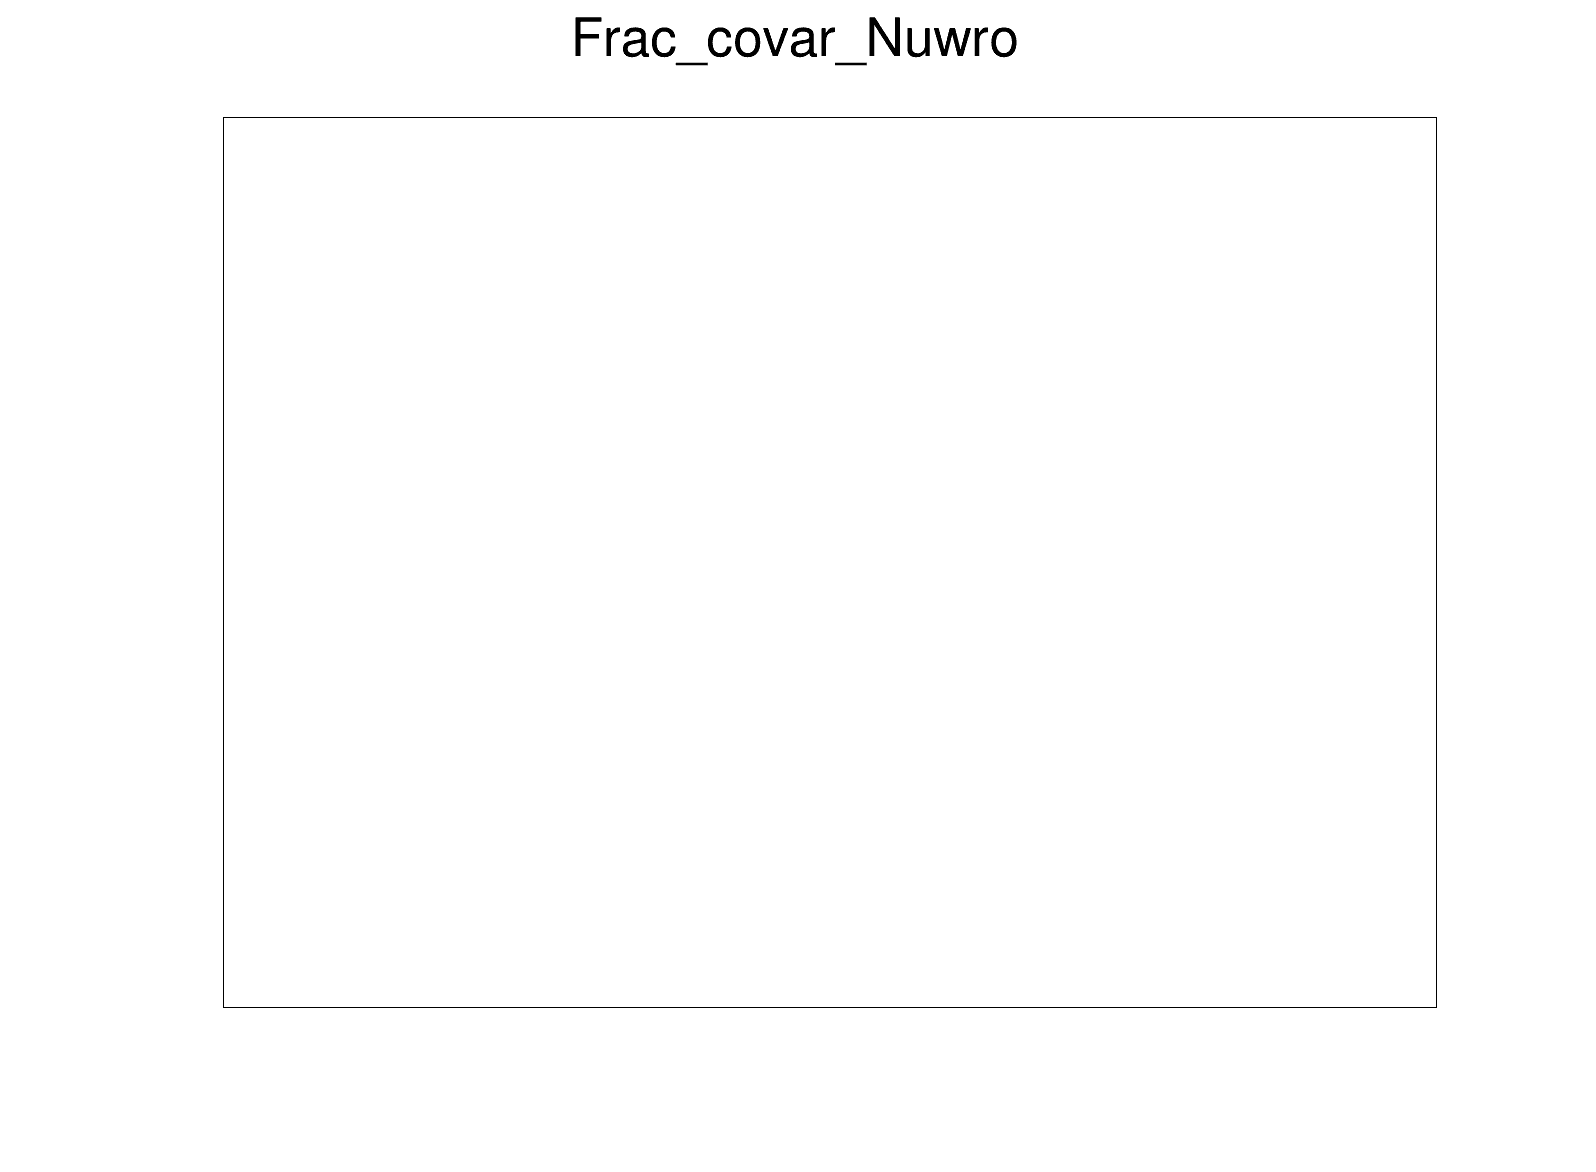

In [46]:
covar_GuB, corr_GuB = getVar(FF.plot2arr(h_pred_GuB,1),frac_tot_GuB)
plot_arr(covar_GuB,'Covar_uB_tune')
plot_arr(corr_GuB,'Correlation_uB_tune')
plot_arr(frac_tot_GuB,'Frac_covar_uB_tune')

covar_G3, corr_G3 = getVar(FF.plot2arr(h_pred_G3,1),frac_tot_G3)
plot_arr(covar_G3,'Covar_G3')
plot_arr(corr_G3,'Correlation_G3')
plot_arr(frac_tot_G3,'Frac_covar_G3')

covar_G2, corr_G2 = getVar(FF.plot2arr(h_pred_G2,1),frac_tot_G2)
plot_arr(covar_G2,'Covar_G2')
plot_arr(corr_G2,'Correlation_G2')
plot_arr(frac_tot_G2,'Frac_covar_G2')

covar_Gibuu, corr_Gibuu = getVar(FF.plot2arr(h_pred_GiBuu,1),frac_tot_GiBuu)
plot_arr(covar_Gibuu,'Covar_Gibuu')
plot_arr(corr_Gibuu,'Correlation_Gibuu')
plot_arr(frac_tot_GiBuu,'Frac_covar_Gibuu')

covar_Neut, corr_Neut = getVar(FF.plot2arr(h_pred_neut,1),frac_tot_Neut)
plot_arr(covar_Neut,'Covar_Neut')
plot_arr(corr_Neut,'Correlation_Neut')
plot_arr(frac_tot_Neut,'Frac_covar_Neut')

covar_Nuwro, corr_Nuwro = getVar(FF.plot2arr(h_pred_nuwro,1),frac_tot_NuWro)
plot_arr(covar_Nuwro,'Covar_Nuwro')
plot_arr(corr_Nuwro,'Correlation_Nuwro')
plot_arr(frac_tot_NuWro,'Frac_covar_Nuwro')


15.195817906624713 230.91288185129628
5.894847881899677 20.50840377817617


Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/sample_stat_err.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/sample_stat_err.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/sample_stat_err.pdf has been created


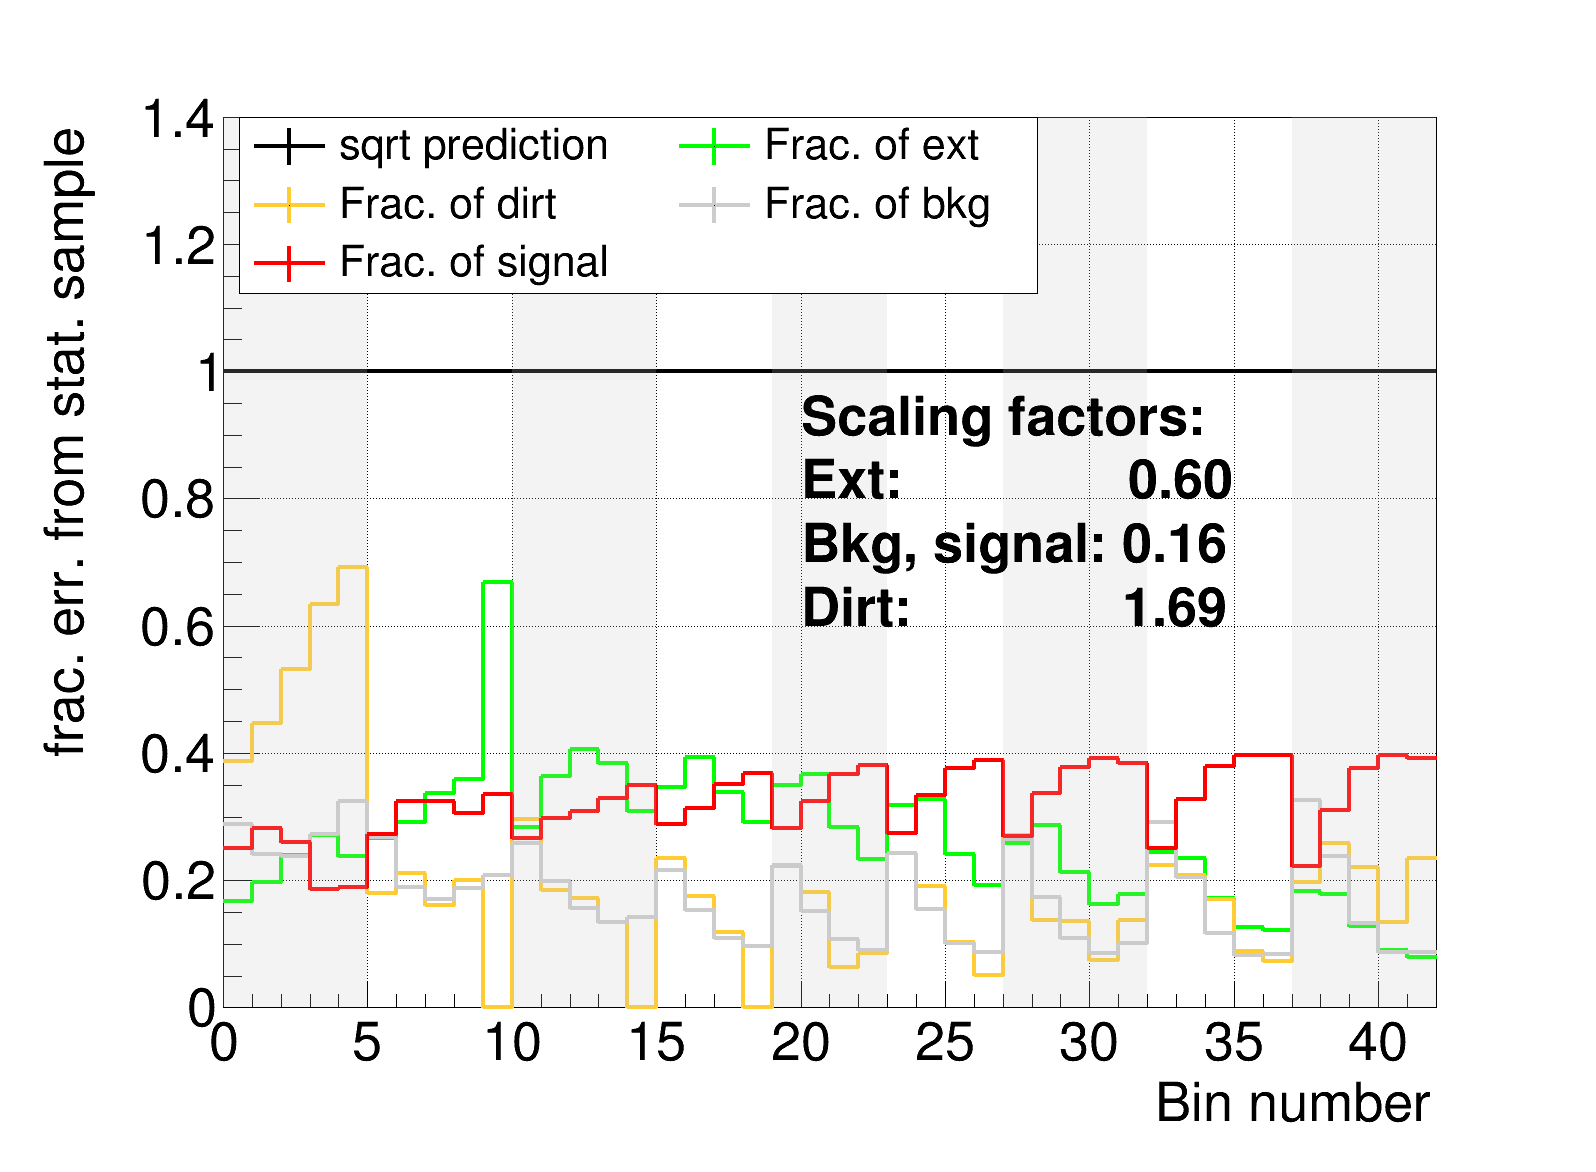

In [47]:
#Scalefactors: 
#Data:		1.0
#Ext:		0.600992748172
#Overlay:	0.169069492301
#Dirt:		1.69438986704

data_stat_vec = np.zeros((43))
ext_stat_vec = np.zeros((43))
dirt_stat_vec = np.zeros((43))
bkg_stat_vec = np.zeros((43))
signal_stat_vec = np.zeros((43))
for i in range(43):
    data_stat_vec[i] = h_data.GetBinError(i+1)
    ext_stat_vec[i] = h_ext.GetBinError(i+1)*math.sqrt(0.600992748172)
    dirt_stat_vec[i] = h_dirt.GetBinError(i+1)*math.sqrt(1.69438986704)
    bkg_stat_vec[i] = h_bkg.GetBinError(i+1)*math.sqrt(0.169069492301)
    signal_stat_vec[i] = h_sig.GetBinError(i+1)*math.sqrt(0.169069492301)

data_vec = FF.plot2arr(h_data,1)
ext_vec = FF.plot2arr(h_ext,1)
dirt_vec = FF.plot2arr(h_dirt,1)
bkg_vec = FF.plot2arr(h_bkg,1)
signal_vec = FF.plot2arr(h_sig,1)


signal_vec[4]=0.1
signal_vec[9]=0.1

dirt_vec +=1e-10

tot_vec = ext_vec+dirt_vec+bkg_vec+signal_vec
tot_stat_vec = np.zeros((43))
for i in range(43):
    tot_stat_vec[i] = math.sqrt(tot_vec[i])

print tot_stat_vec[0],tot_vec[0]
print dirt_stat_vec[0],dirt_vec[0]

frac_data_stat_vec = tot_stat_vec[0:-1]/tot_vec[0:-1]
frac_ext_stat_vec = ext_stat_vec[0:-1]/tot_vec[0:-1]
frac_dirt_stat_vec = dirt_stat_vec[0:-1]/tot_vec[0:-1]
frac_bkg_stat_vec = bkg_stat_vec[0:-1]/tot_vec[0:-1]
frac_signal_stat_vec = signal_stat_vec[0:-1]/tot_vec[0:-1]

h_frac_data_stat_vec = FF.arr2plot(frac_data_stat_vec/frac_data_stat_vec)
h_frac_ext_stat_vec = FF.arr2plot(frac_ext_stat_vec/frac_data_stat_vec)
h_frac_dirt_stat_vec = FF.arr2plot(frac_dirt_stat_vec/frac_data_stat_vec)
h_frac_bkg_stat_vec = FF.arr2plot(frac_bkg_stat_vec/frac_data_stat_vec)
h_frac_signal_stat_vec = FF.arr2plot(frac_signal_stat_vec/frac_data_stat_vec)

h_frac_ext_stat_vec.SetLineColor(ROOT.kGreen)
h_frac_dirt_stat_vec.SetLineColor(ROOT.kOrange-2)
h_frac_bkg_stat_vec.SetLineColor(ROOT.kGray)
h_frac_signal_stat_vec.SetLineColor(ROOT.kRed)

FF.main_plot(h_frac_data_stat_vec)
h_frac_data_stat_vec.SetMaximum(1.4)
h_frac_data_stat_vec.SetMinimum(0)
h_frac_data_stat_vec.SetXTitle('Bin number')
h_frac_data_stat_vec.SetYTitle('frac. err. from stat. sample')
h_frac_data_stat_vec.Draw()
h_frac_ext_stat_vec.Draw('same')
h_frac_dirt_stat_vec.Draw('same')
h_frac_bkg_stat_vec.Draw('same')
h_frac_signal_stat_vec.Draw('same')
h_histo = FF.histBkg(h_frac_signal_stat_vec)
h_histo.Draw('hist same')
t1 = ROOT.TText(20,.9,"Scaling factors:");
t2 = ROOT.TText(20,.8,"Ext:               0.60")
t3 = ROOT.TText(20,.7,"Bkg, signal: 0.16");
t4 = ROOT.TText(20,.6,"Dirt:              1.69");
t1.Draw()
t2.Draw()
t3.Draw()
t4.Draw()

legend = ROOT.TLegend(0.15,0.75,0.65,0.9)
legend.SetNColumns(2)
legend.AddEntry(h_frac_data_stat_vec,'sqrt prediction',"lep");
legend.AddEntry(h_frac_ext_stat_vec,'Frac. of ext',"lep");
legend.AddEntry(h_frac_dirt_stat_vec,'Frac. of dirt',"lep");
legend.AddEntry(h_frac_bkg_stat_vec,'Frac. of bkg',"lep");
legend.AddEntry(h_frac_signal_stat_vec,'Frac. of signal',"lep");

legend.Draw()

c1.Draw()
c1.SaveAs(outputdir_png + 'sample_stat_err'+".png")
c1.SaveAs(outputdir_root + 'sample_stat_err'+".root")
c1.SaveAs(outputdir_pdf + 'sample_stat_err'+".pdf") 

15.195850810375715 230.9138818511963
5.893441332049013 20.509403778076173


Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/sample_stat_err2.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/sample_stat_err2.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/sample_stat_err2.pdf has been created


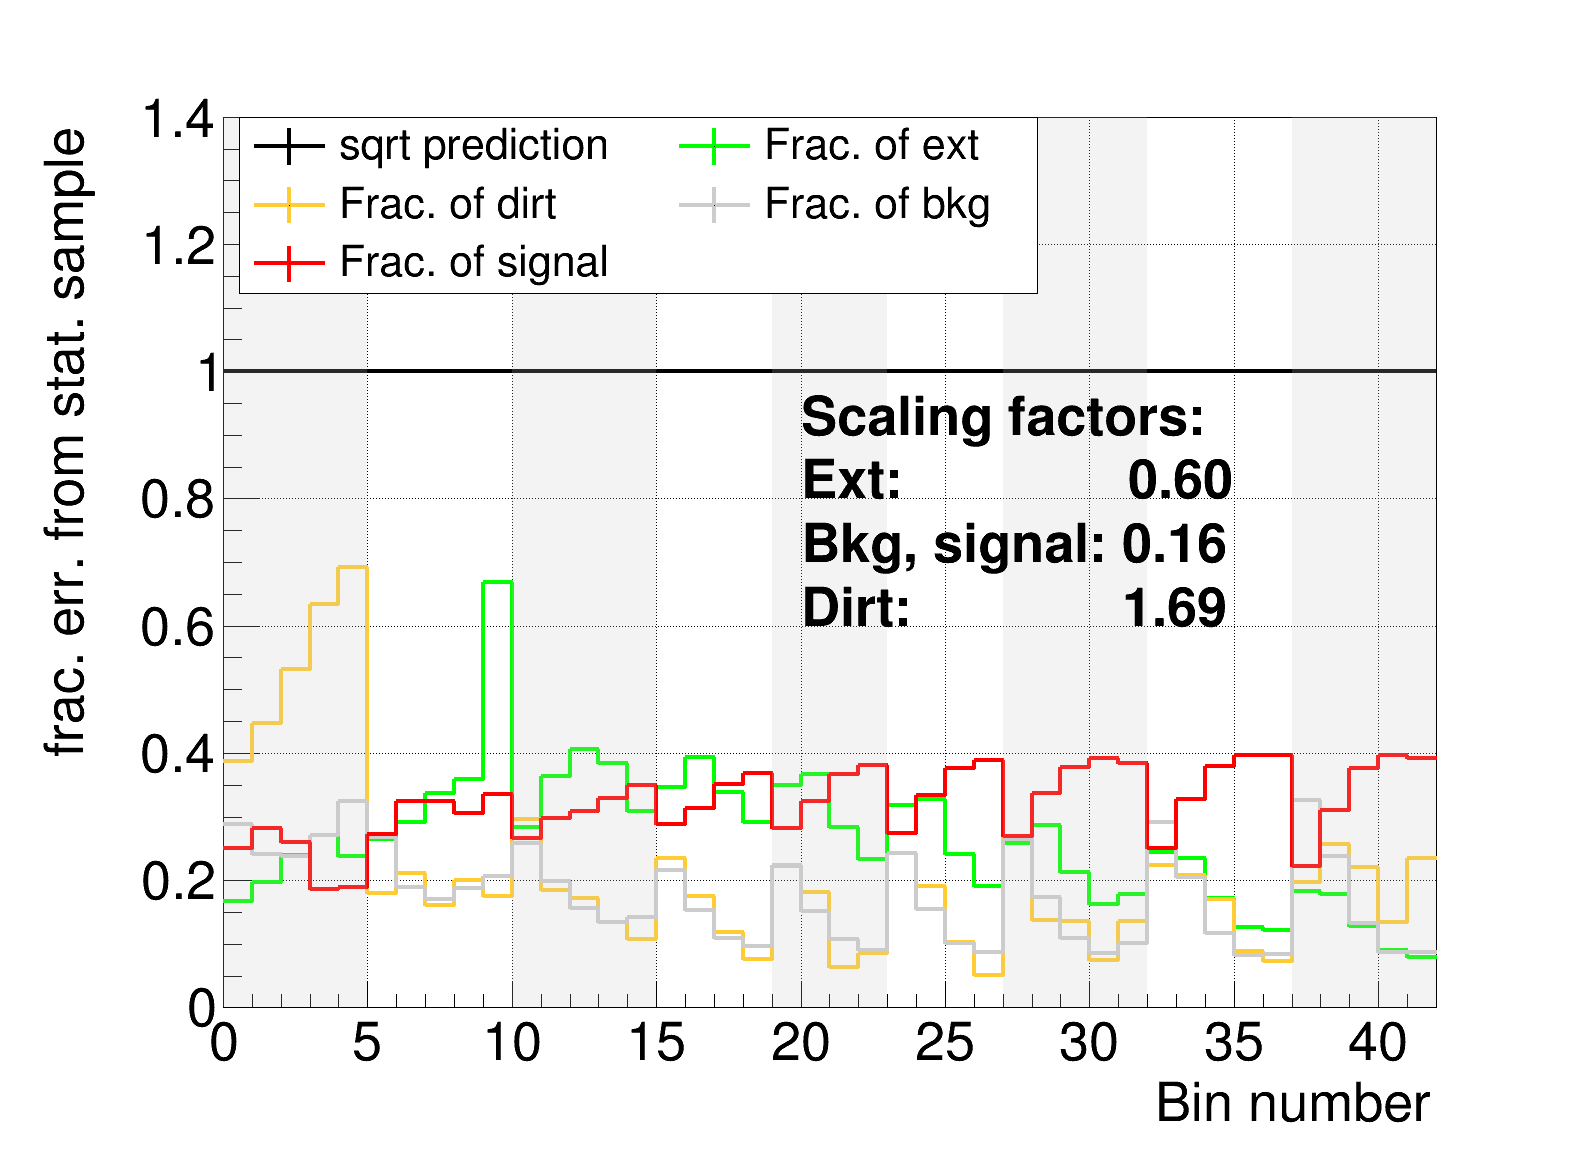

In [48]:
#Scalefactors: 
#Data:		1.0
#Ext:		0.600992748172
#Overlay:	0.169069492301
#Dirt:		1.69438986704

data_stat_vec = np.zeros((43))
ext_stat_vec = np.zeros((43))
dirt_stat_vec = np.zeros((43))
bkg_stat_vec = np.zeros((43))
signal_stat_vec = np.zeros((43))

data_vec = FF.plot2arr(h_data,1)
ext_vec = FF.plot2arr(h_ext,1)
dirt_vec = FF.plot2arr(h_dirt,1)
bkg_vec = FF.plot2arr(h_bkg,1)
signal_vec = FF.plot2arr(h_sig,1)

dirt_vec +=1e-3

for i in range(43):
    data_stat_vec[i] = math.sqrt(h_data.GetBinContent(i+1))
    ext_stat_vec[i] = ext_vec[i]/(math.sqrt(h_ext.GetBinContent(i+1)/(0.600992748172))+1e-3)
    dirt_stat_vec[i] = dirt_vec[i]/(math.sqrt(h_dirt.GetBinContent(i+1)/(1.69438986704))+1e-3)
    bkg_stat_vec[i] = bkg_vec[i]/(math.sqrt(h_bkg.GetBinContent(i+1)/(0.169069492301))+1e-3)
    signal_stat_vec[i] = signal_vec[i]/(math.sqrt(h_sig.GetBinContent(i+1)/(0.169069492301))+1e-3)

signal_vec[4]=0.1
signal_vec[9]=0.1

tot_vec = ext_vec+dirt_vec+bkg_vec+signal_vec
tot_stat_vec = np.zeros((43))
for i in range(43):
    tot_stat_vec[i] = math.sqrt(tot_vec[i])

print tot_stat_vec[0],tot_vec[0]
print dirt_stat_vec[0],dirt_vec[0]

frac_data_stat_vec = tot_stat_vec[0:-1]/tot_vec[0:-1]
frac_ext_stat_vec = ext_stat_vec[0:-1]/tot_vec[0:-1]
frac_dirt_stat_vec = dirt_stat_vec[0:-1]/tot_vec[0:-1]
frac_bkg_stat_vec = bkg_stat_vec[0:-1]/tot_vec[0:-1]
frac_signal_stat_vec = signal_stat_vec[0:-1]/tot_vec[0:-1]

h_frac_data_stat_vec = FF.arr2plot(frac_data_stat_vec/frac_data_stat_vec)
h_frac_ext_stat_vec = FF.arr2plot(frac_ext_stat_vec/frac_data_stat_vec)
h_frac_dirt_stat_vec = FF.arr2plot(frac_dirt_stat_vec/frac_data_stat_vec)
h_frac_bkg_stat_vec = FF.arr2plot(frac_bkg_stat_vec/frac_data_stat_vec)
h_frac_signal_stat_vec = FF.arr2plot(frac_signal_stat_vec/frac_data_stat_vec)

h_frac_ext_stat_vec.SetLineColor(ROOT.kGreen)
h_frac_dirt_stat_vec.SetLineColor(ROOT.kOrange-2)
h_frac_bkg_stat_vec.SetLineColor(ROOT.kGray)
h_frac_signal_stat_vec.SetLineColor(ROOT.kRed)

FF.main_plot(h_frac_data_stat_vec)
h_frac_data_stat_vec.SetMaximum(1.4)
h_frac_data_stat_vec.SetMinimum(0)
h_frac_data_stat_vec.SetXTitle('Bin number')
h_frac_data_stat_vec.SetYTitle('frac. err. from stat. sample')
h_frac_data_stat_vec.Draw()
h_frac_ext_stat_vec.Draw('same')
h_frac_dirt_stat_vec.Draw('same')
h_frac_bkg_stat_vec.Draw('same')
h_frac_signal_stat_vec.Draw('same')
h_histo = FF.histBkg(h_frac_signal_stat_vec)
h_histo.Draw('hist same')
t1 = ROOT.TText(20,.9,"Scaling factors:");
t2 = ROOT.TText(20,.8,"Ext:               0.60")
t3 = ROOT.TText(20,.7,"Bkg, signal: 0.16");
t4 = ROOT.TText(20,.6,"Dirt:              1.69");
t1.Draw()
t2.Draw()
t3.Draw()
t4.Draw()

legend = ROOT.TLegend(0.15,0.75,0.65,0.9)
legend.SetNColumns(2)
legend.AddEntry(h_frac_data_stat_vec,'sqrt prediction',"lep");
legend.AddEntry(h_frac_ext_stat_vec,'Frac. of ext',"lep");
legend.AddEntry(h_frac_dirt_stat_vec,'Frac. of dirt',"lep");
legend.AddEntry(h_frac_bkg_stat_vec,'Frac. of bkg',"lep");
legend.AddEntry(h_frac_signal_stat_vec,'Frac. of signal',"lep");

legend.Draw()

c1.Draw()
c1.SaveAs(outputdir_png + 'sample_stat_err2'+".png")
c1.SaveAs(outputdir_root + 'sample_stat_err2'+".root")
c1.SaveAs(outputdir_pdf + 'sample_stat_err2'+".pdf") 

In [52]:
# load all distributions and the Genie 3 tuned true
path_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
f_cv = ROOT.TFile.Open(path_detsys+'xsec_2D_Run3_wighted_t.root', 'read')
pot = 2.144e+20
h_true_g3_tune = ROOT.TH1F('h_true',"true tune3",43,0,43)
h_data = ROOT.TH1F('h_data',"data",43,0,43)
h_bkg = ROOT.TH1F('h_bkg',"Background",43,0,43)
h_sig = ROOT.TH1F('h_sig',"Background",43,0,43)
h_ext = ROOT.TH1F('h_ext',"Cosmic",43,0,43)
h_dirt = ROOT.TH1F('h_dirt',"Cosmic",43,0,43)
h_eff = ROOT.TH1F('h_eff',"Cosmic",43,0,43)

h_no_moun = ROOT.TH1F('h_no_moun',"h_no_moun",43,0,43)
h_nue = ROOT.TH1F('h_nue',"h_nue",43,0,43)
h_antinu = ROOT.TH1F('h_antinu',"h_antinu",43,0,43)
h_nc = ROOT.TH1F('h_nc',"h_nc",43,0,43)
h_ov = ROOT.TH1F('h_ov',"h_ov",43,0,43)
h_cosmic = ROOT.TH1F('h_cosmic',"h_cosmic",43,0,43)

h_rate_qe = ROOT.TH1F('h_rate_qe',"h_rate_qe",43,0,43)
h_rate_mec = ROOT.TH1F('h_rate_mec',"h_rate_mec",43,0,43)
h_rate_res = ROOT.TH1F('h_rate_res',"h_rate_res",43,0,43)
h_rate_dis = ROOT.TH1F('h_rate_dis',"h_rate_dis",43,0,43)

bin_counter = 0
for t_bin in range(len_theta): #len_theta
    h_temp = f_cv.Get('h_true['+str(t_bin)+']')
    h_temp2 = f_cv.Get('h_data['+str(t_bin)+']')
    h_temp3 = f_cv.Get('h_overlay['+str(t_bin)+']')
    h_temp31 = f_cv.Get('h_signal['+str(t_bin)+']')
    h_temp4 = f_cv.Get('h_ext['+str(t_bin)+']')
    h_temp5 = f_cv.Get('h_dirt['+str(t_bin)+']')
    h_temp6 = f_cv.Get('h_1d_eff['+str(t_bin)+']')
    
    h_temp10 = f_cv.Get('h_no_moun['+str(t_bin)+']')
    h_temp11 = f_cv.Get('h_nue['+str(t_bin)+']')
    h_temp12 = f_cv.Get('h_antinu['+str(t_bin)+']')
    h_temp13 = f_cv.Get('h_nc['+str(t_bin)+']')
    h_temp14 = f_cv.Get('h_ov['+str(t_bin)+']')
    h_temp15 = f_cv.Get('h_cosmic['+str(t_bin)+']')

    h_temp20 = f_cv.Get('h_QE_rate['+str(t_bin)+']')
    h_temp21 = f_cv.Get('h_MEC_rate['+str(t_bin)+']')
    h_temp22 = f_cv.Get('h_RES_rate['+str(t_bin)+']')
    h_temp23 = f_cv.Get('h_DIS_rate['+str(t_bin)+']')

    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        h_true_g3_tune.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))
        h_data.SetBinContent(bin_counter,h_temp2.GetBinContent(m_bin+1))
        h_bkg.SetBinContent(bin_counter,h_temp3.GetBinContent(m_bin+1))
        h_sig.SetBinContent(bin_counter,h_temp31.GetBinContent(m_bin+1))
        h_ext.SetBinContent(bin_counter,h_temp4.GetBinContent(m_bin+1))
        h_dirt.SetBinContent(bin_counter,h_temp5.GetBinContent(m_bin+1))
        h_eff.SetBinContent(bin_counter,h_temp6.GetBinContent(m_bin+1))
        
        h_no_moun.SetBinContent(bin_counter,h_temp10.GetBinContent(m_bin+1))
        h_nue.SetBinContent(bin_counter,h_temp11.GetBinContent(m_bin+1))
        h_antinu.SetBinContent(bin_counter,h_temp12.GetBinContent(m_bin+1))
        h_nc.SetBinContent(bin_counter,h_temp13.GetBinContent(m_bin+1))
        h_ov.SetBinContent(bin_counter,h_temp14.GetBinContent(m_bin+1))
        h_cosmic.SetBinContent(bin_counter,h_temp15.GetBinContent(m_bin+1))
        
        h_rate_qe.SetBinContent(bin_counter,h_temp20.GetBinContent(m_bin+1))
        h_rate_mec.SetBinContent(bin_counter,h_temp21.GetBinContent(m_bin+1))
        h_rate_res.SetBinContent(bin_counter,h_temp22.GetBinContent(m_bin+1))
        h_rate_dis.SetBinContent(bin_counter,h_temp23.GetBinContent(m_bin+1))
h_eff.SetBinContent(5,1)
h_eff.SetBinContent(10,1)

In [53]:
#h_data h_sig

h_data_sub_bkg = h_data.Clone()
h_data_sub_bkg.Add(h_ext,-1)
h_data_sub_bkg.Add(h_dirt,-1)
h_data_sub_bkg.Add(h_bkg,-1)


True

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/channel_no_fit.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/channel_no_fit.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/channel_no_fit.pdf has been created


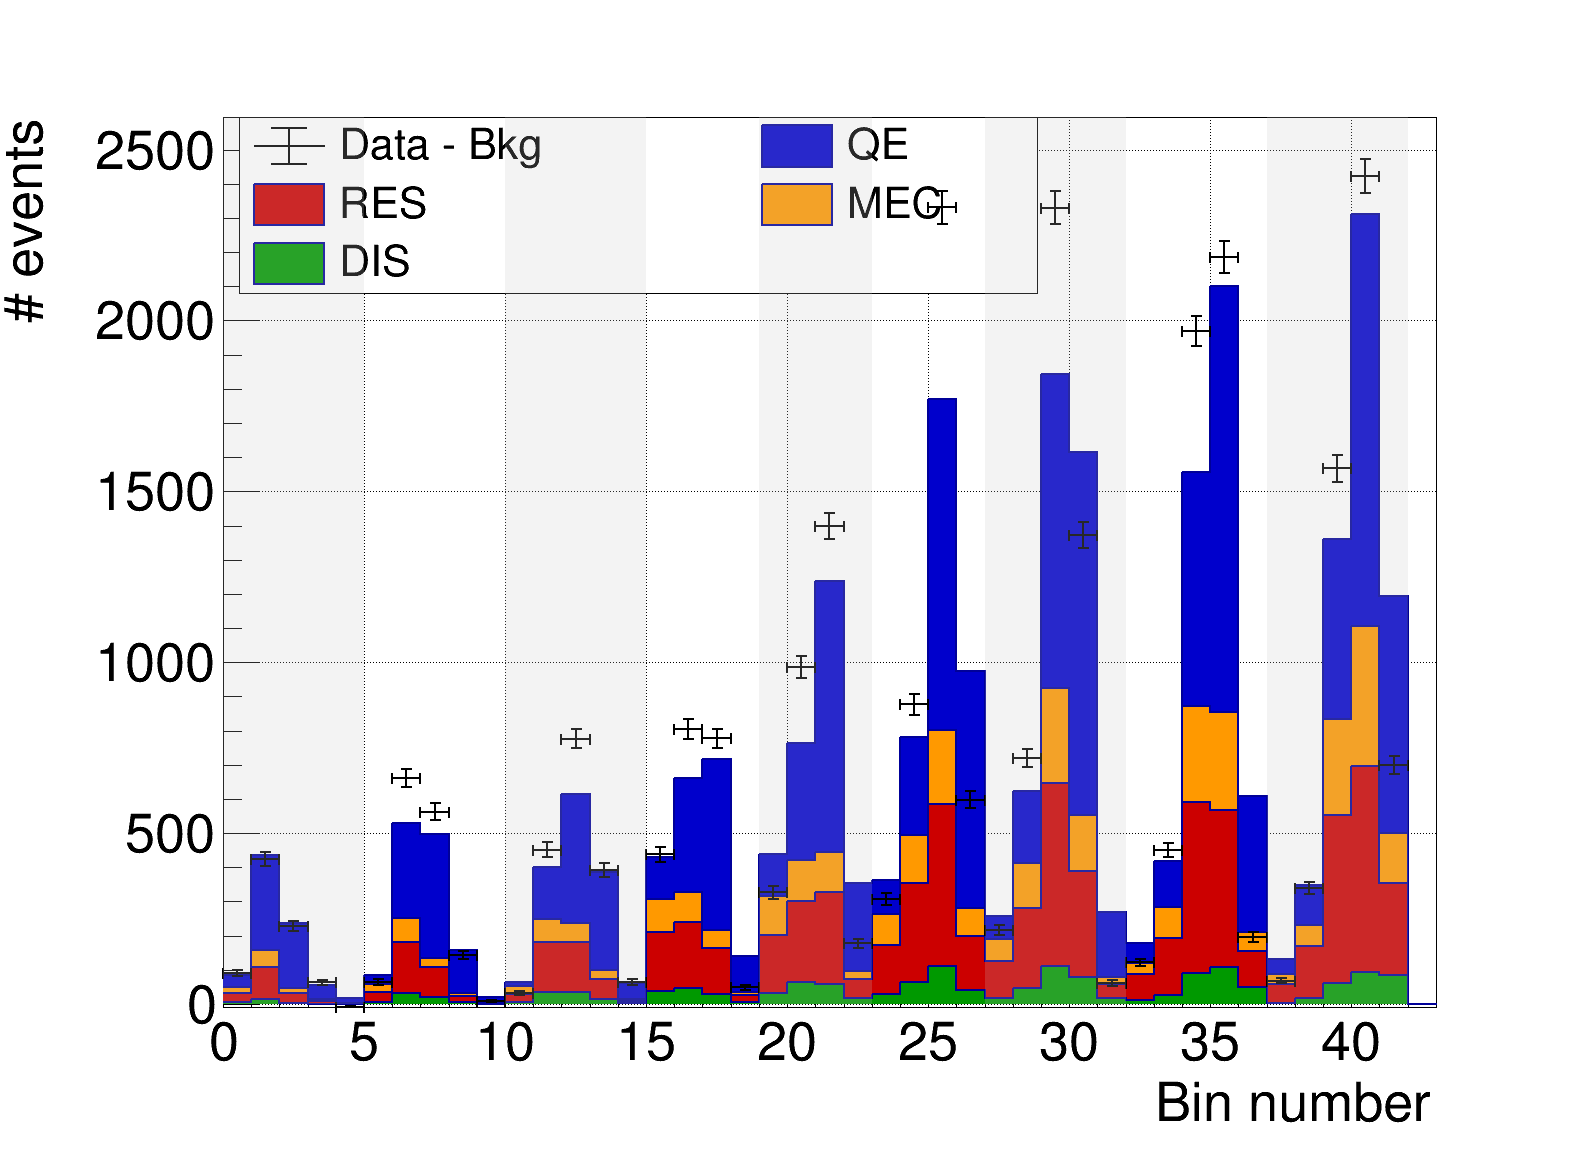

In [54]:
FF.main_plot(h_data_sub_bkg)
h_data_sub_bkg.SetXTitle('Bin number')
h_data_sub_bkg.SetYTitle('# events')
h_data_sub_bkg.SetMinimum(-10)
h_data_sub_bkg.Draw('E1')
h_rate_qe1 = h_rate_qe.Clone()
h_rate_mec1 = h_rate_mec.Clone()
h_rate_res1 = h_rate_res.Clone()
h_rate_dis1 = h_rate_dis.Clone()

h_rate_qe1.SetFillColor(ROOT.kBlue+1)
h_rate_res1.SetFillColor(ROOT.kRed+1)
h_rate_mec1.SetFillColor(ROOT.kOrange-3)
h_rate_dis1.SetFillColor(ROOT.kGreen+2)

h_data_sub_bkg.SetLineWidth(2)
h_rate_res1.SetLineWidth(2)
h_rate_qe1.SetLineWidth(2)
h_rate_mec1.SetLineWidth(2)
h_rate_dis1.SetLineWidth(2)

hs = ROOT.THStack("hs",'variable'+';'+'axis_name'+'; Entries per bin');
hs.Add(h_rate_dis1)
hs.Add(h_rate_res1)
hs.Add(h_rate_mec1)
hs.Add(h_rate_qe1)

legend = ROOT.TLegend(0.15,0.75,0.65,0.9)
legend.SetNColumns(2)
legend.AddEntry(h_data_sub_bkg,'Data - Bkg',"lep");
legend.AddEntry(h_rate_qe1,'QE',"f");
legend.AddEntry(h_rate_res1,'RES',"f");
legend.AddEntry(h_rate_mec1,'MEC',"f");
legend.AddEntry(h_rate_dis1,'DIS',"f");
legend.Draw()

hs.Draw('hist same')
h_data_sub_bkg.Draw('same E1')
h_histo = FF.histBkg(h_data_sub_bkg)
h_histo.Draw('hist same')

c1.Draw()
c1.SaveAs(outputdir_png + 'channel_no_fit'+".png")
c1.SaveAs(outputdir_root + 'channel_no_fit'+".root")
c1.SaveAs(outputdir_pdf + 'channel_no_fit'+".pdf") 

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/channel_no_fit_ratio.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/channel_no_fit_ratio.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/channel_no_fit_ratio.pdf has been created


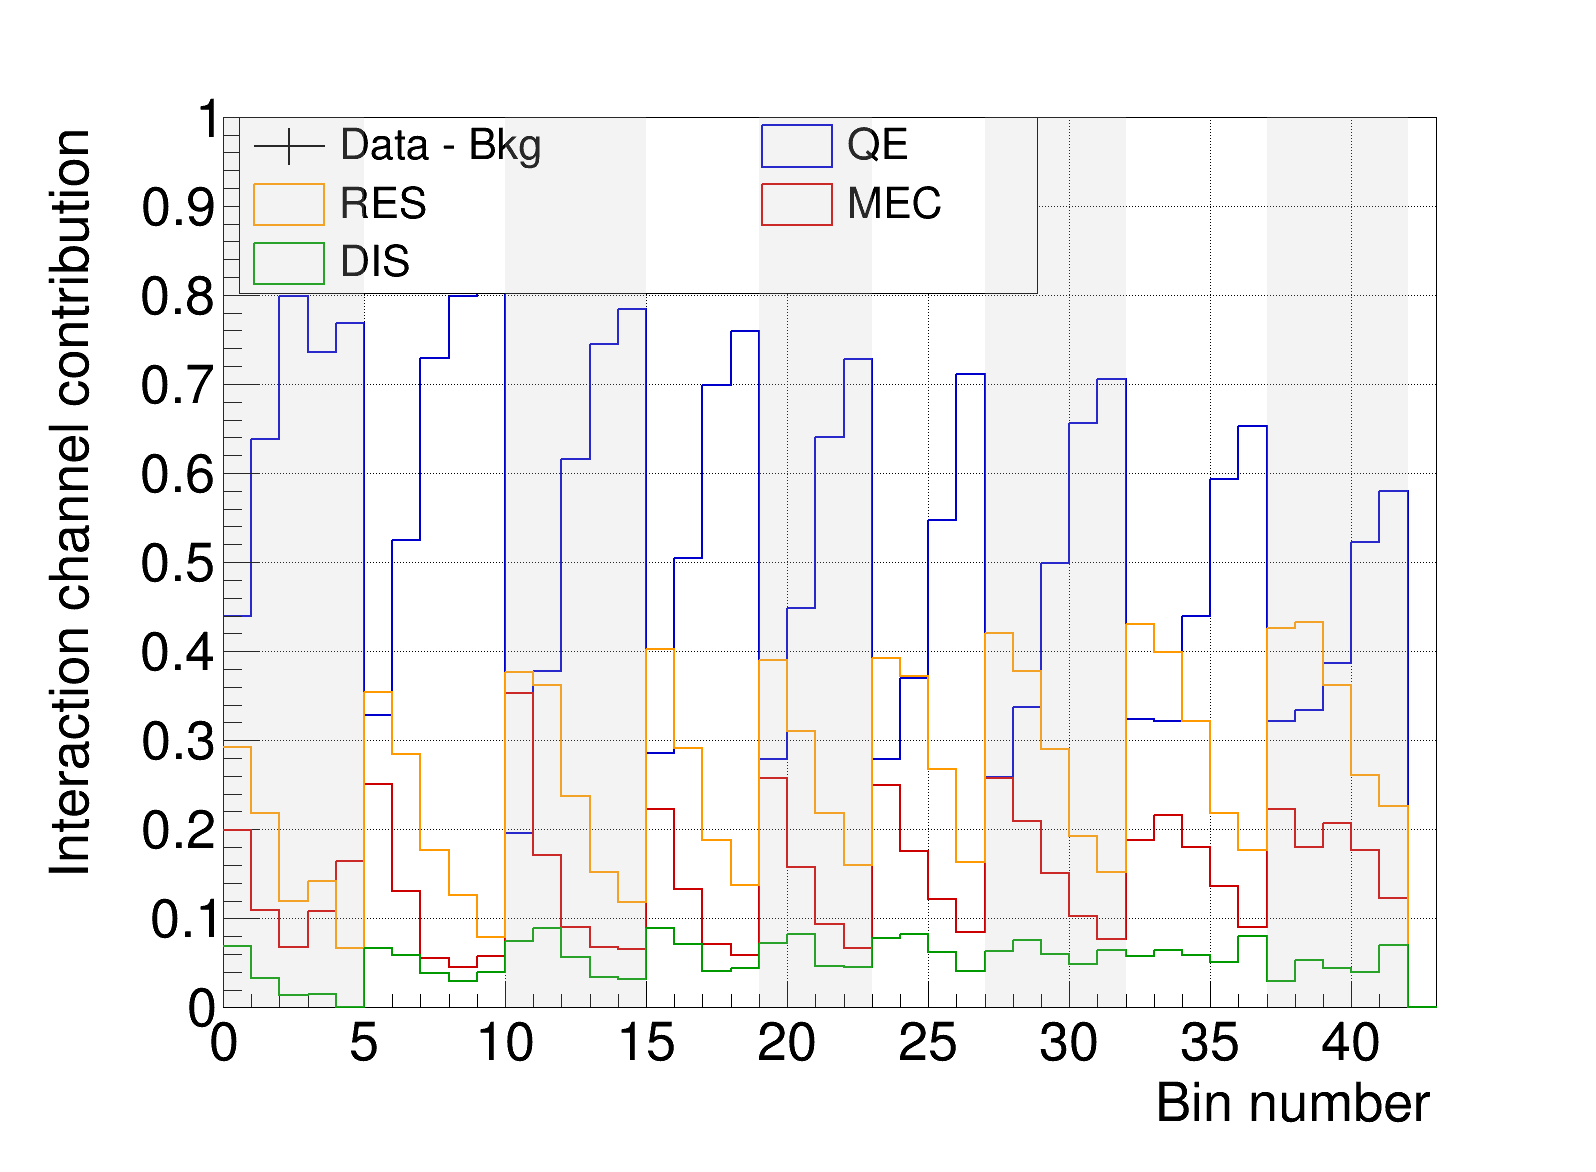

In [55]:
h_mc_tot = h_rate_qe1.Clone()
h_mc_tot.Add(h_rate_res1)
h_mc_tot.Add(h_rate_mec1)
h_mc_tot.Add(h_rate_dis1)
h_mc_tot.SetFillColor(ROOT.kBlack)
for i in range(43):
    h_mc_tot.SetBinError(i+1,0)

h_data_r = h_data_sub_bkg.Clone()
h_data_r.Divide(h_mc_tot)
h_data_r.SetMinimum(0)
h_data_r.SetMaximum(2)
h_data_r.Draw('E1')

h_qe_r = h_rate_qe1.Clone()
h_mec_r = h_rate_mec1.Clone()
h_res_r = h_rate_res1.Clone()
h_dis_r = h_rate_dis1.Clone()
h_qe_r.Divide(h_mc_tot)
h_mec_r.Divide(h_mc_tot)
h_res_r.Divide(h_mc_tot)
h_dis_r.Divide(h_mc_tot)

FF.main_plot(h_qe_r)

h_qe_r.SetLineColor(ROOT.kBlue+1)
h_res_r.SetLineColor(ROOT.kRed+1)
h_mec_r.SetLineColor(ROOT.kOrange-3)
h_dis_r.SetLineColor(ROOT.kGreen+2)

h_qe_r.SetFillColor(0)
h_mec_r.SetFillColor(0)
h_res_r.SetFillColor(0)
h_dis_r.SetFillColor(0)

h_qe_r.SetLineWidth(2)
h_mec_r.SetLineWidth(2)
h_res_r.SetLineWidth(2)
h_dis_r.SetLineWidth(2)

h_qe_r.SetMinimum(0)
h_qe_r.SetMaximum(1)
h_qe_r.SetYTitle('Interaction channel contribution')
h_qe_r.SetXTitle('Bin number')
h_qe_r.Draw('hist')

legend = ROOT.TLegend(0.15,0.75,0.65,0.9)
legend.SetNColumns(2)
legend.AddEntry(h_data_sub_bkg,'Data - Bkg',"lep");
legend.AddEntry(h_qe_r,'QE',"f");
legend.AddEntry(h_res_r,'RES',"f");
legend.AddEntry(h_mec_r,'MEC',"f");
legend.AddEntry(h_dis_r,'DIS',"f");
legend.Draw()

h_mec_r.Draw('hist same')
h_res_r.Draw('hist same')
h_dis_r.Draw('hist same')
h_histo.Draw('hist same')



c1.Draw()
c1.SaveAs(outputdir_png + 'channel_no_fit_ratio'+".png")
c1.SaveAs(outputdir_root + 'channel_no_fit_ratio'+".root")
c1.SaveAs(outputdir_pdf + 'channel_no_fit_ratio'+".pdf") 

In [56]:
def my_distribution( x, para):
    #print x
    xx= x[0]
    #y = np.zeros((binnum))
    y = np.zeros((4))
    #for i in range(binnum):
    #    y[i] = h_temp[i].GetBinContent(h_temp[i].GetXaxis().FindFixBin(xx))
    y[0] = h_rate_qe.GetBinContent(h_rate_qe.GetXaxis().FindFixBin(xx))
    y[1] = h_rate_mec.GetBinContent(h_rate_mec.GetXaxis().FindFixBin(xx))
    y[2] = h_rate_res.GetBinContent(h_rate_res.GetXaxis().FindFixBin(xx))
    y[3] = h_rate_dis.GetBinContent(h_rate_dis.GetXaxis().FindFixBin(xx))
    
    return np.dot(para,y)

In [57]:

f = ROOT.TF1("my_distribution", my_distribution, 0, 42, 4)
f.SetParameters(np.zeros((4)))
for i in range (4):
    f.SetParLimits(i,0, 10);
    #f.SetParLimits(i,0.0, h_true.GetBinContent(i+1)*50000);

result = h_data_sub_bkg.Fit(f,'WL')


 FCN=870.537 FROM MIGRAD    STATUS=CONVERGED     386 CALLS         387 TOTAL
                     EDM=1.54436e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.84765e-01   2.34338e-02   8.86395e-05   9.96038e-03
   2  p1           4.85668e-10   1.53741e-02   1.59232e-03** at limit **
   3  p2           2.45968e+00   4.81644e-02   1.06844e-04  -1.92198e-02
   4  p3           8.47704e-10   2.57861e-02   2.06537e-03** at limit **
                               ERR DEF= 0.5


Warning in <HFit::FitObject>: A weighted likelihood fit is requested but histogram is not weighted - do a standard Likelihood fit


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/channel_fit.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/channel_fit.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/channel_fit.pdf has been created


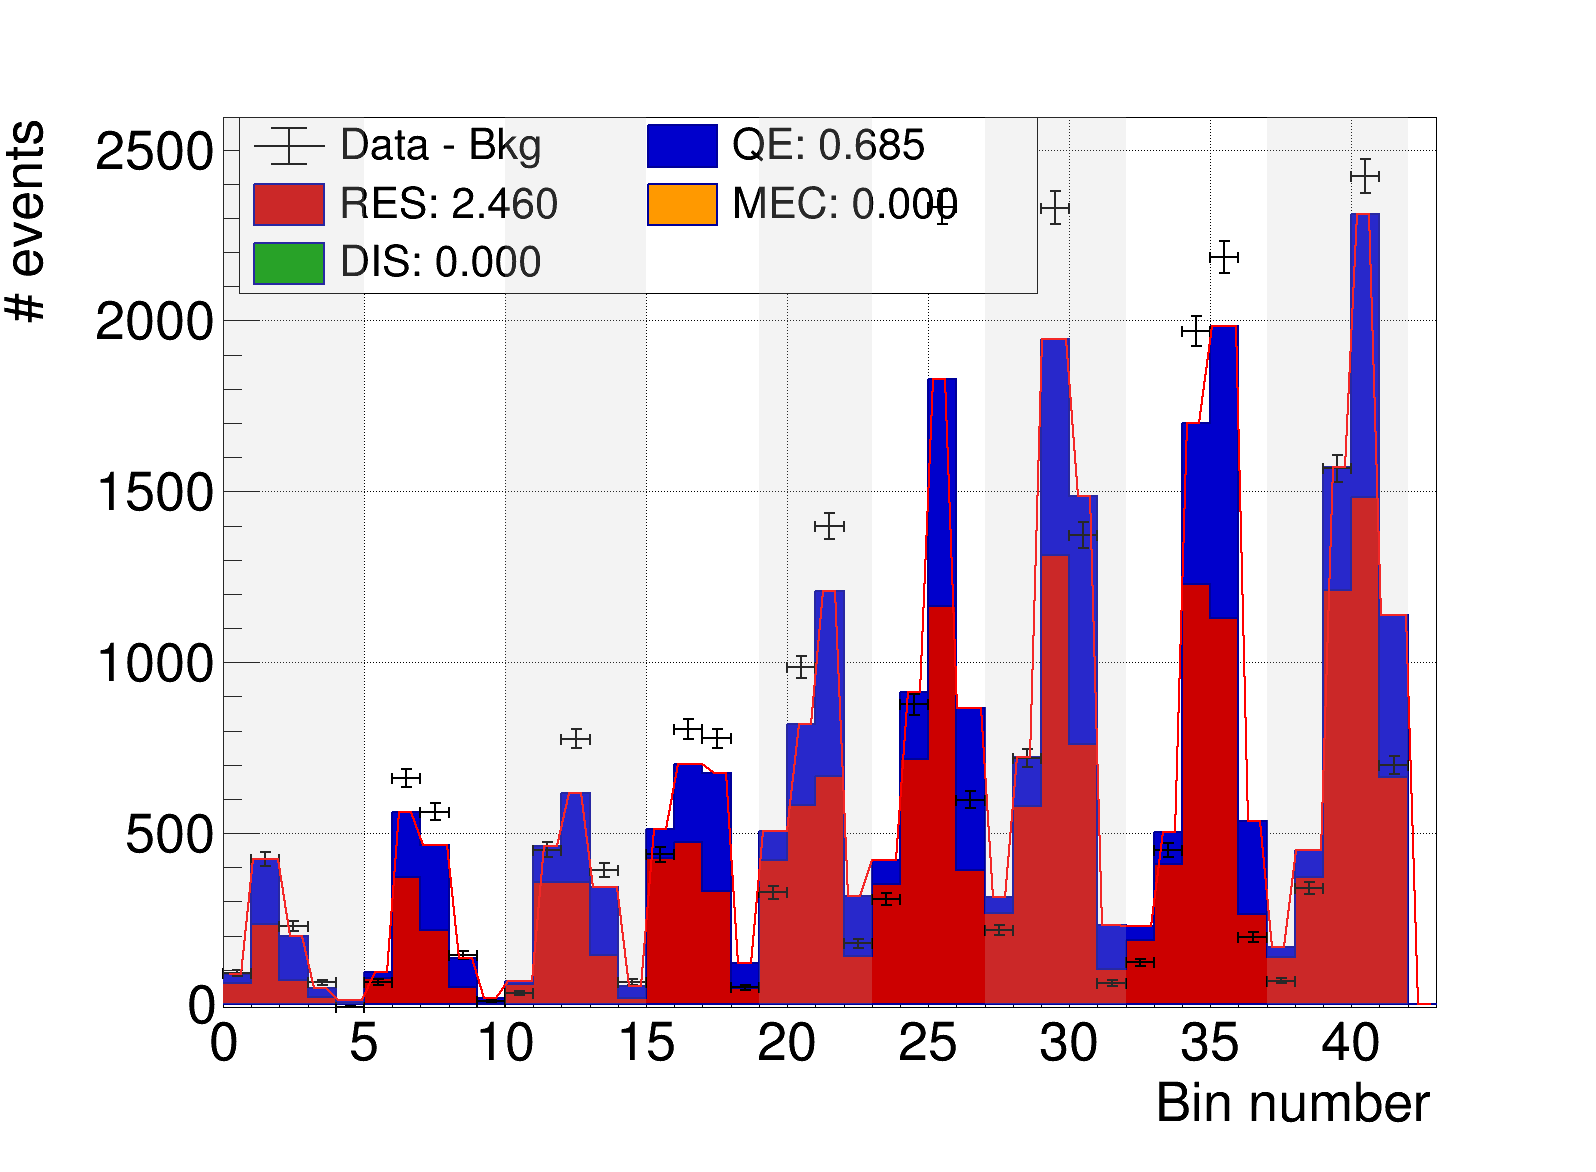

In [58]:
FF.main_plot(h_data_sub_bkg)
h_data_sub_bkg.SetXTitle('Bin number')
h_data_sub_bkg.SetYTitle('# events')
h_data_sub_bkg.Draw('E1')
h_rate_qe1 = h_rate_qe.Clone()
h_rate_mec1 = h_rate_mec.Clone()
h_rate_res1 = h_rate_res.Clone()
h_rate_dis1 = h_rate_dis.Clone()
h_rate_qe1.Scale(f.GetParameters()[0])
h_rate_mec1.Scale(f.GetParameters()[1])
h_rate_res1.Scale(f.GetParameters()[2])
h_rate_dis1.Scale(f.GetParameters()[3])

h_rate_qe1.SetFillColor(ROOT.kBlue+1)
h_rate_res1.SetFillColor(ROOT.kRed+1)
h_rate_mec1.SetFillColor(ROOT.kOrange-3)
h_rate_dis1.SetFillColor(ROOT.kGreen+2)

h_data_sub_bkg.SetLineWidth(2)
h_rate_res1.SetLineWidth(2)
h_rate_qe1.SetLineWidth(2)
h_rate_mec1.SetLineWidth(2)
h_rate_dis1.SetLineWidth(2)



hs = ROOT.THStack("hs",'variable'+';'+'axis_name'+'; Entries per bin');
hs.Add(h_rate_dis1)
hs.Add(h_rate_res1)
hs.Add(h_rate_mec1)
hs.Add(h_rate_qe1)

legend = ROOT.TLegend(0.15,0.75,0.65,0.9)
legend.SetNColumns(2)
legend.AddEntry(h_data_sub_bkg,'Data - Bkg',"lep");
legend.AddEntry(h_rate_qe1,'QE: {:04.3f}'.format(f.GetParameters()[0]),"f");
legend.AddEntry(h_rate_res1,'RES: {:04.3f}'.format(f.GetParameters()[2]),"f");
legend.AddEntry(h_rate_mec1,'MEC: {:04.3f}'.format(f.GetParameters()[1]),"f");
legend.AddEntry(h_rate_dis1,'DIS: {:04.3f}'.format(f.GetParameters()[3]),"f");
legend.Draw()

hs.Draw('hist same')
h_data_sub_bkg.Draw('same E1')
h_histo.Draw('hist same')


c1.Draw()
c1.SaveAs(outputdir_png + 'channel_fit'+".png")
c1.SaveAs(outputdir_root + 'channel_fit'+".root")
c1.SaveAs(outputdir_pdf + 'channel_fit'+".pdf") 

In [59]:
#calculate covariance matrix and xsec and smearing for feeding in nuiscance
this_data = FF.plot2arr(h_data_sub_bkg,1)
tmp = h_true_g3_tune.Clone()
tmp = smear_plot(tmp)
this_pred = FF.plot2arr(tmp,1)
tot_pred_xsec = FF.plot2arr(h_pred_GuB,1)
bin_counter = 0
for t_bin in range(len_theta): #len_theta
    h_temp = f_cv.Get('h_data['+str(t_bin)+']')
    for m_bin in range(len_mom[t_bin]):
        bin_width =  h_temp.GetBinWidth(m_bin+1)
        bin_width_theta = theta_bins[t_bin+1] - theta_bins[t_bin]
        this_pred[bin_counter] /=(bin_width*bin_width_theta)
        this_data[bin_counter] /=(bin_width*bin_width_theta) 
        tot_pred_xsec[bin_counter] /=(bin_width*bin_width_theta) 
        bin_counter+=1

this_pred /=(N_tot*flux_cv*1e-38)
this_data /=(N_tot*flux_cv*1e-38)
tot_pred_xsec /=(N_tot*flux_cv*1e-38)
#print this_pred
covar = FF.frac2cov(frac_tot, tot_pred_xsec)
#print covar
h_smear = f_cv.Get('h_smearing')
smear_mat = FF.plot2arr(h_smear,2)
eff_vec = FF.plot2arr(h_eff,1)
#true_vec = FF.plot2arr(h_true_g3_tune,1)
smear_mat = smear_mat*eff_vec
#print smear_mat[0]
this_pred = this_pred[:-1]
this_data = this_data[:-1]
covar = covar[:-1,:-1]
smear_mat = smear_mat.T

h_xsec_MC = FF.arr2plot(this_pred)
h_xsec_data = FF.arr2plot(this_data)
h_covar = FF.arr2plot(covar)
h_smearing = FF.arr2plot(smear_mat)

#h_xsec_MC.Draw('text')
#c1.Draw()
path_result = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
#path_cv = '/home/tmettler/Desktop/weighted/xsec_phasespacerestriction/'
f_result = ROOT.TFile.Open(path_result+"xsec_2D_result_t_corr.root", 'recreate')
h_xsec_data.Write('xsec_data')
h_covar.Write('covariance_matrix')
h_smearing.Write('smearing_matrix')
RootFile.Close()
f_result.Close()

[43. 43.]
[43. 43.]


Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).


In [60]:
h_frac = FF.arr2plot(frac_tot)
h_stat = FF.arr2plot(frac_stat)
h_err = FF.plot_err_array(frac_tot)
h_err_stat = FF.plot_err_array(frac_stat)

Warning in <TROOT::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_this (Potential memory leak).


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/frac_error_stat.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/frac_error_stat.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/frac_error_stat.pdf has been created


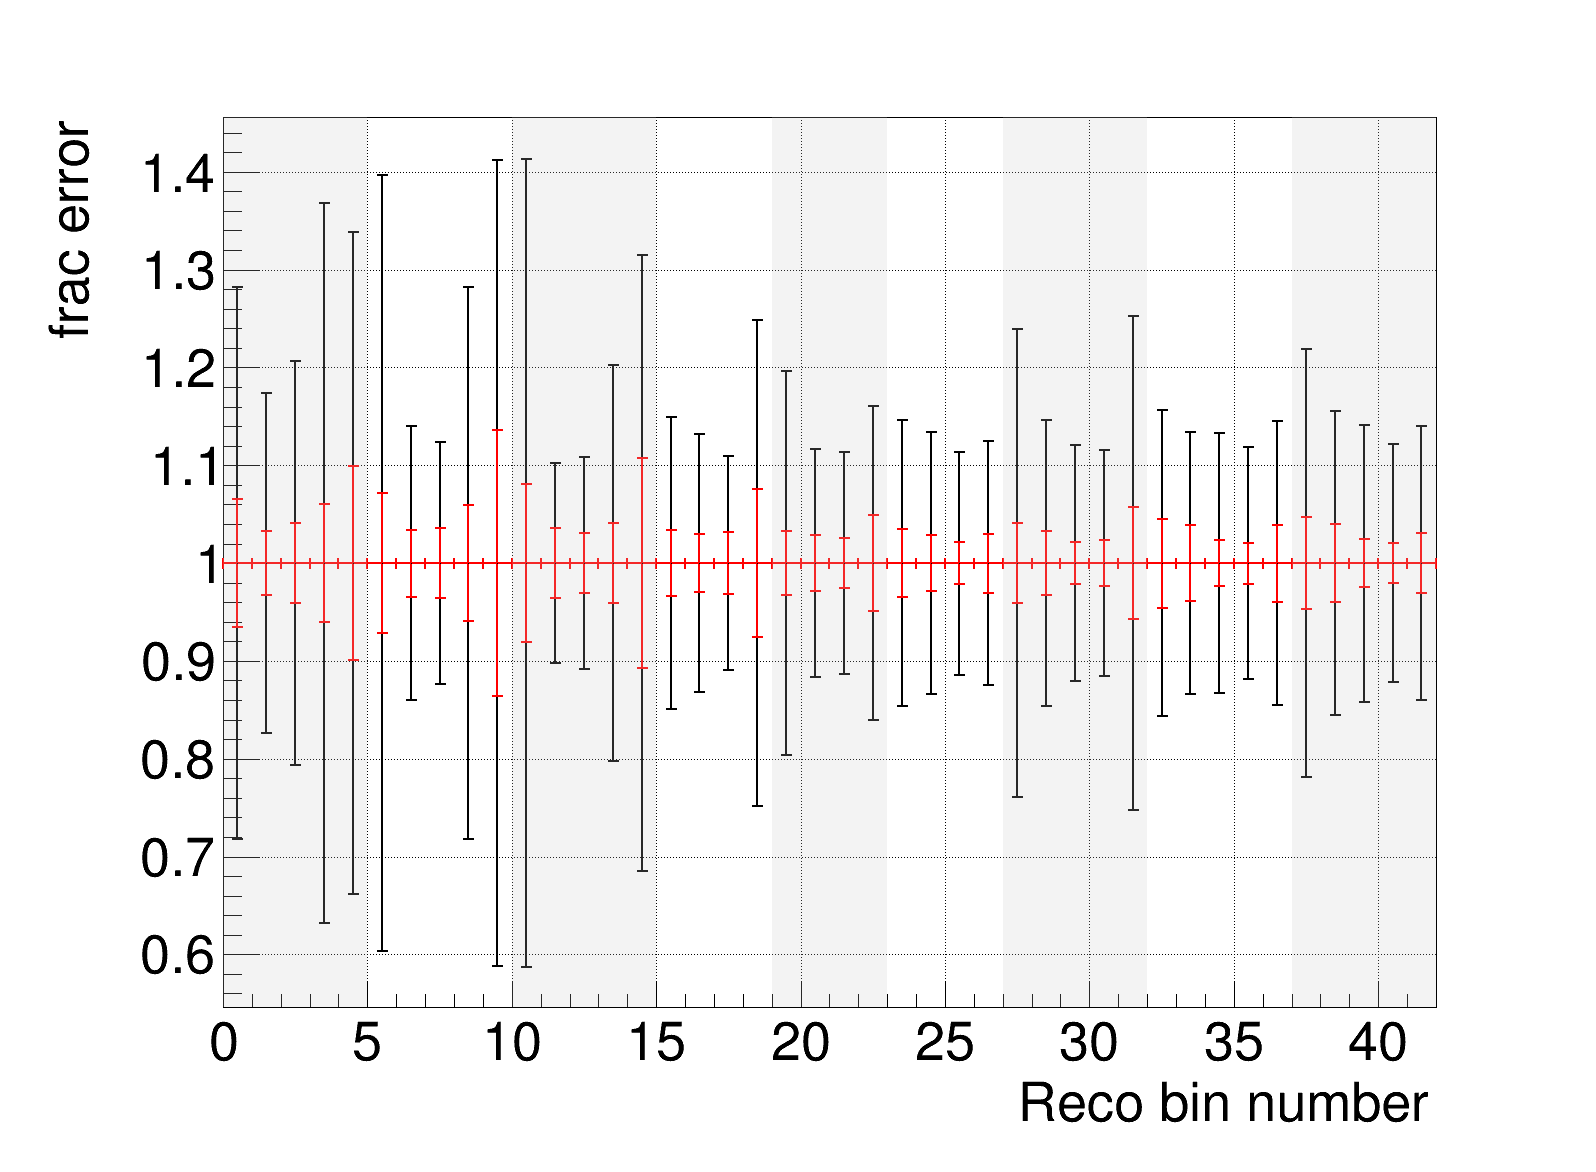

In [61]:
h_err.SetLineWidth(2)
h_err_stat.SetLineWidth(2)
h_err.Draw('E1')
h_err_stat.SetLineColor(ROOT.kRed)
h_err_stat.Draw('E1 same')
h_histo.Draw('hist same')

c1.Draw()
c1.SaveAs(outputdir_png + 'frac_error_stat'+".png")
c1.SaveAs(outputdir_root + 'frac_error_stat'+".root")
c1.SaveAs(outputdir_pdf + 'frac_error_stat'+".pdf")


Warning in <TROOT::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_this (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/error_det_models.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/error_det_models.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/error_det_models.pdf has been created
Warnin

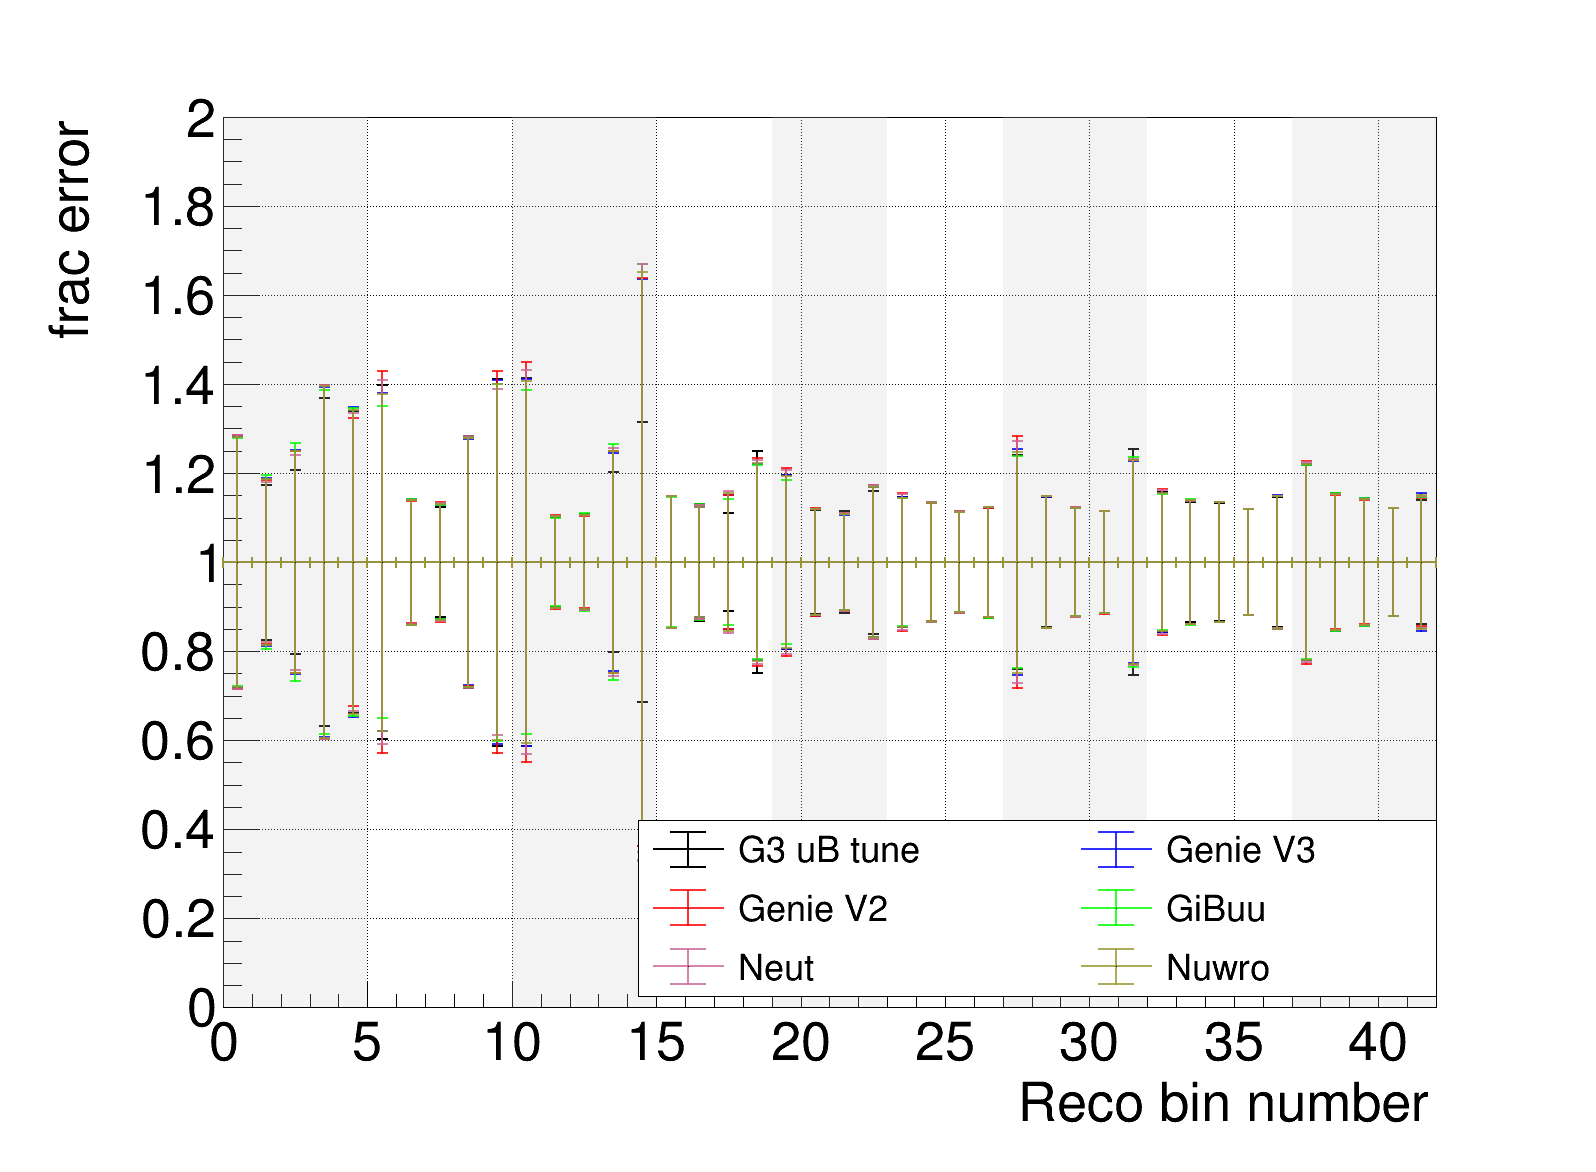

In [62]:
#model = [GuB, G3, G2, Neut, NuWro, GiBuu]
error = ['det','other','all','flux','crt','dirt','stat','tot']

for x in error:

    h_frac_G3 = FF.plot_err_array(eval('frac_'+x+'_G3'))
    h_frac_G2 = FF.plot_err_array(eval('frac_'+x+'_G2'))
    h_frac_GuB = FF.plot_err_array(eval('frac_'+x+'_GuB'))
    h_frac_gibuu = FF.plot_err_array(eval('frac_'+x+'_GiBuu'))
    h_frac_neut = FF.plot_err_array(eval('frac_'+x+'_Neut'))
    h_frac_nuwro = FF.plot_err_array(eval('frac_'+x+'_NuWro'))

    h_frac_G3.SetLineColorAlpha(ROOT.kBlue,0.8)
    h_frac_G2.SetLineColorAlpha(ROOT.kRed,0.8)
    h_frac_gibuu.SetLineColorAlpha(ROOT.kGreen,0.8)
    h_frac_neut.SetLineColorAlpha(ROOT.kPink+2,0.8)
    h_frac_nuwro.SetLineColorAlpha(ROOT.kYellow-2,0.8)
    
    h_frac_G3.SetLineWidth(2)
    h_frac_G2.SetLineWidth(2)
    h_frac_gibuu.SetLineWidth(2)
    h_frac_neut.SetLineWidth(2)
    h_frac_nuwro.SetLineWidth(2)
    h_frac_GuB.SetLineWidth(2)

    h_histo = FF.histBkg(h_frac_GuB)
    h_frac_GuB.SetMinimum(0)
    h_frac_GuB.SetMaximum(2)
    h_frac_GuB.Draw('e1')
    h_histo.Draw('same hist')
    h_frac_G3.Draw('same e1')
    h_frac_G2.Draw('same e1')
    h_frac_gibuu.Draw('same e1')
    h_frac_neut.Draw('same e1')
    h_frac_nuwro.Draw('same e1')

    legend = ROOT.TLegend(0.4,0.15,0.9,0.3)
    legend.SetNColumns(2)
    legend.AddEntry(h_frac_GuB,'G3 uB tune',"lep");
    legend.AddEntry(h_frac_G3,'Genie V3',"lep");
    legend.AddEntry(h_frac_G2,'Genie V2',"lep");
    legend.AddEntry(h_frac_gibuu,'GiBuu',"lep");
    legend.AddEntry(h_frac_neut,'Neut',"lep");
    legend.AddEntry(h_frac_nuwro,'Nuwro',"lep");
    legend.Draw()

    c1.Draw()
    c1.SaveAs(outputdir_png + 'error_'+x+"_models.png")
    c1.SaveAs(outputdir_root + 'error_'+x+"_models.root")
    c1.SaveAs(outputdir_pdf + 'error_'+x+"_models.pdf")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/prediction_models.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/prediction_models.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/prediction_models.pdf has been created


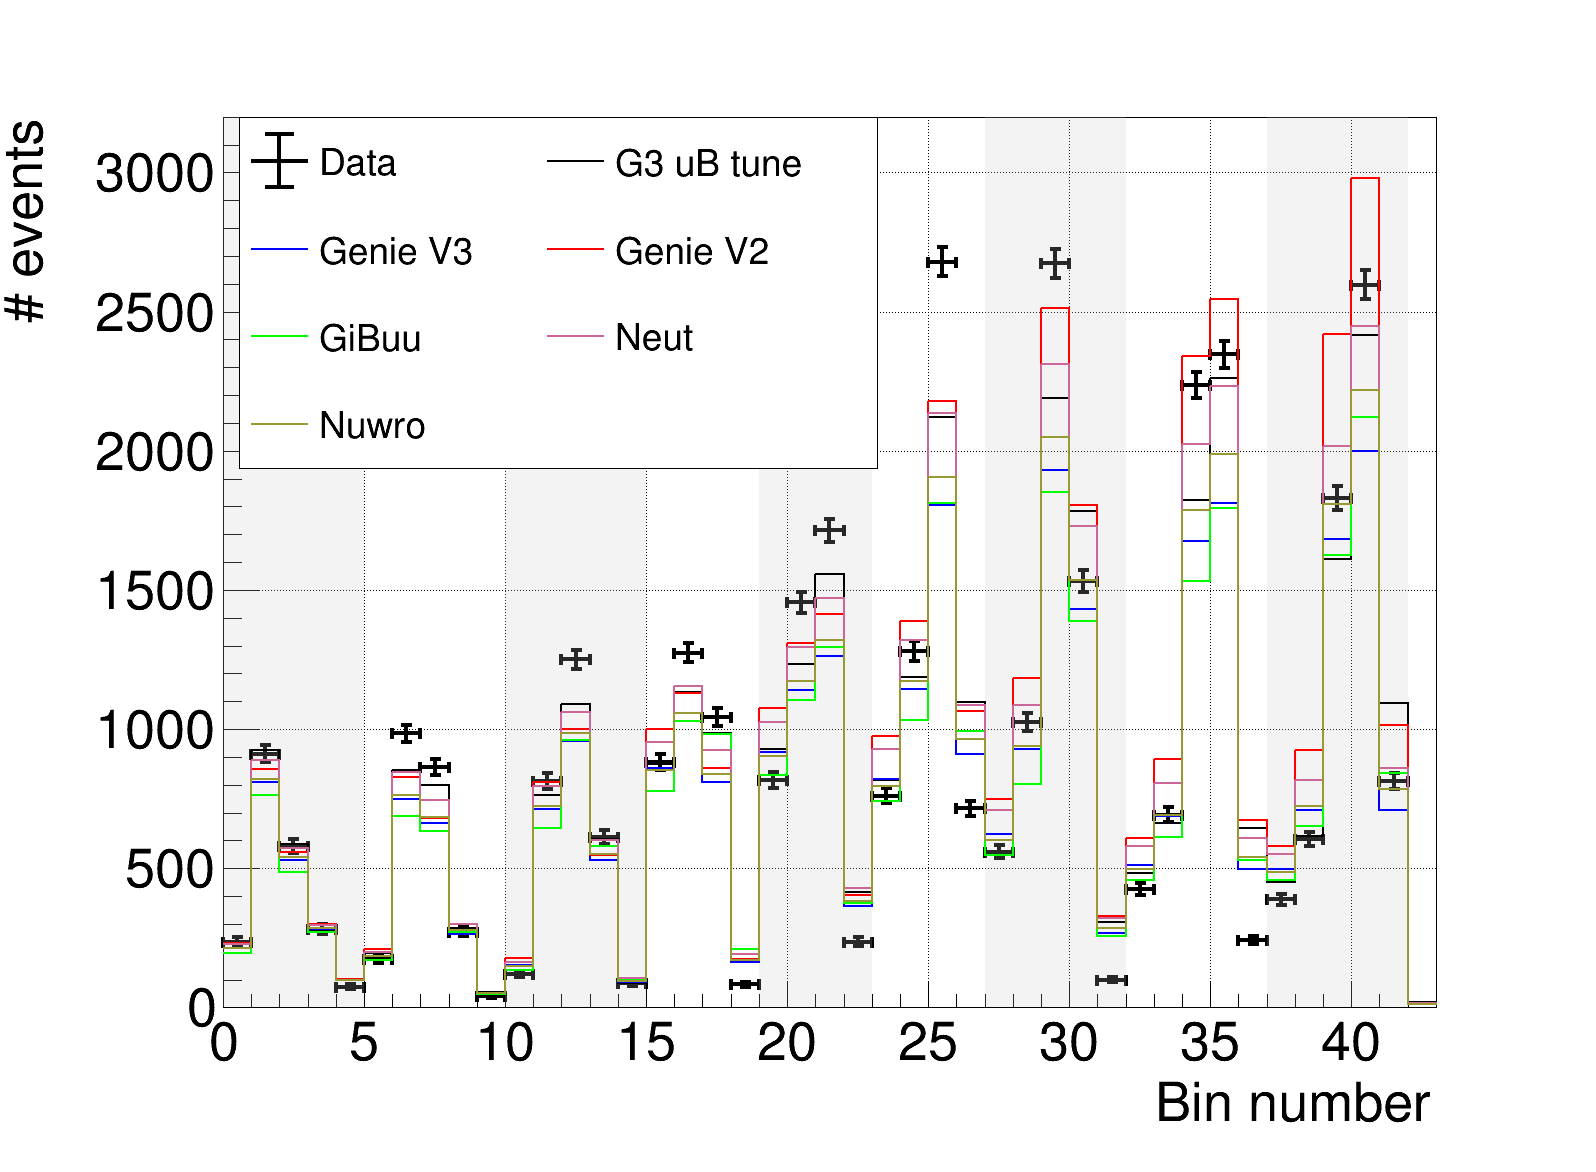

In [63]:

h_pred_GuB.SetLineColor(ROOT.kBlack)
h_pred_G3.SetLineColor(ROOT.kBlue)
h_pred_G2.SetLineColor(ROOT.kRed)
h_pred_GiBuu.SetLineColor(ROOT.kGreen)
h_pred_neut.SetLineColor(ROOT.kPink+2)
h_pred_nuwro.SetLineColor(ROOT.kYellow-2)

h_pred_GuB.SetLineWidth(2)
h_pred_G3.SetLineWidth(2)
h_pred_G2.SetLineWidth(2)
h_pred_GiBuu.SetLineWidth(2)
h_pred_neut.SetLineWidth(2)
h_pred_nuwro.SetLineWidth(2)

FF.main_plot(h_data)
h_data.SetMaximum(3200)
h_data.SetYTitle('# events')
h_data.SetXTitle('Bin number')
h_data.Draw('E1')
h_histo.Draw('same hist')
h_pred_GuB.Draw('hist same')
h_pred_G3.Draw('same hist')
h_pred_G2.Draw('same hist')
h_pred_GiBuu.Draw('same hist')
h_pred_neut.Draw('same hist')
h_pred_nuwro.Draw('same hist')

legend = ROOT.TLegend(0.15,0.6,0.55,0.9)
legend.SetNColumns(2)
legend.AddEntry(h_data,'Data',"lep");
legend.AddEntry(h_pred_GuB,'G3 uB tune',"l");
legend.AddEntry(h_pred_G3,'Genie V3',"l");
legend.AddEntry(h_pred_G2,'Genie V2',"l");
legend.AddEntry(h_pred_GiBuu,'GiBuu',"l");
legend.AddEntry(h_pred_neut,'Neut',"l");
legend.AddEntry(h_pred_nuwro,'Nuwro',"l");
legend.Draw()

c1.Draw()
c1.SaveAs(outputdir_png + "prediction_models.png")
c1.SaveAs(outputdir_root + "prediction_models.root")
c1.SaveAs(outputdir_pdf + "prediction_models.pdf")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/prediction_models_ratio.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/prediction_models_ratio.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/prediction_models_ratio.pdf has been created


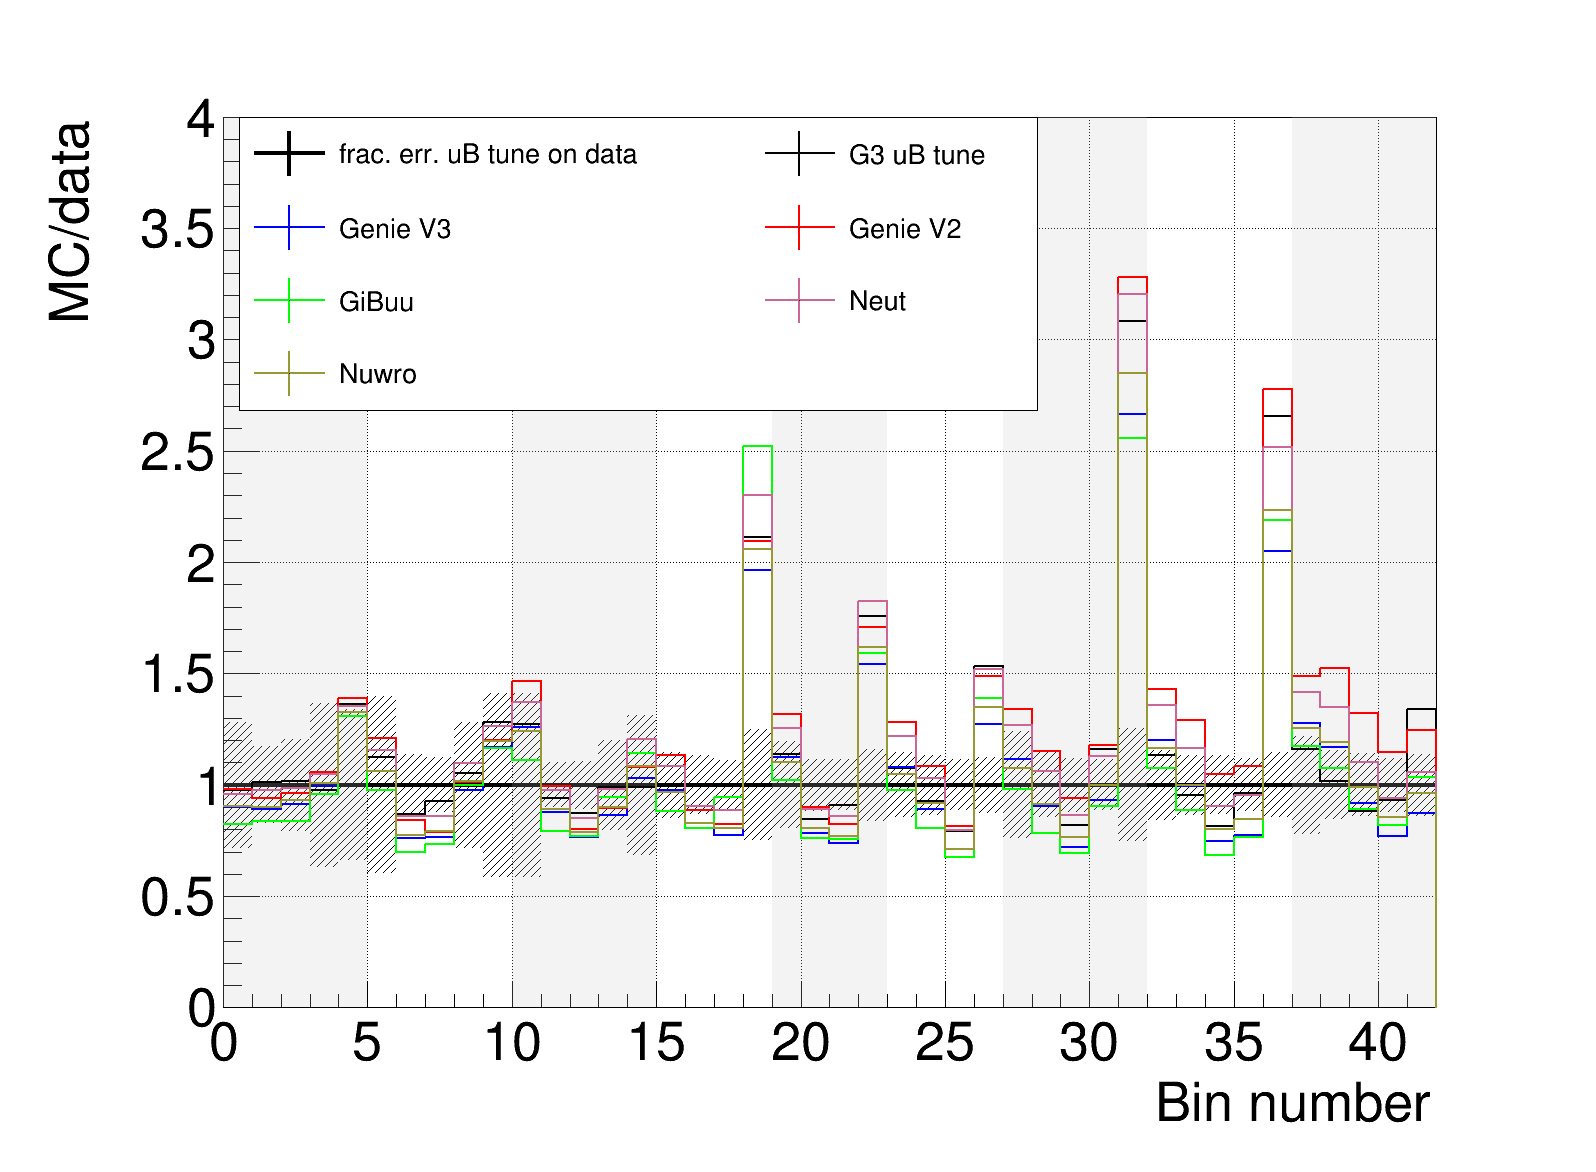

In [64]:
h_pred_GuB_ratio = h_pred_GuB.Clone()
h_pred_G3_ratio = h_pred_G3.Clone()
h_pred_G2_ratio = h_pred_G2.Clone()
h_pred_GiBuu_ratio = h_pred_GiBuu.Clone()
h_pred_neut_ratio = h_pred_neut.Clone()
h_pred_nuwro_ratio = h_pred_nuwro.Clone()

h_pred_GuB_ratio.Divide(h_data)
h_pred_G3_ratio.Divide(h_data)
h_pred_G2_ratio.Divide(h_data)
h_pred_GiBuu_ratio.Divide(h_data)
h_pred_neut_ratio.Divide(h_data)
h_pred_nuwro_ratio.Divide(h_data)

FF.main_plot(h_frac_GuB)
h_frac_GuB.SetMaximum(4)
h_frac_GuB.SetMinimum(0)
h_frac_GuB.SetYTitle('MC/data')
h_frac_GuB.SetXTitle('Bin number')
h_frac_GuB.SetFillColor(ROOT.kBlack)
h_frac_GuB.SetLineColor(ROOT.kBlack)
h_frac_GuB.SetFillStyle(3004)
h_frac_GuB.Draw('E2')
h_frac_GuB2 = h_frac_GuB.Clone()
h_frac_GuB2.SetFillColor(0)
h_frac_GuB2.Draw('hist same')
h_histo.Draw('same hist')
h_pred_GuB_ratio.Draw('hist same')
h_pred_G3_ratio.Draw('same hist')
h_pred_G2_ratio.Draw('same hist')
h_pred_GiBuu_ratio.Draw('same hist')
h_pred_neut_ratio.Draw('same hist')
h_pred_nuwro_ratio.Draw('same hist')

legend = ROOT.TLegend(0.15,0.65,0.65,0.9)
legend.SetNColumns(2)
legend.AddEntry(h_frac_GuB,'frac. err. uB tune on data',"lep");
legend.AddEntry(h_pred_GuB,'G3 uB tune',"lep");
legend.AddEntry(h_pred_G3,'Genie V3',"lep");
legend.AddEntry(h_pred_G2,'Genie V2',"lep");
legend.AddEntry(h_pred_GiBuu,'GiBuu',"lep");
legend.AddEntry(h_pred_neut,'Neut',"lep");
legend.AddEntry(h_pred_nuwro,'Nuwro',"lep");
legend.Draw()

c1.Draw()
c1.SaveAs(outputdir_png + "prediction_models_ratio.png")
c1.SaveAs(outputdir_root + "prediction_models_ratio.root")
c1.SaveAs(outputdir_pdf + "prediction_models_ratio.pdf")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/prediction_models_ratio_zoom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/prediction_models_ratio_zoom.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/prediction_models_ratio_zoom.pdf has been created


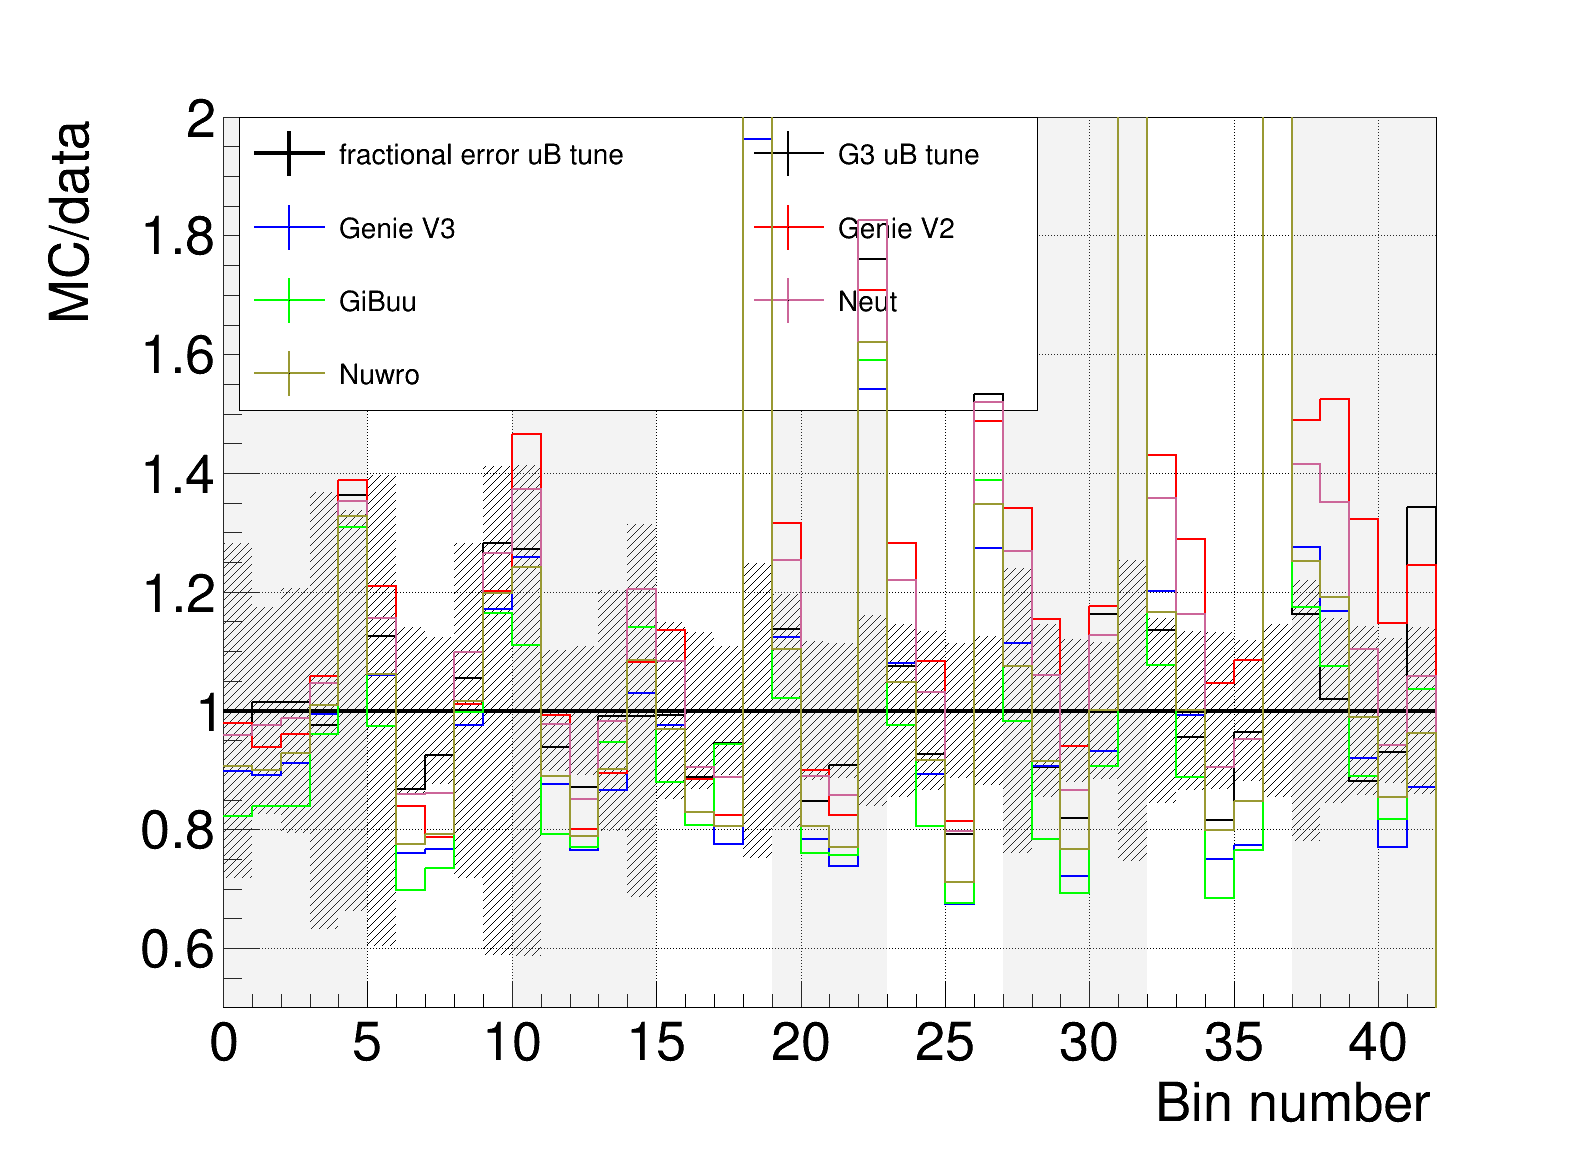

In [65]:

FF.main_plot(h_frac_GuB)
h_frac_GuB.SetMaximum(2)
h_frac_GuB.SetMinimum(0.5)
h_frac_GuB.SetYTitle('MC/data')
h_frac_GuB.SetXTitle('Bin number')
h_frac_GuB.SetFillColor(ROOT.kBlack)
h_frac_GuB.SetLineColor(ROOT.kBlack)
h_frac_GuB.SetFillStyle(3004)
h_frac_GuB.Draw('E2')
h_histo.Draw('same hist')


legend = ROOT.TLegend(0.15,0.65,0.65,0.9)
legend.SetNColumns(2)
legend.AddEntry(h_frac_GuB,'fractional error uB tune',"lep");
legend.AddEntry(h_pred_GuB,'G3 uB tune',"lep");
legend.AddEntry(h_pred_G3,'Genie V3',"lep");
legend.AddEntry(h_pred_G2,'Genie V2',"lep");
legend.AddEntry(h_pred_GiBuu,'GiBuu',"lep");
legend.AddEntry(h_pred_neut,'Neut',"lep");
legend.AddEntry(h_pred_nuwro,'Nuwro',"lep");
legend.Draw()

h_frac_GuB2 = h_frac_GuB.Clone()
h_frac_GuB2.SetFillColor(0)
h_frac_GuB2.Draw('hist same')
h_pred_GuB_ratio.Draw('hist same')
h_pred_G3_ratio.Draw('same hist')
h_pred_G2_ratio.Draw('same hist')
h_pred_GiBuu_ratio.Draw('same hist')
h_pred_neut_ratio.Draw('same hist')
h_pred_nuwro_ratio.Draw('same hist')

c1.Draw()
c1.SaveAs(outputdir_png + "prediction_models_ratio_zoom.png")
c1.SaveAs(outputdir_root + "prediction_models_ratio_zoom.root")
c1.SaveAs(outputdir_pdf + "prediction_models_ratio_zoom.pdf")

In [66]:
def chi2_minus1(data_vec, pred_vec, frac):
    covar = np.zeros((42,42))
    for i in range(42):
        for j in range(42):
            covar[i][j] = frac[i][j]*pred_vec[i]*pred_vec[j]
            
    inv_covar = np.linalg.inv(covar)
    chi_vec = np.zeros((42))
    for z in range(42):
        for i in range(42):
            for j in range(42):
                if i != z and j!=z:
                    chi2_tmp = (data_vec[i]-pred_vec[i])*inv_covar[i][j]*(data_vec[j]-pred_vec[j])
                    chi_vec[z] +=chi2_tmp
    return chi_vec

In [67]:
def my_chi2(data_vec, pred_vec, frac):
    covar = np.zeros((42,42))
    for i in range(42):
        for j in range(42):
            covar[i][j] = frac[i][j]*pred_vec[i]*pred_vec[j]
            
    inv_covar = np.linalg.inv(covar)
    chi_vec = 0
    for i in range(42):
        for j in range(42):
            chi2_tmp = (data_vec[i]-pred_vec[i])*inv_covar[i][j]*(data_vec[j]-pred_vec[j])
            chi_vec +=chi2_tmp
    return chi_vec

In [68]:

data_vec = FF.plot2arr(h_data,1)

# G3 ub tune
pred_vec_GuB = FF.plot2arr(h_pred_GuB,1)
chi_vec_GuB = chi2_minus1(data_vec, pred_vec_GuB, frac_tot_GuB)
h_chi_GuB = FF.arr2plot(chi_vec_GuB)
print my_chi2(data_vec, pred_vec_GuB, frac_tot_GuB)
# G3
pred_vec_G3 = FF.plot2arr(h_pred_G3,1)
chi_vec_G3 = chi2_minus1(data_vec, pred_vec_G3, frac_tot_G3)
h_chi_G3 = FF.arr2plot(chi_vec_G3)

# G2
pred_vec_G2 = FF.plot2arr(h_pred_G2,1)
chi_vec_G2 = chi2_minus1(data_vec, pred_vec_G2, frac_tot_G2)
h_chi_G2 = FF.arr2plot(chi_vec_G2)

# Gibuu
pred_vec_Gibuu = FF.plot2arr(h_pred_GiBuu,1)
chi_vec_Gibuu = chi2_minus1(data_vec, pred_vec_Gibuu, frac_tot_GiBuu)
h_chi_Gibuu = FF.arr2plot(chi_vec_Gibuu)

# Neut
pred_vec_Neut = FF.plot2arr(h_pred_neut,1)
chi_vec_Neut = chi2_minus1(data_vec, pred_vec_Neut, frac_tot_Neut)
h_chi_Neut = FF.arr2plot(chi_vec_Neut)

# Nuwro
pred_vec_Nuwro = FF.plot2arr(h_pred_nuwro,1)
chi_vec_Nuwro = chi2_minus1(data_vec, pred_vec_Nuwro, frac_tot_NuWro)
h_chi_Nuwro = FF.arr2plot(chi_vec_Nuwro)



384.87610338100677


Warning in <TROOT::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_this (Potential memory

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/chi_nminus1.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/chi_nminus1.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/chi_nminus1.pdf has been created


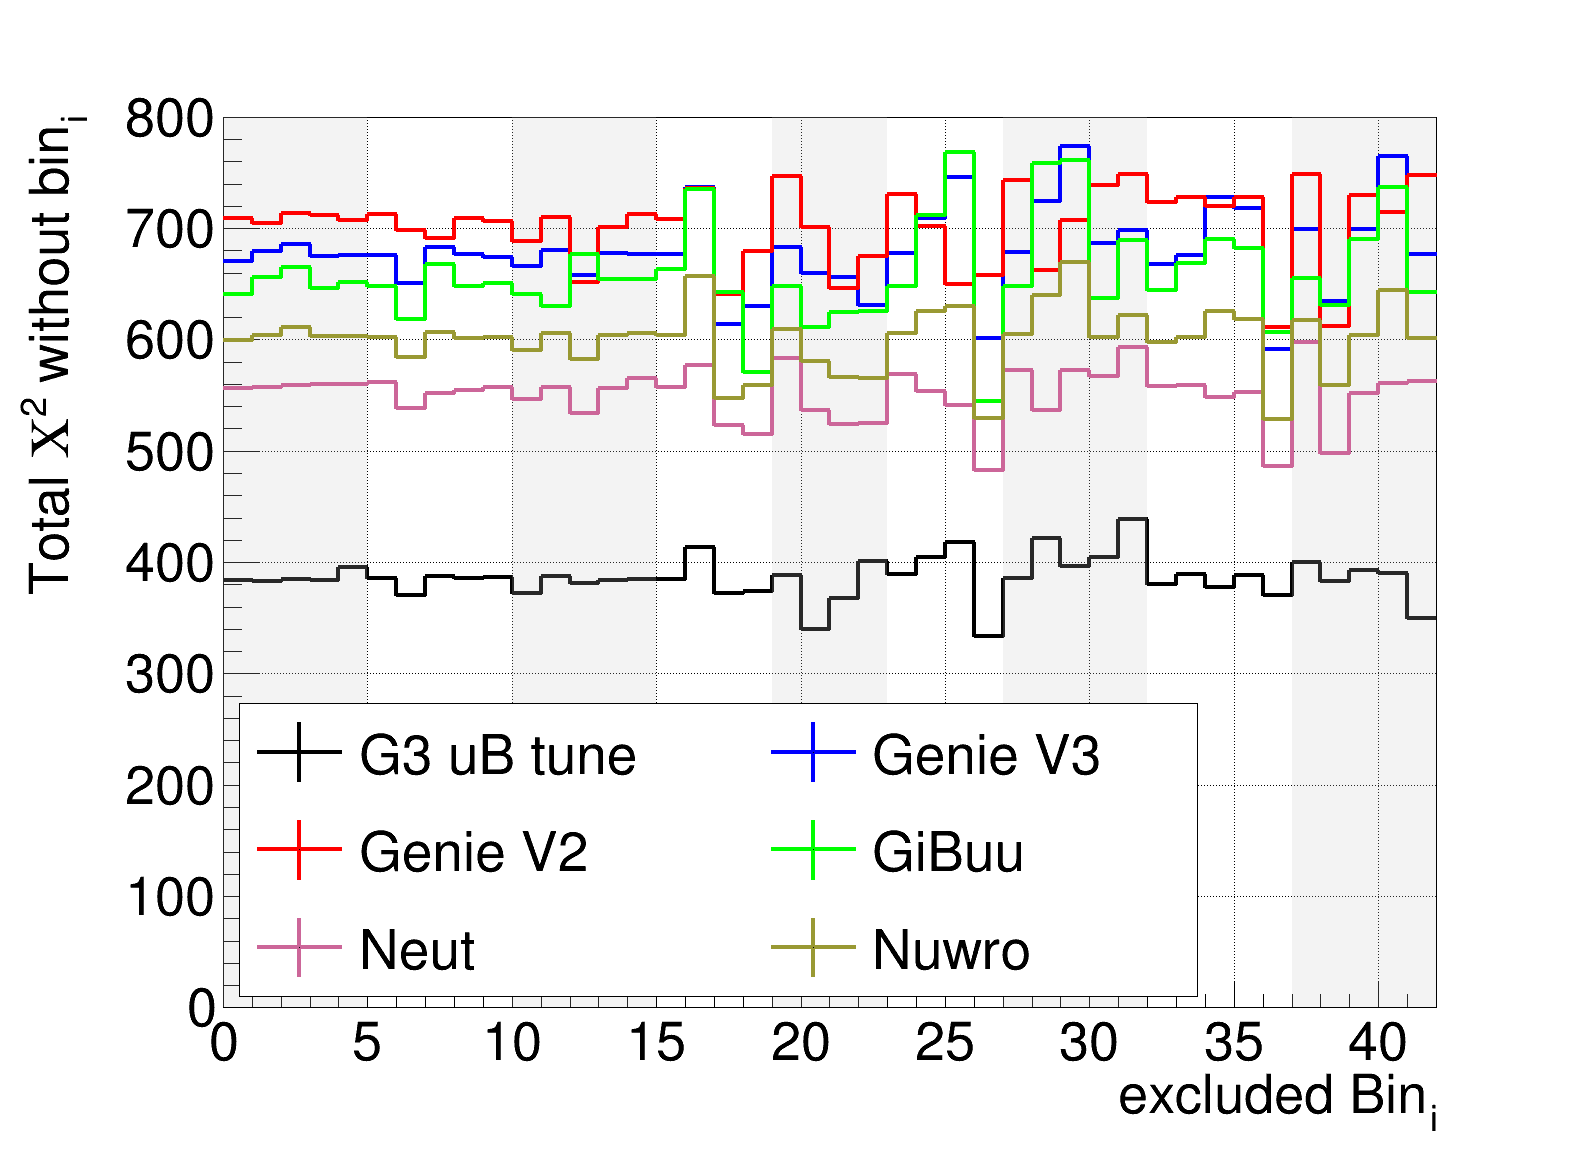

In [69]:
FF.main_plot(h_chi_GuB)
h_chi_G3.SetLineColor(ROOT.kBlue)
h_chi_G2.SetLineColor(ROOT.kRed)
h_chi_Gibuu.SetLineColor(ROOT.kGreen)
h_chi_Neut.SetLineColor(ROOT.kPink+2)
h_chi_Nuwro.SetLineColor(ROOT.kYellow-2)

h_chi_GuB.SetMaximum(800)
h_chi_GuB.SetMinimum(0)
h_chi_GuB.SetYTitle('Total #Chi^{2} without bin_{i}')
h_chi_GuB.SetXTitle('excluded Bin_{i}')

h_chi_GuB.Draw('hist')
h_histo.Draw('same hist')
h_chi_G3.Draw('same hist')
h_chi_G2.Draw('same hist')
h_chi_Gibuu.Draw('same hist')
h_chi_Neut.Draw('same hist')
h_chi_Nuwro.Draw('same hist')

legend = ROOT.TLegend(0.15,0.15,0.75,0.4)
legend.SetNColumns(2)
legend.AddEntry(h_chi_GuB,'G3 uB tune',"lep");
legend.AddEntry(h_chi_G3,'Genie V3',"lep");
legend.AddEntry(h_chi_G2,'Genie V2',"lep");
legend.AddEntry(h_chi_Gibuu,'GiBuu',"lep");
legend.AddEntry(h_chi_Neut,'Neut',"lep");
legend.AddEntry(h_chi_Nuwro,'Nuwro',"lep");
legend.Draw()

c1.Draw()
c1.SaveAs(outputdir_png + "chi_nminus1.png")
c1.SaveAs(outputdir_root + "chi_nminus1.root")
c1.SaveAs(outputdir_pdf + "chi_nminus1.pdf")